In [7]:
import pandas as pd

# Load the data from Excel file
def load_data(file_path, sheet_name):
    """Load data from an Excel file and sheet."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows and summary of the data
def display_data_summary(data):
    """Display the head, info, and summary of the dataset."""
    print("\n--- Data Head ---\n")
    print(data.head())

    print("\n--- Data Info ---\n")
    print(data.info())

    print("\n--- Data Summary ---\n")
    print(data.describe())

# Display five-number summary for each column
def display_five_summary(data):
    """Display the five-number summary for each numerical column."""
    print("\n--- Five-Number Summary for Each Variable ---\n")
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        summary = data[column].describe()
        five_number_summary = {
            'Minimum': summary['min'],
            '1st Quartile (25%)': summary['25%'],
            'Median (50%)': summary['50%'],
            '3rd Quartile (75%)': summary['75%'],
            'Maximum': summary['max']
        }
        print(f"{column}:")
        for key, value in five_number_summary.items():
            print(f"  {key}: {value}")
        print()

# Main execution
if __name__ == "__main__":
    # File path and sheet name
    file_path = 'Padel 2.xlsx'  # Replace with your Excel file path
    sheet_name = 'DataSet'  # Replace with your sheet name

    # Load data
    data = load_data(file_path, sheet_name)

    # Display general data summary
    display_data_summary(data)

    # Display five-number summary
    display_five_summary(data)



--- Data Head ---

   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0          14.511930       14.511930           0.248506       -0.289131   
1          13.082441       13.082441           0.112223       -0.752856   
2          11.225871       11.225871           0.092786       -0.092786   
3          11.253082       11.253082           0.113298       -0.144185   
4          13.820135       13.820135           0.039271       -0.466889   

        qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0  0.158838  13.130435  590.554         576.442  590.101505   
1  0.221720  11.348837  560.573         540.413  560.159689   
2  0.244977  11.818182  575.592         554.424  575.181821   
3  0.203118  11.822222  590.603         568.427  590.181487   
4  0.161944  15.045455  580.560         560.400  580.149518   

   NumValenceElectrons  ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0                  210  ...             0           0                  0  

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Load the data from Excel file
def load_data(file_path, sheet_name):
    """Load data from an Excel file and sheet."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

# Identify outliers using IQR
def identify_outliers_iqr(data):
    """Identify outliers in each column using the IQR method."""
    outliers_dict = {}
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers_dict[column] = outliers.index.tolist()
    return outliers_dict

# Identify outliers using Z-Score
def identify_outliers_zscore(data, threshold=3):
    """Identify outliers in each column using the Z-Score method."""
    outliers_dict = {}
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        z_scores = zscore(data[column].dropna())
        outliers = data[abs(z_scores) > threshold]
        outliers_dict[column] = outliers.index.tolist()
    return outliers_dict

# Save outlier indices to a file
def save_outliers(outliers_dict, output_file):
    """Save outlier indices to a text file."""
    with open(output_file, 'w') as file:
        for column, indices in outliers_dict.items():
            file.write(f"{column}: {indices}\n")

# Main execution
if __name__ == "__main__":
    # File path and sheet name
    file_path = 'Padel 2.xlsx'  # Replace with your Excel file path
    sheet_name = 'DataSet'  # Replace with your sheet name

    # Load data
    data = load_data(file_path, sheet_name)

    # Identify outliers using IQR method
    iqr_outliers = identify_outliers_iqr(data)
    print("Outliers detected using IQR method:", iqr_outliers)

    # Identify outliers using Z-Score method
    zscore_outliers = identify_outliers_zscore(data)
    print("Outliers detected using Z-Score method:", zscore_outliers)

    # Save results to files
    save_outliers(iqr_outliers, 'iqr_outliers.txt')
    save_outliers(zscore_outliers, 'zscore_outliers.txt')

    print("Outlier detection complete. Results saved to files.")


Outliers detected using IQR method: {'MaxAbsEStateIndex': [2, 3, 11, 12, 26, 31, 34, 49, 53, 71, 73, 85], 'MaxEStateIndex': [2, 3, 11, 12, 26, 31, 34, 49, 53, 71, 73, 85], 'MinAbsEStateIndex': [12, 31, 53, 85], 'MinEStateIndex': [12, 24, 31, 42, 51, 52, 53, 57, 67, 75, 82, 85, 87], 'qed': [], 'SPS': [34, 37, 45, 61, 77], 'MolWt': [49], 'HeavyAtomMolWt': [49], 'ExactMolWt': [49], 'NumValenceElectrons': [], 'NumRadicalElectrons': [], 'MaxPartialCharge': [1, 8, 31, 40, 42, 49, 85, 86, 87], 'MinPartialCharge': [49], 'MaxAbsPartialCharge': [49], 'MinAbsPartialCharge': [1, 8, 30, 31, 40, 42, 49, 85, 86, 87], 'FpDensityMorgan1': [], 'FpDensityMorgan2': [], 'FpDensityMorgan3': [], 'BCUT2D_MWHI': [16, 24, 29, 38, 45, 48, 49, 51, 52, 57, 60, 66, 67, 75, 82, 85], 'BCUT2D_MWLOW': [63], 'BCUT2D_CHGHI': [34, 37, 45, 61, 63, 77], 'BCUT2D_CHGLO': [], 'BCUT2D_LOGPHI': [34, 63], 'BCUT2D_LOGPLOW': [49], 'BCUT2D_MRHI': [13, 18, 19, 24, 39, 50, 51, 52, 57, 59, 67, 75, 82], 'BCUT2D_MRLOW': [0, 12, 19, 22, 3

<ipython-input-6-1cd9679f017d>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


Plots have been saved to: plots


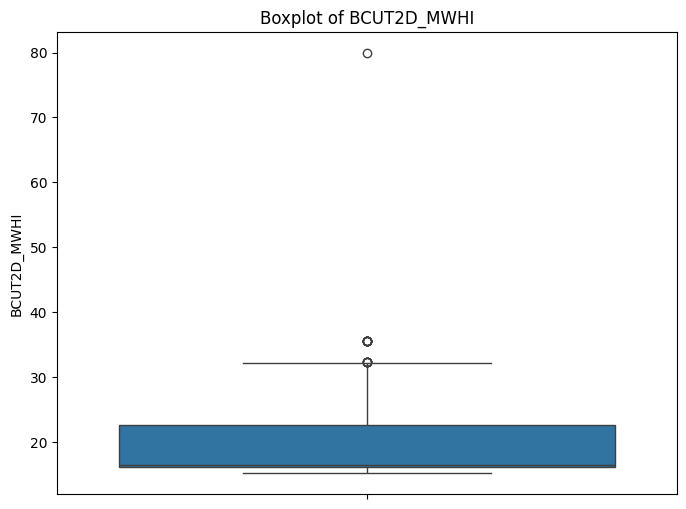

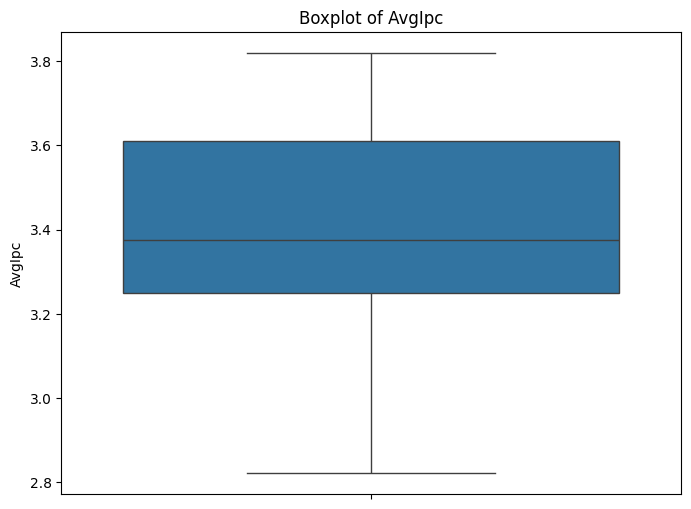

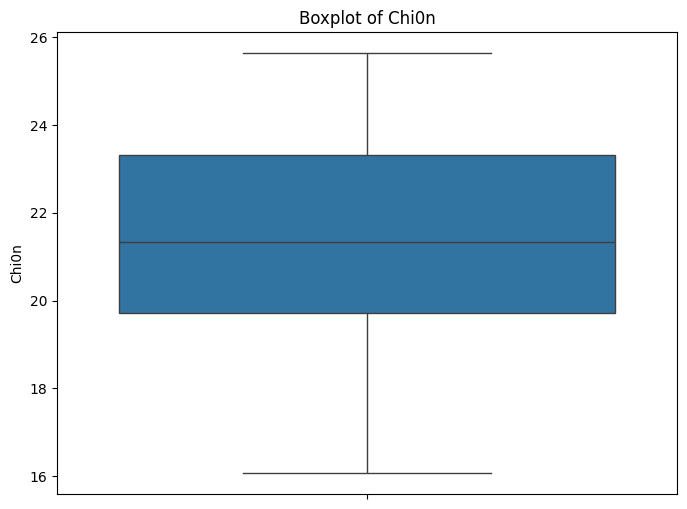

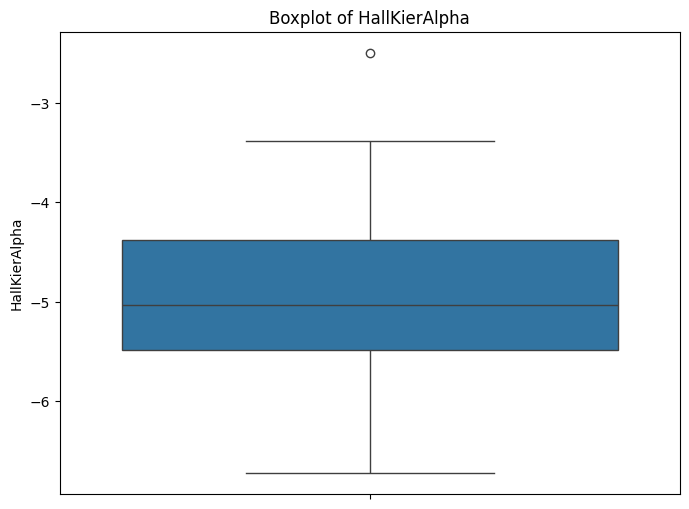

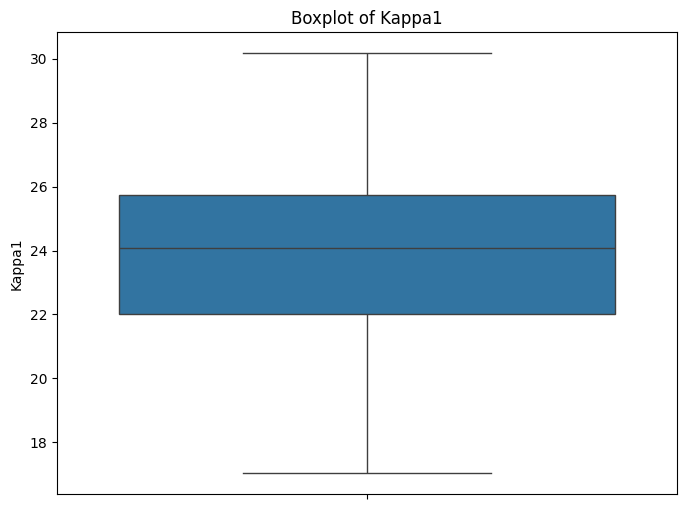

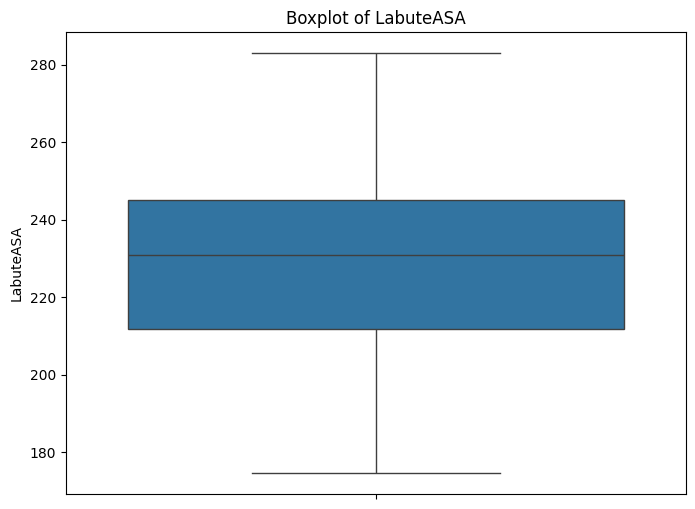

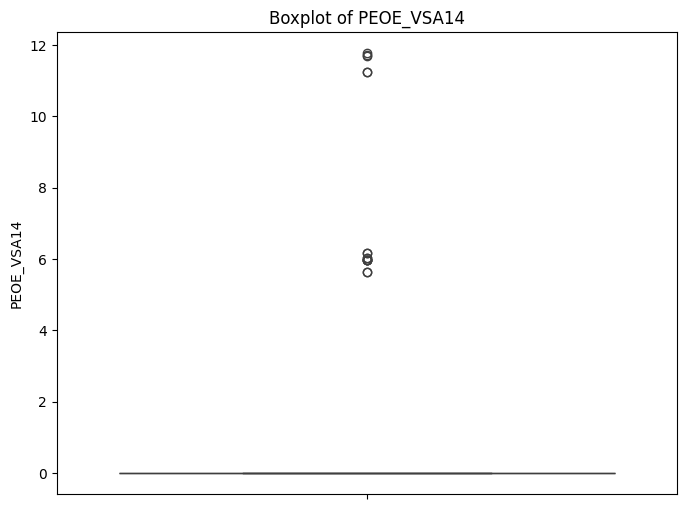

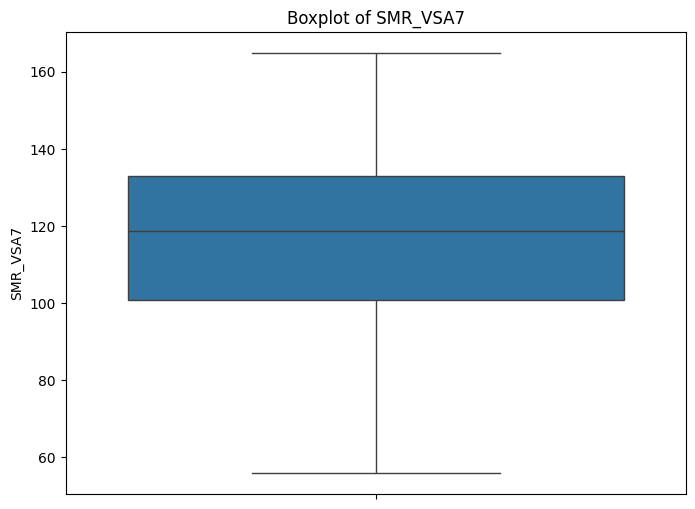

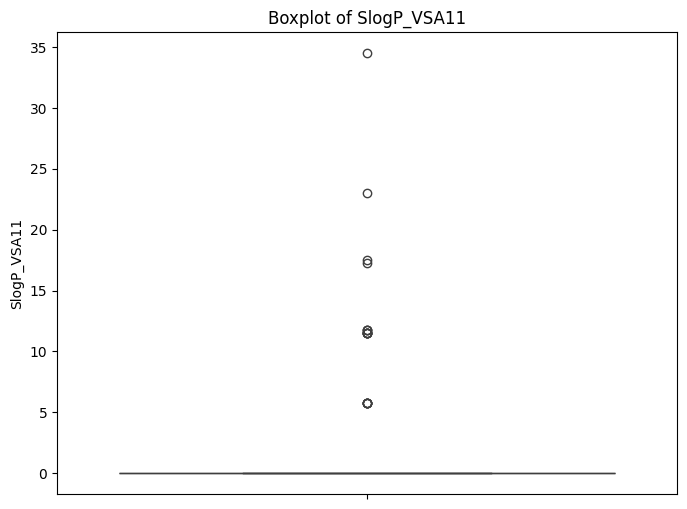

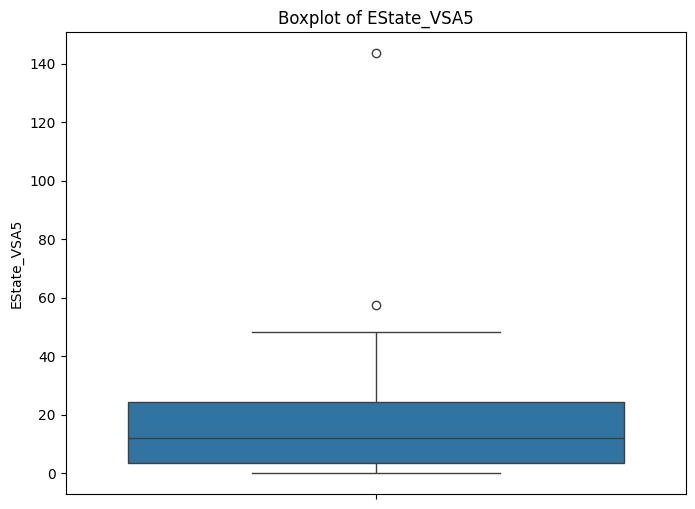

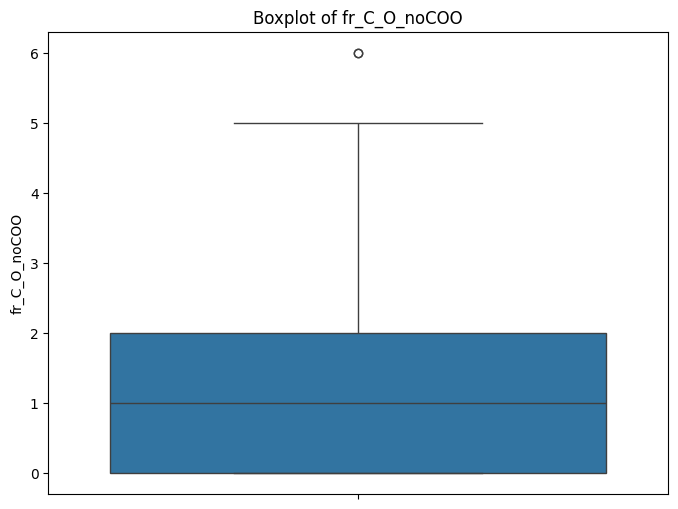

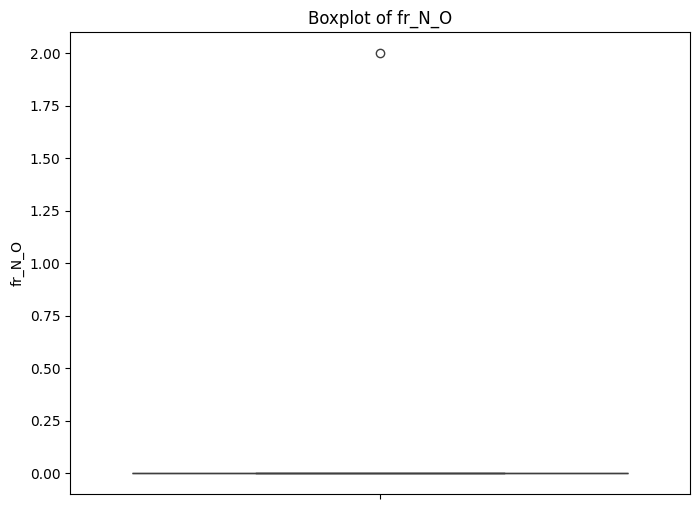

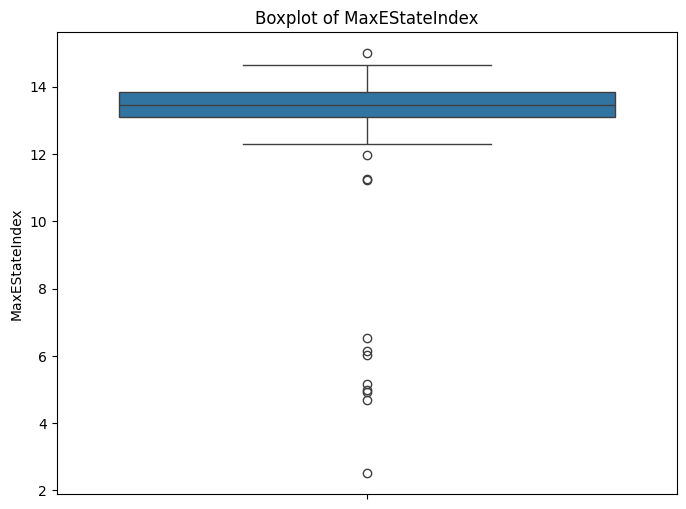

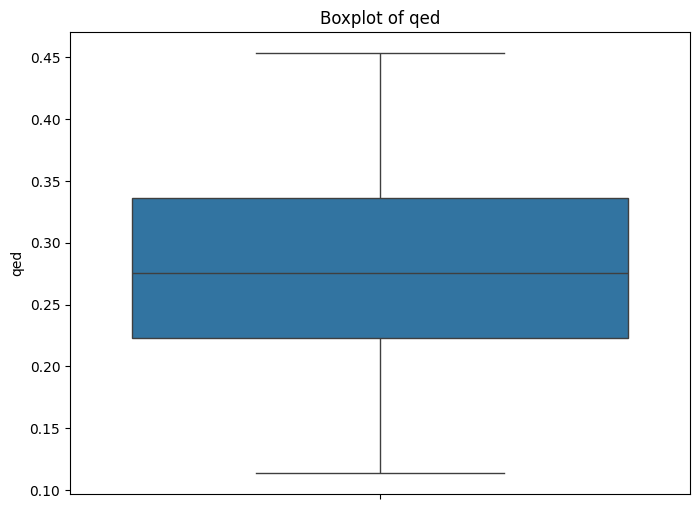

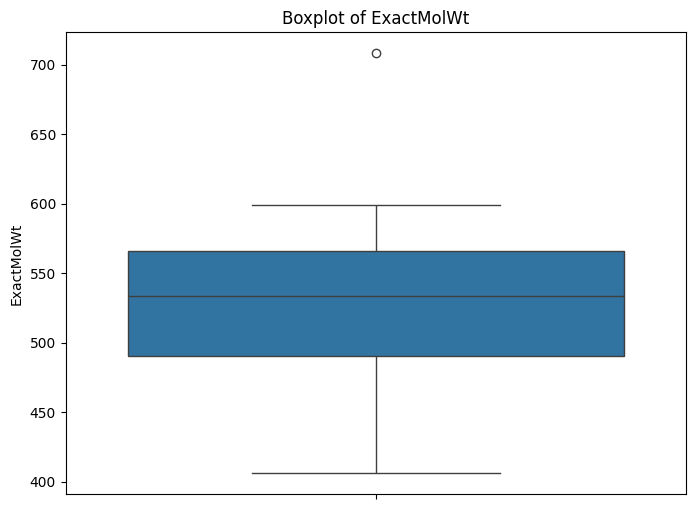

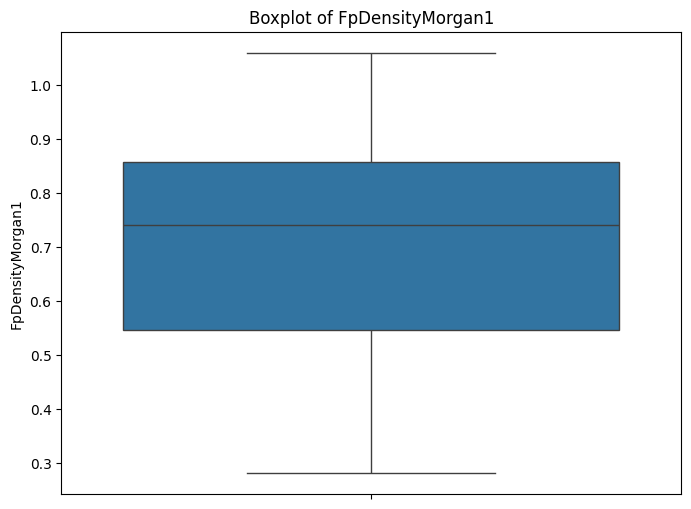

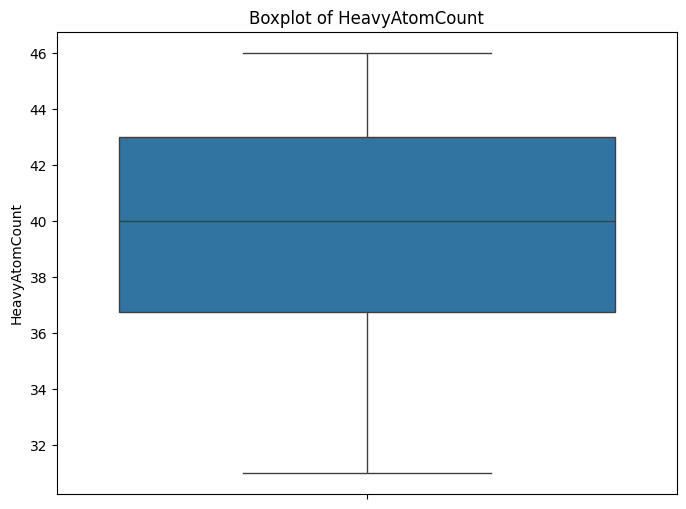

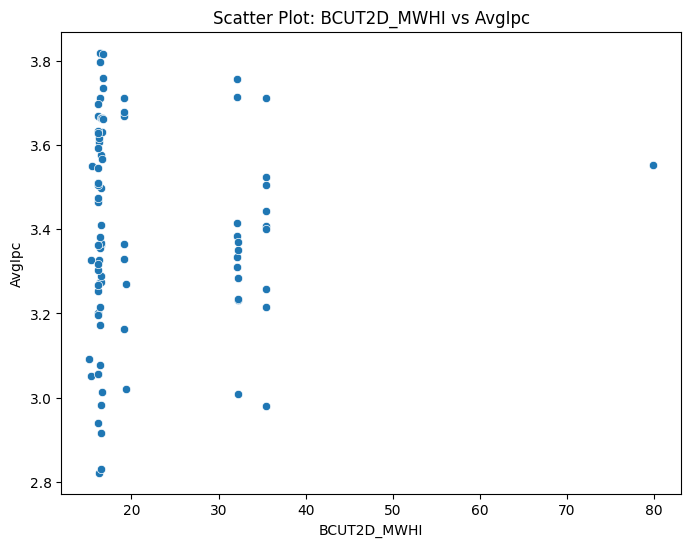

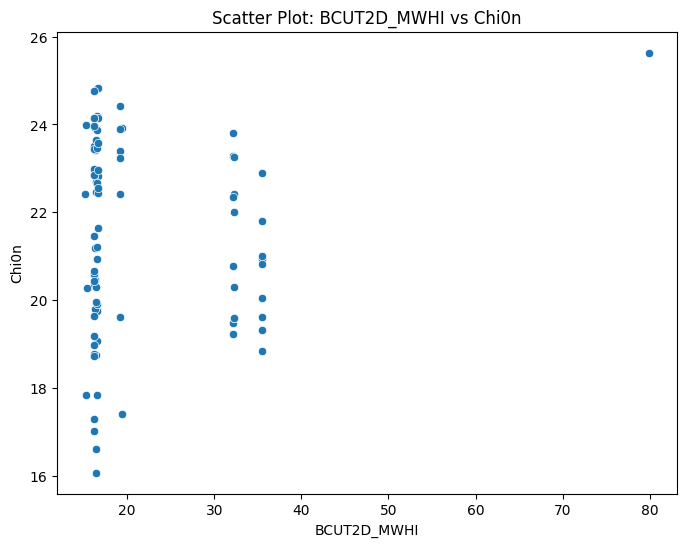

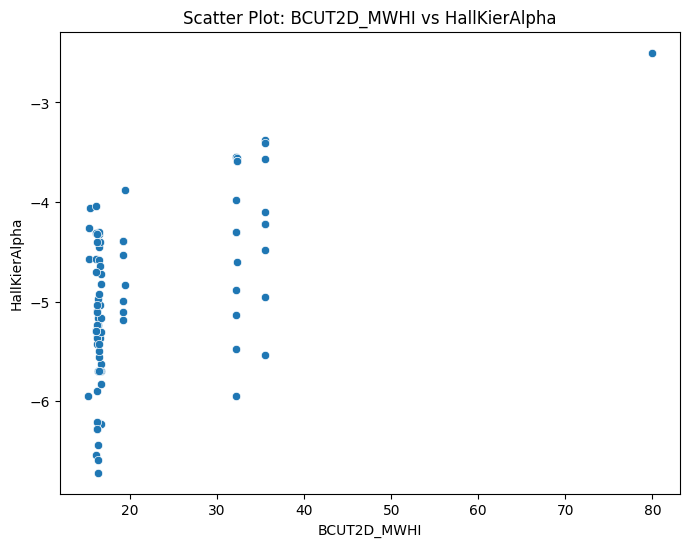

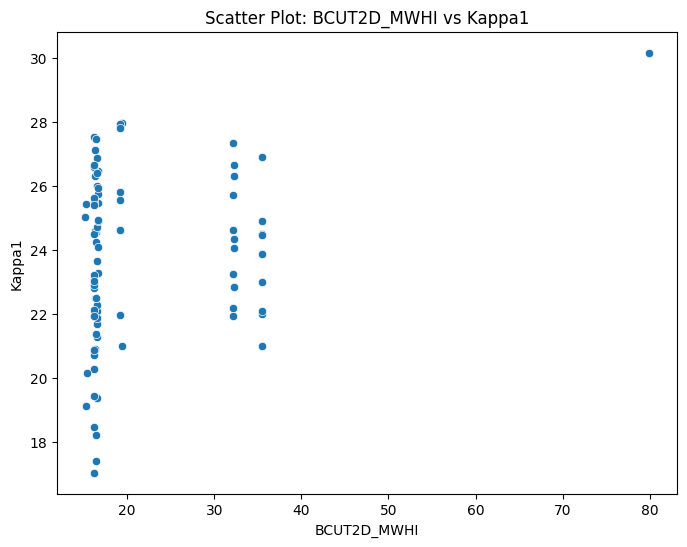

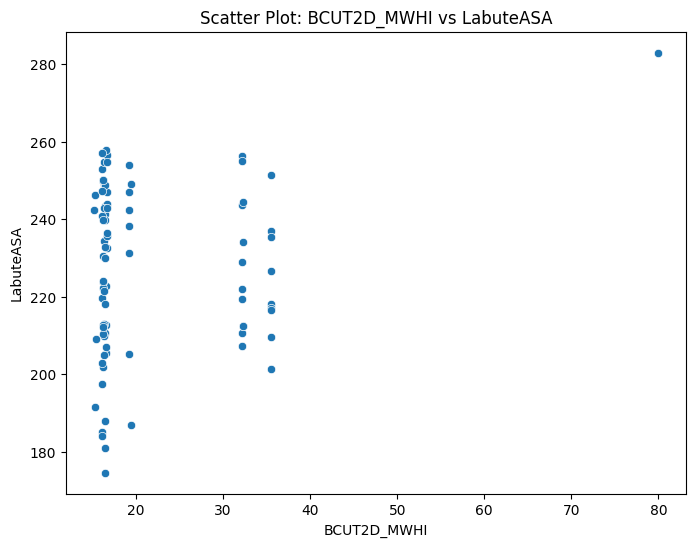

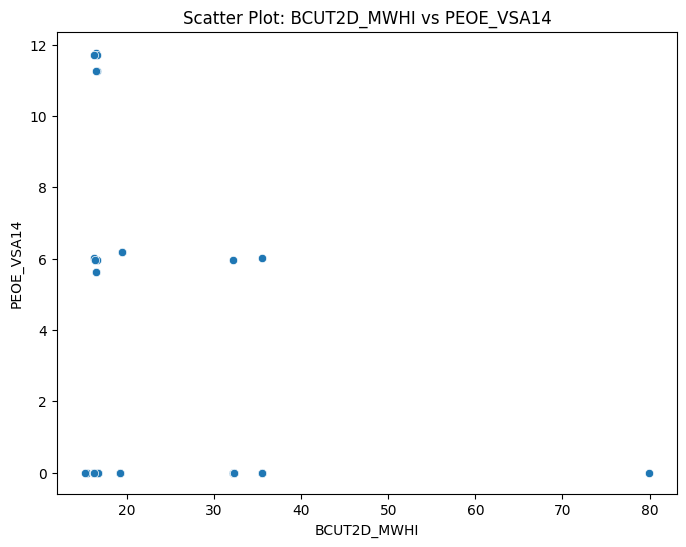

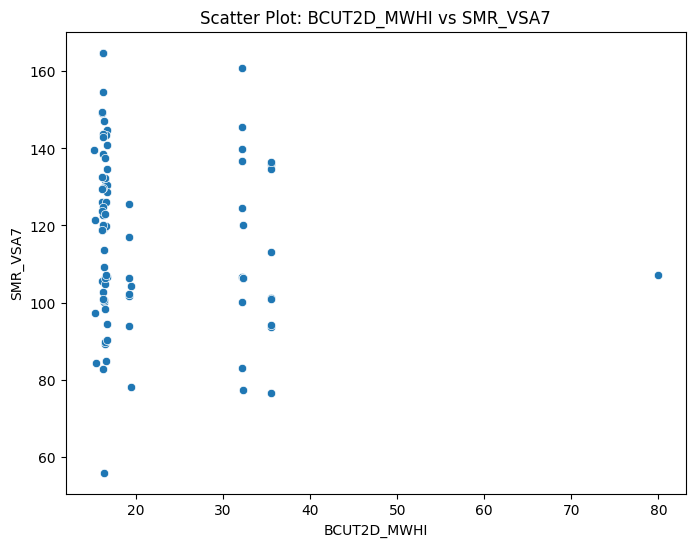

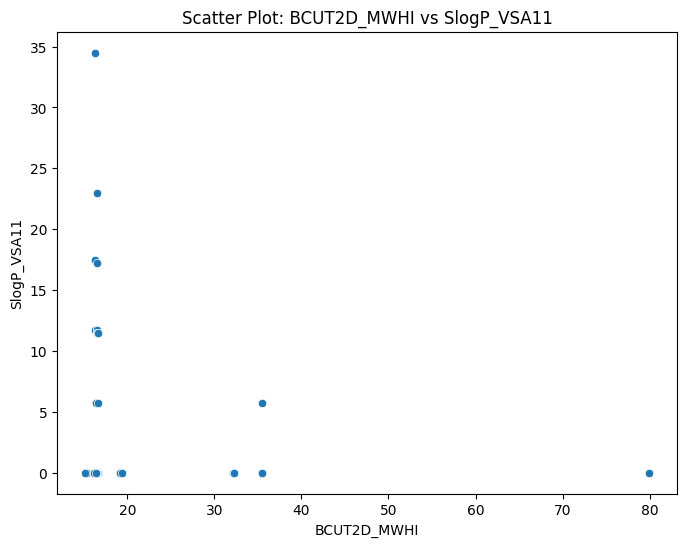

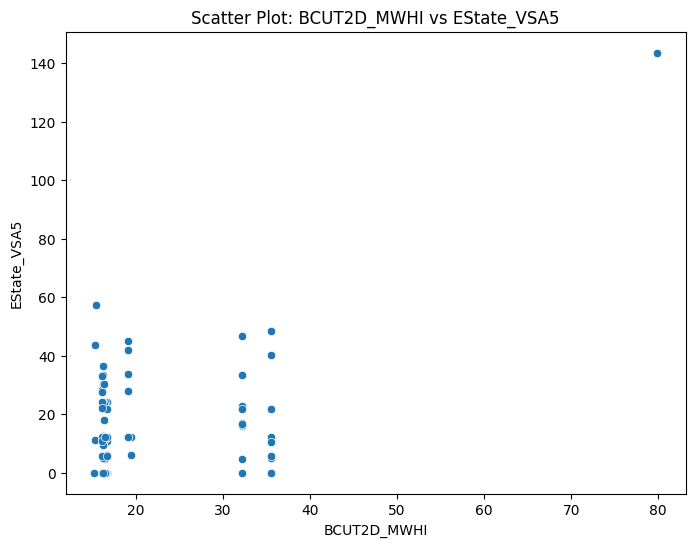

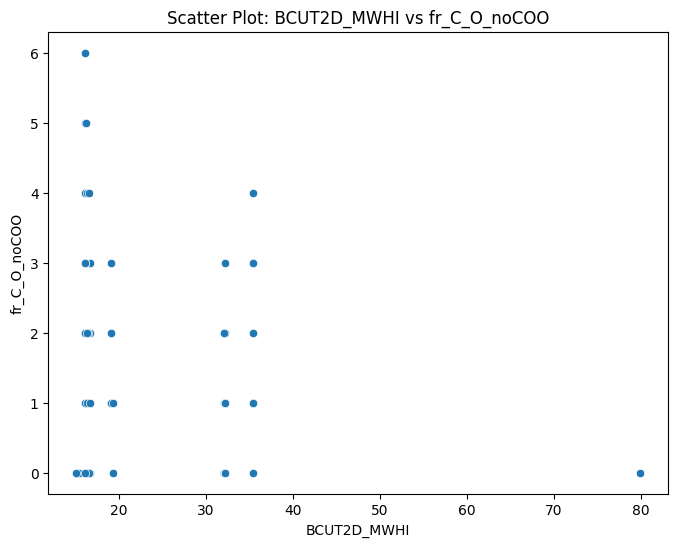

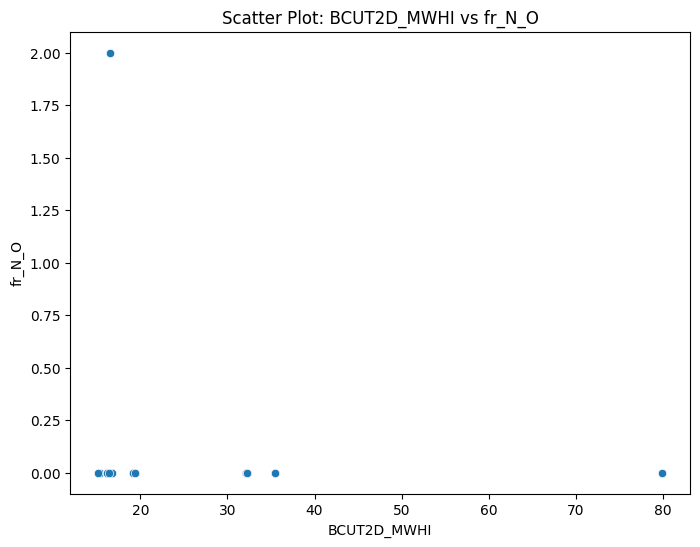

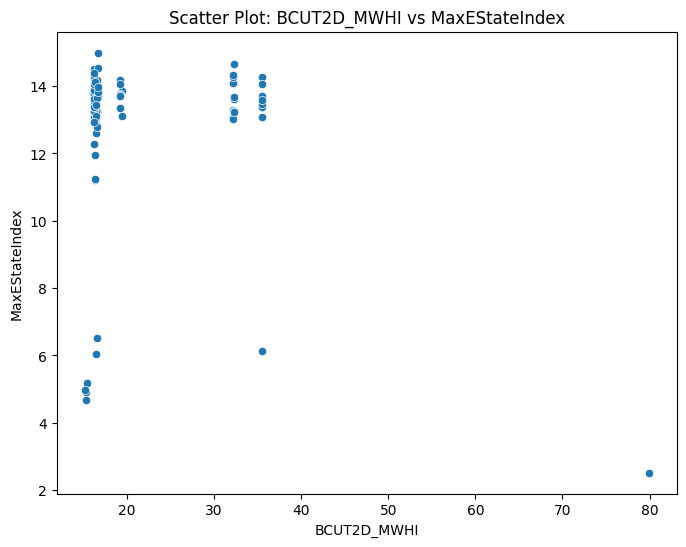

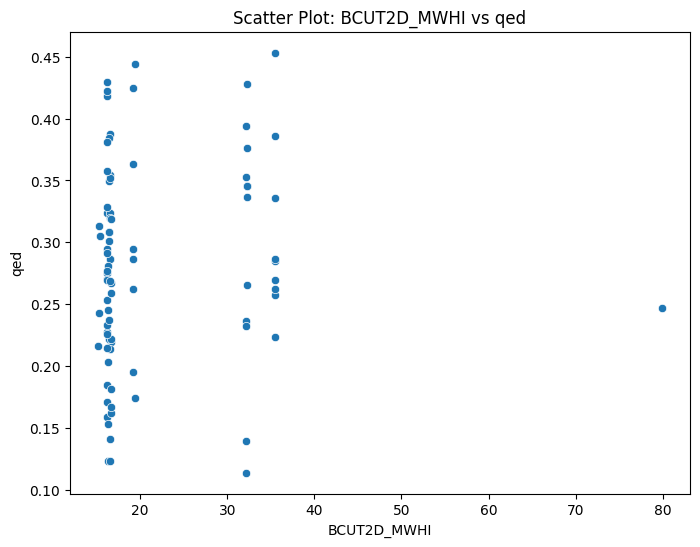

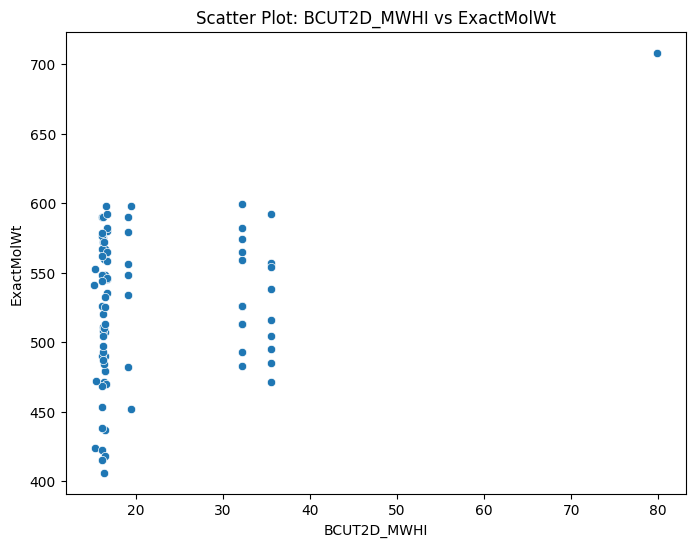

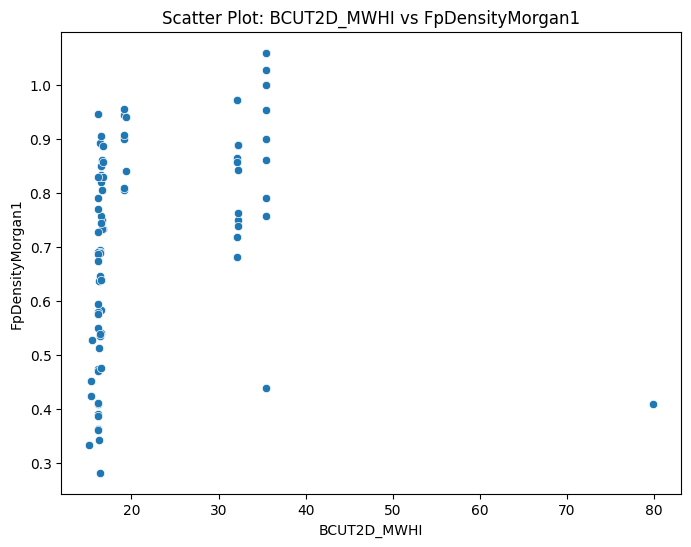

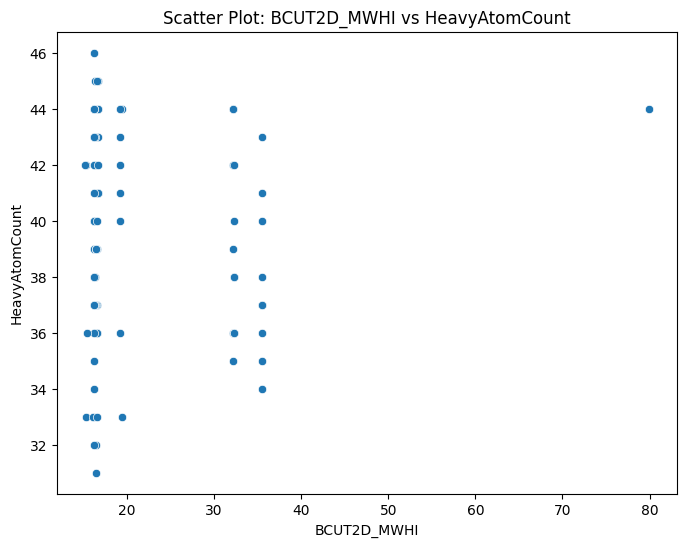

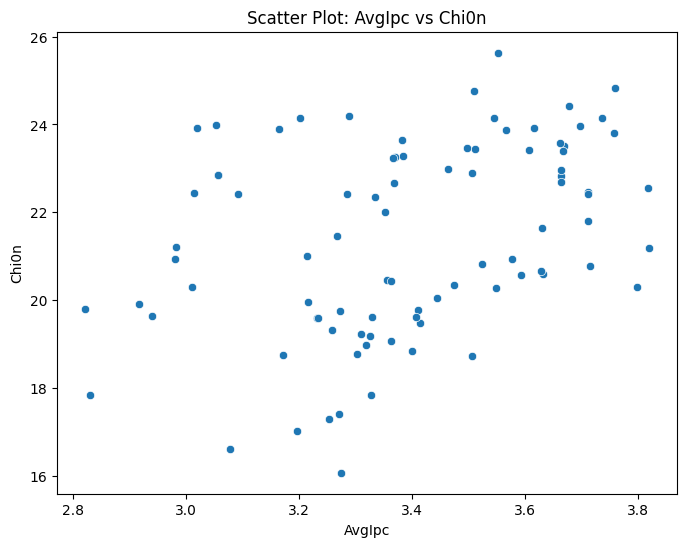

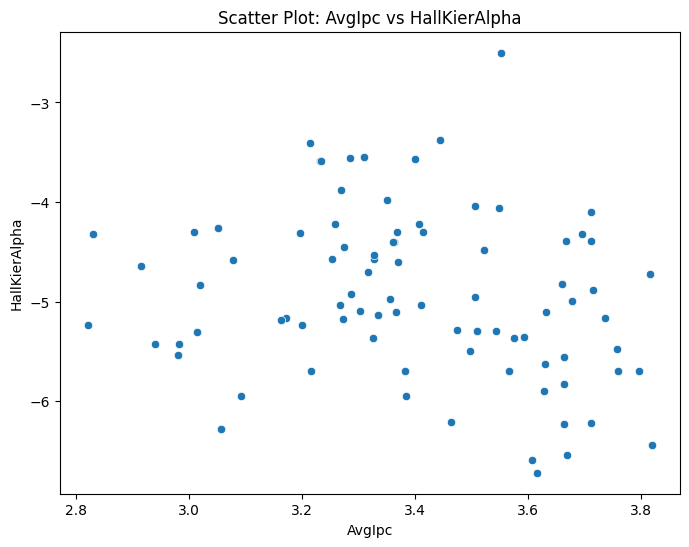

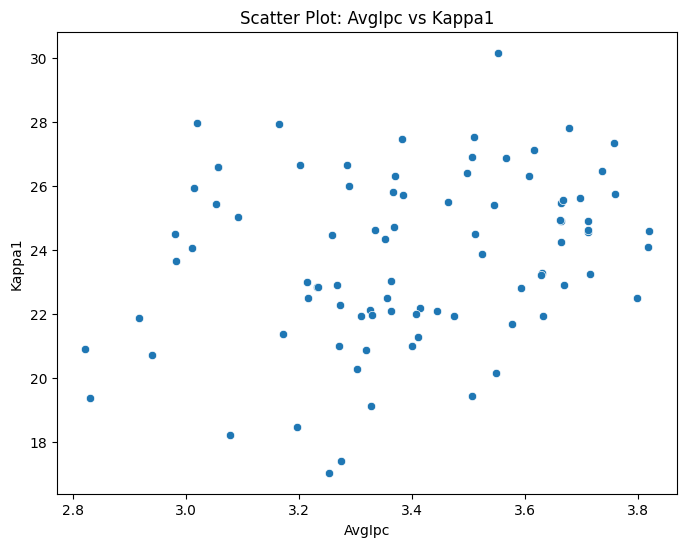

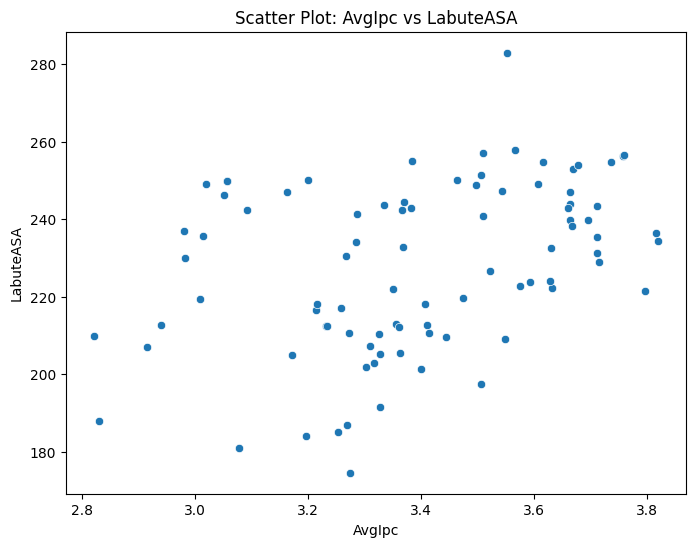

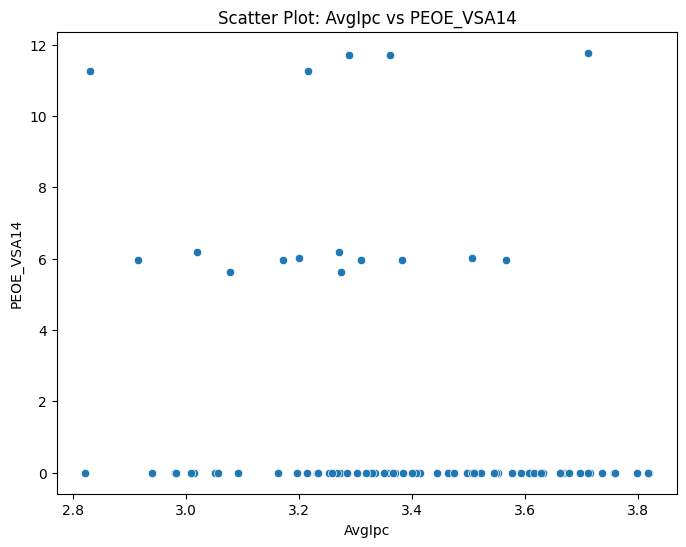

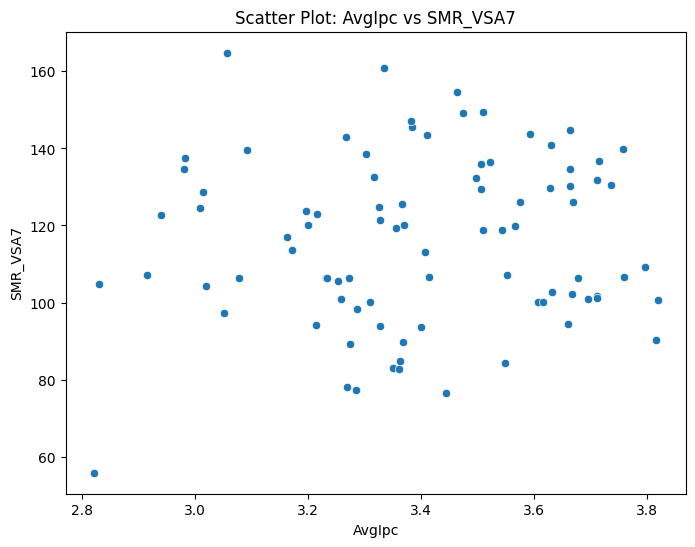

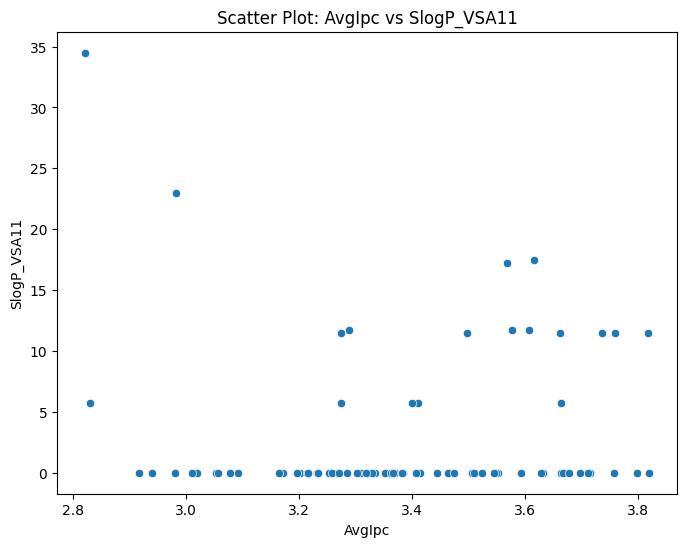

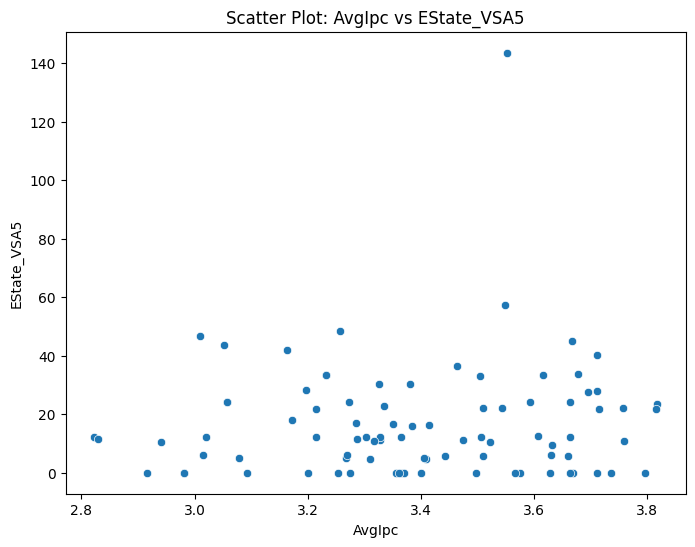

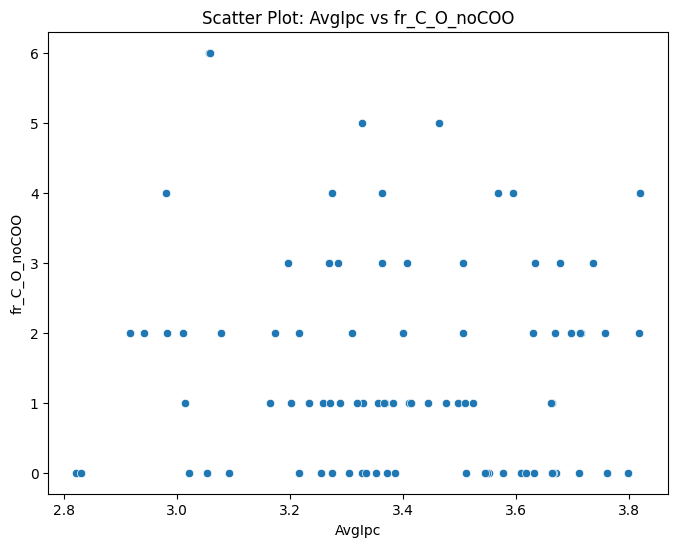

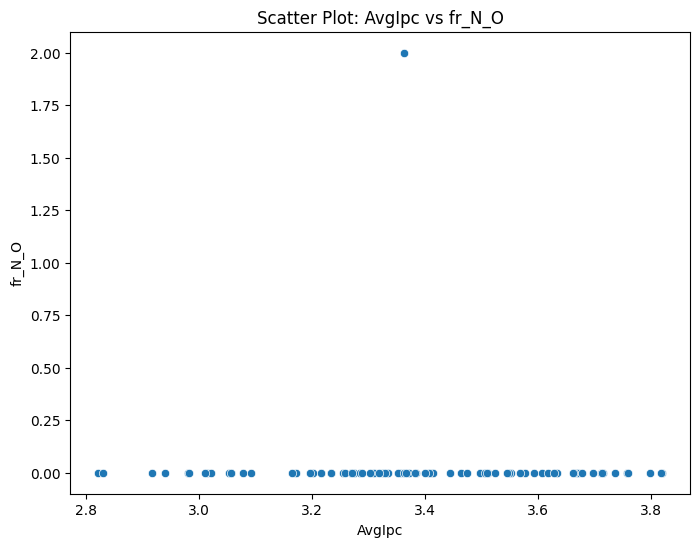

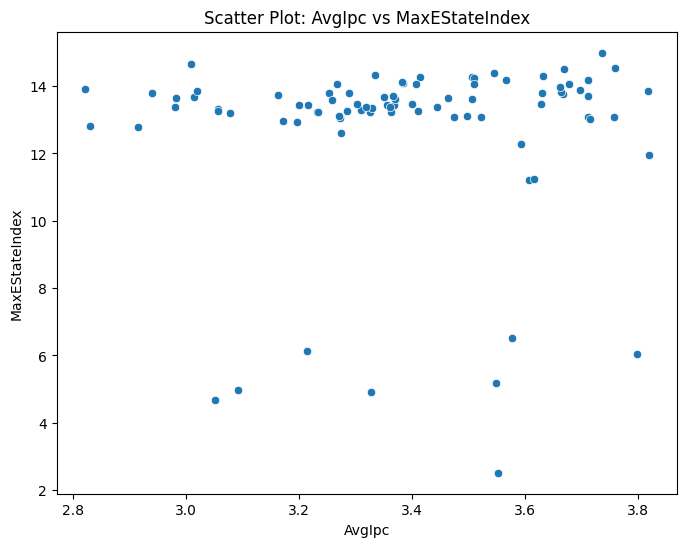

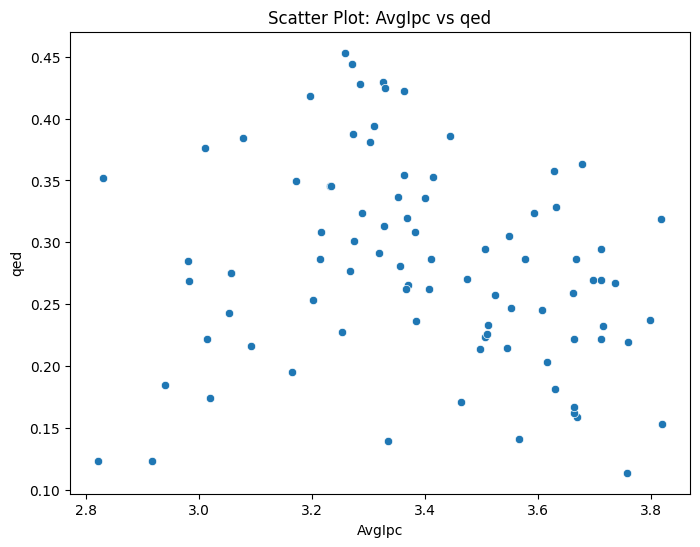

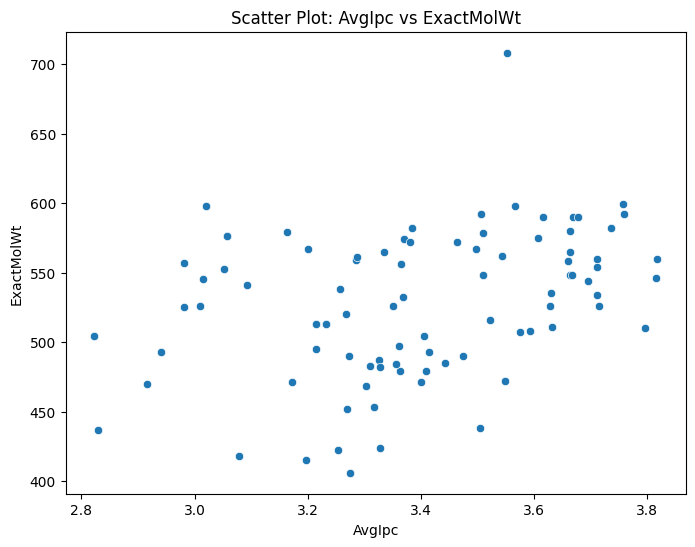

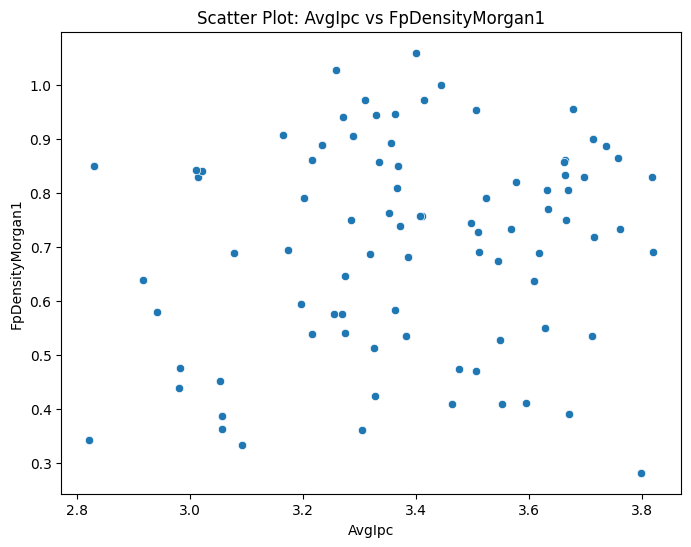

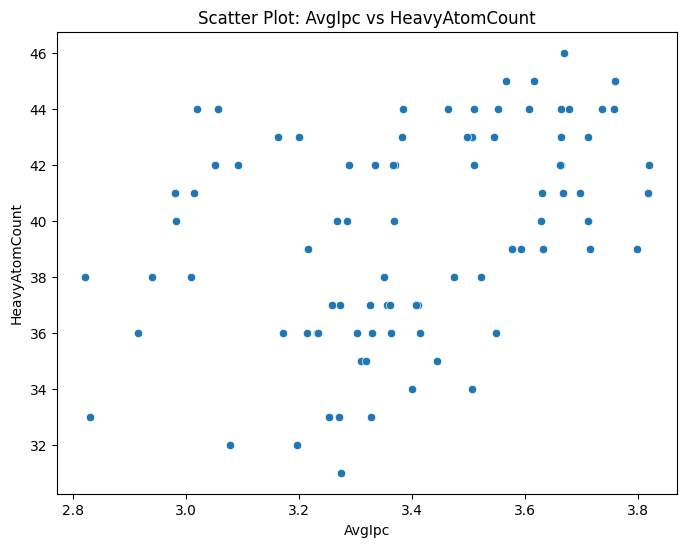

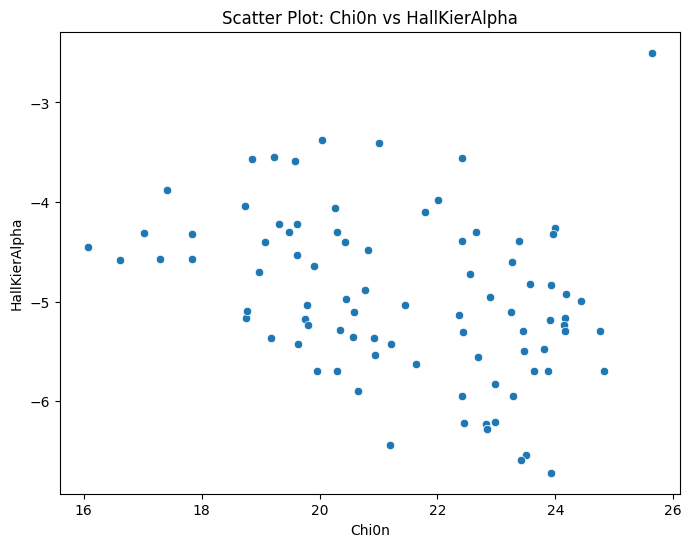

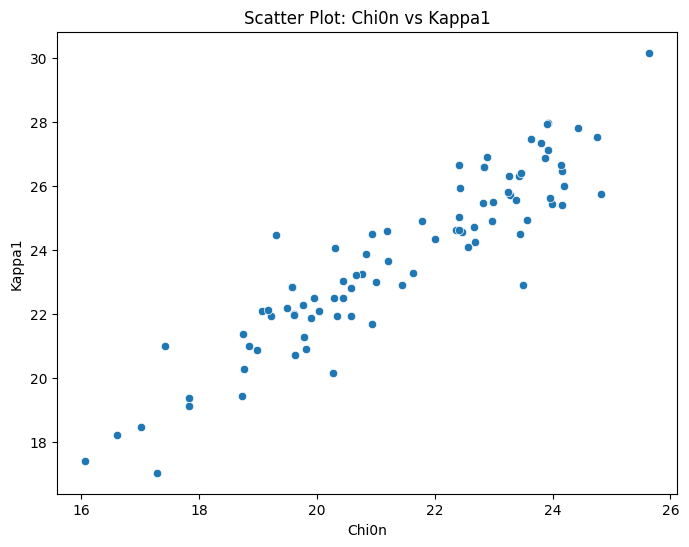

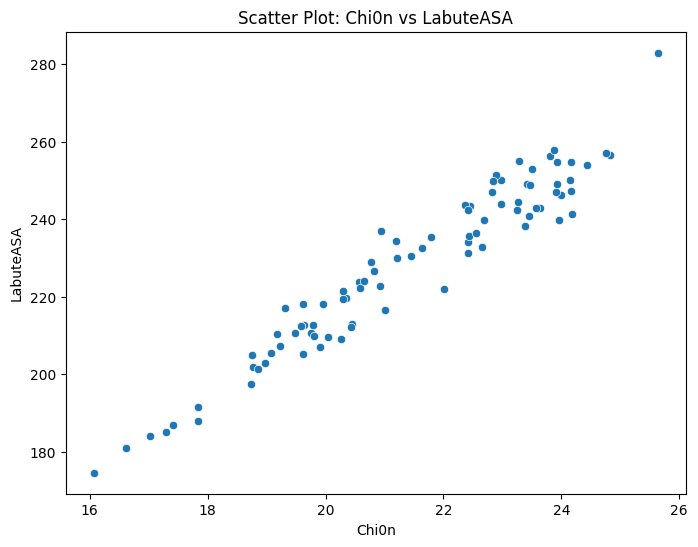

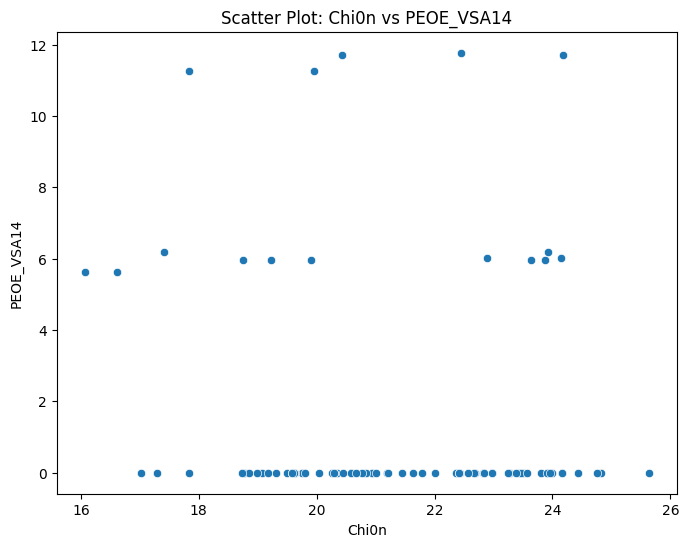

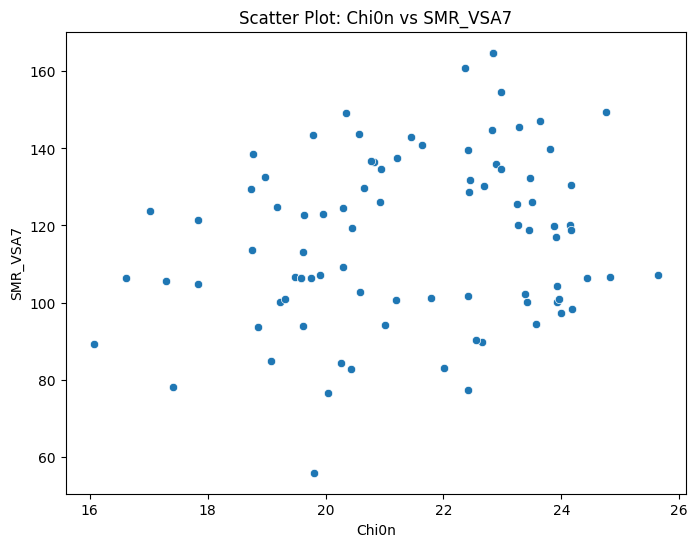

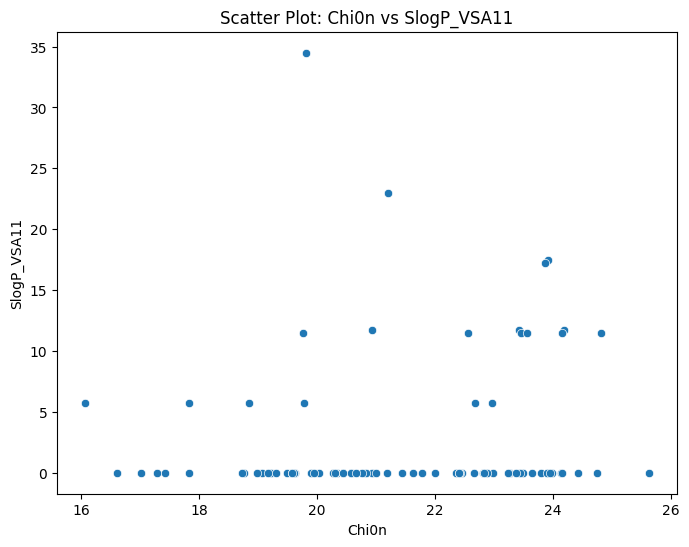

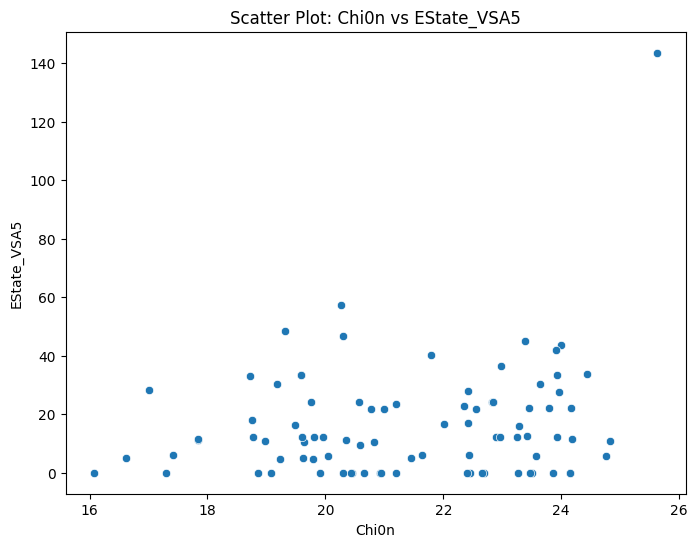

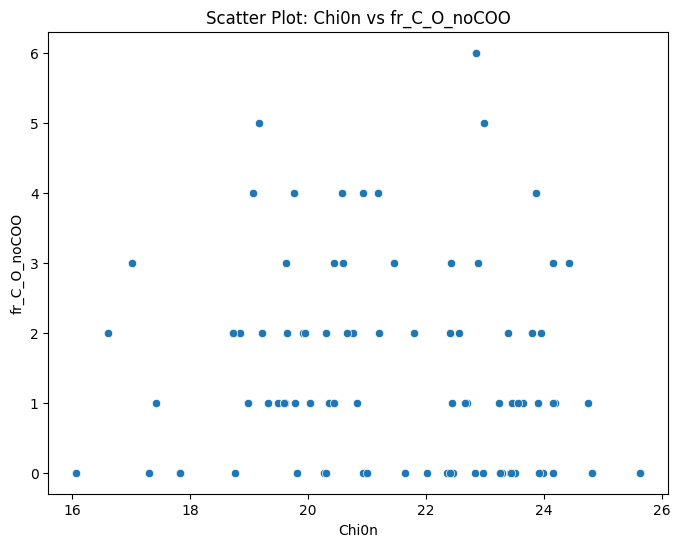

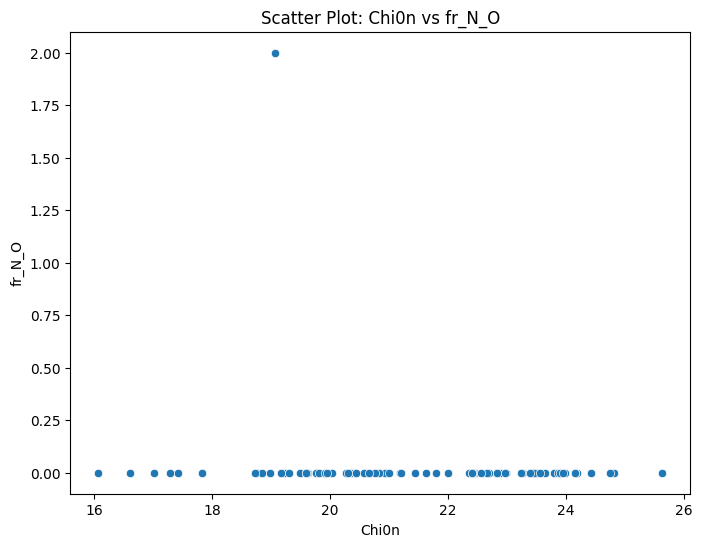

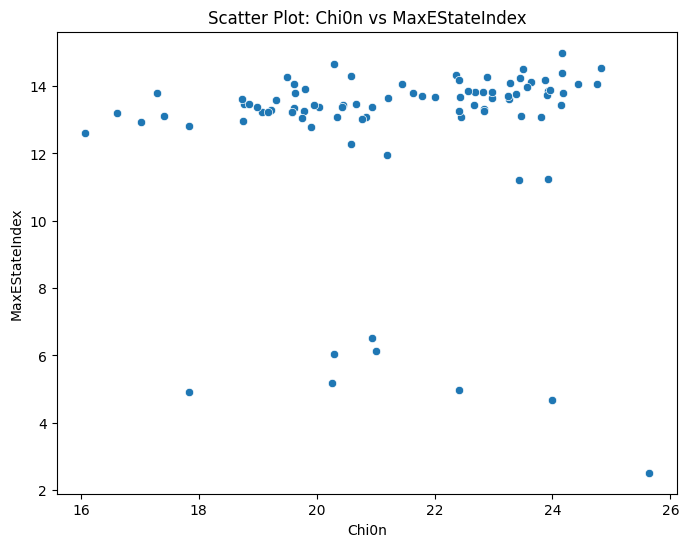

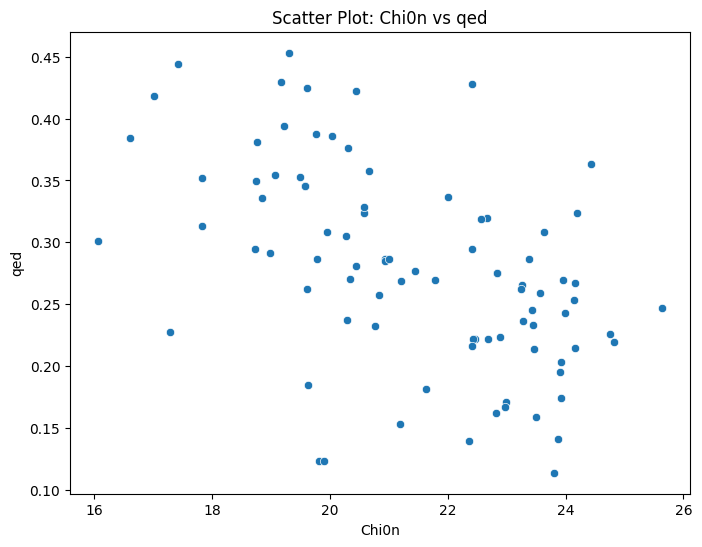

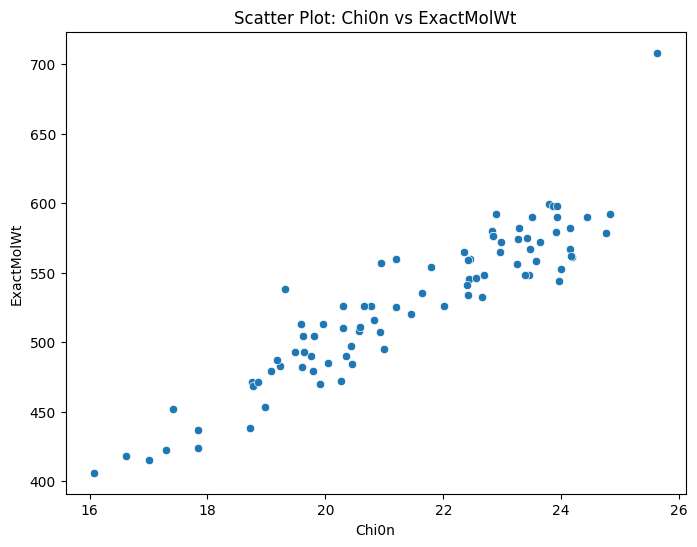

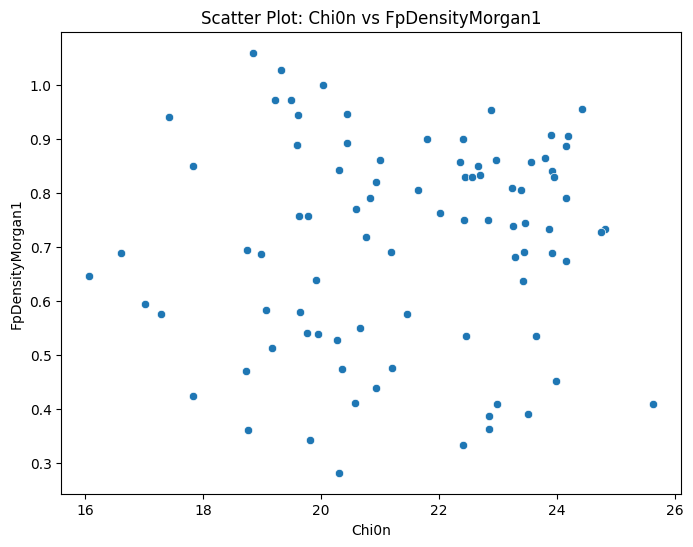

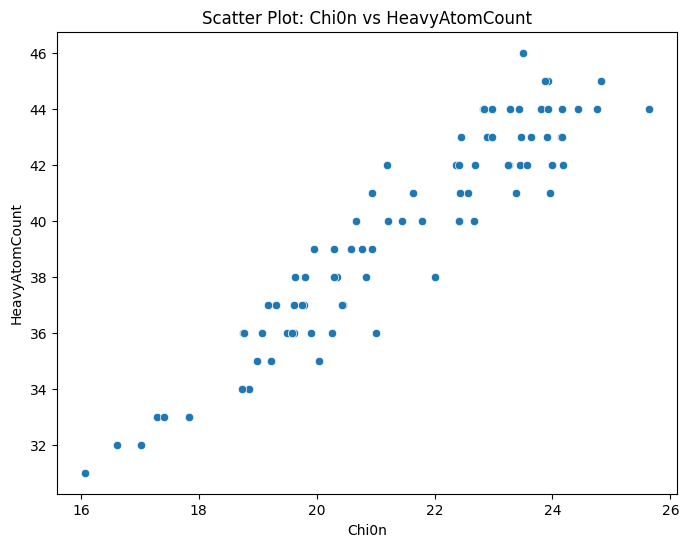

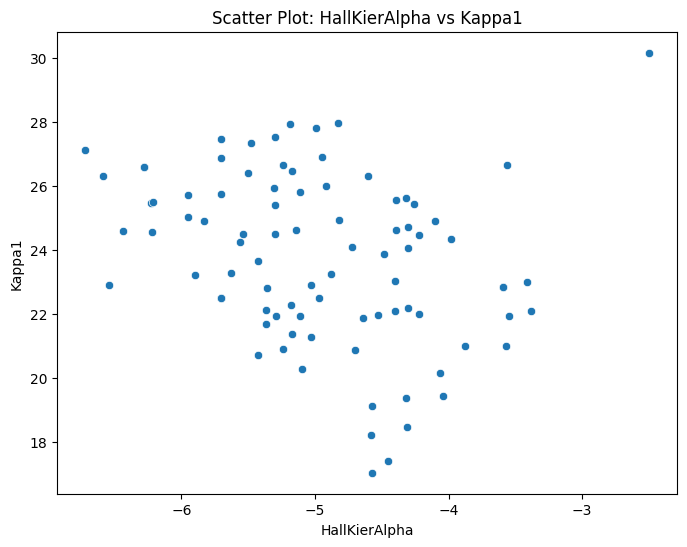

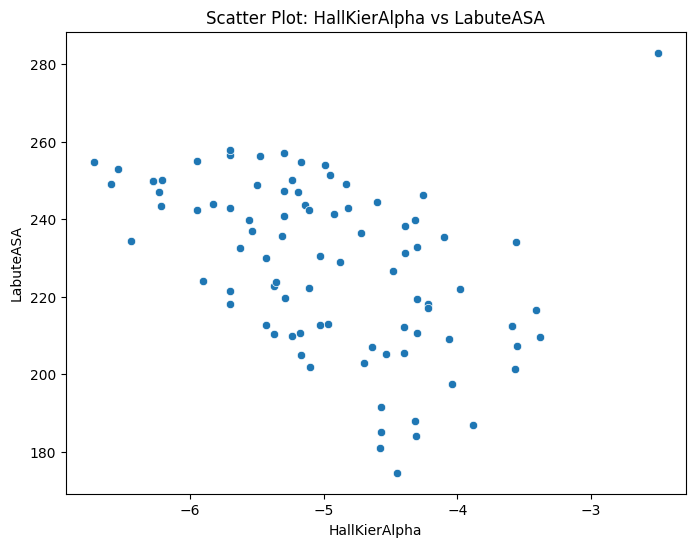

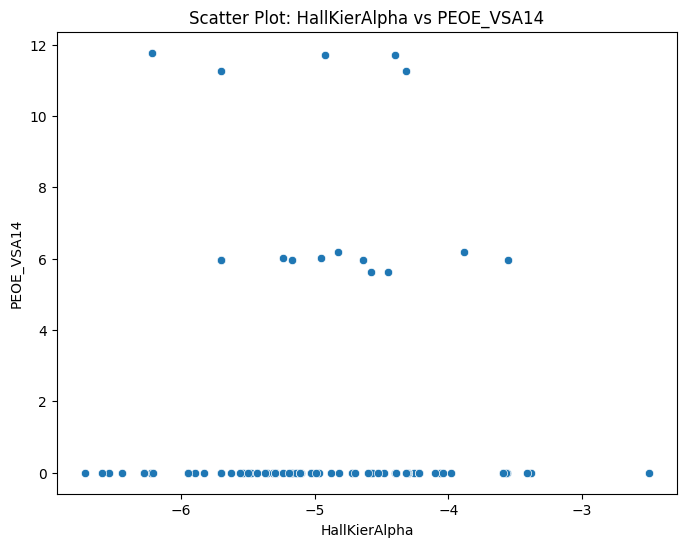

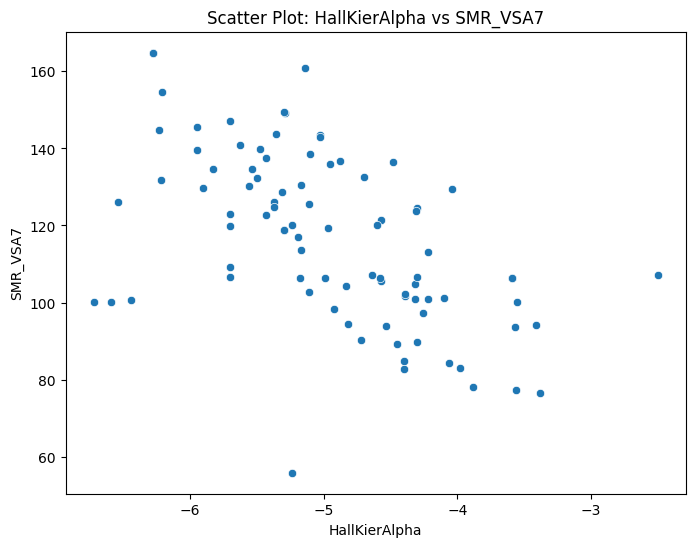

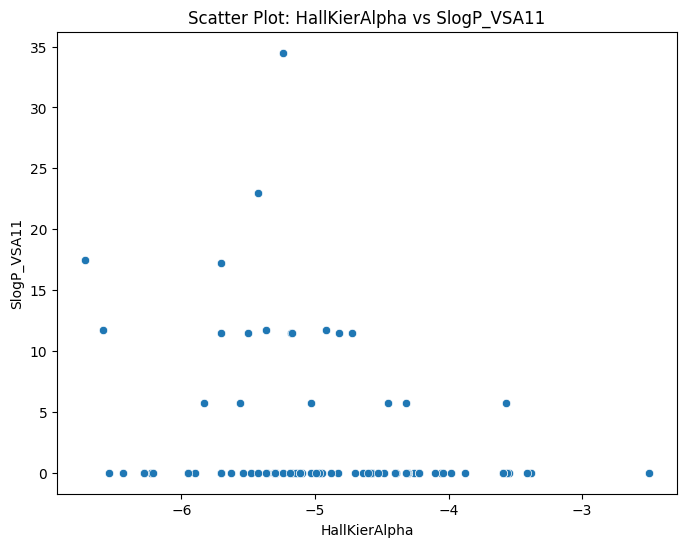

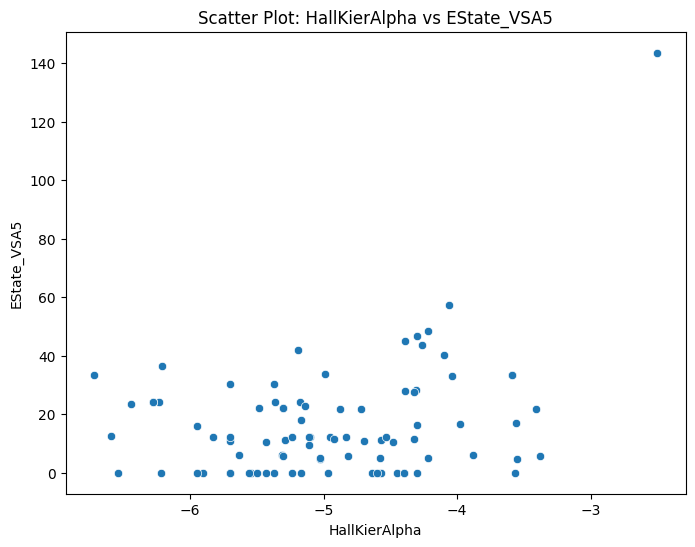

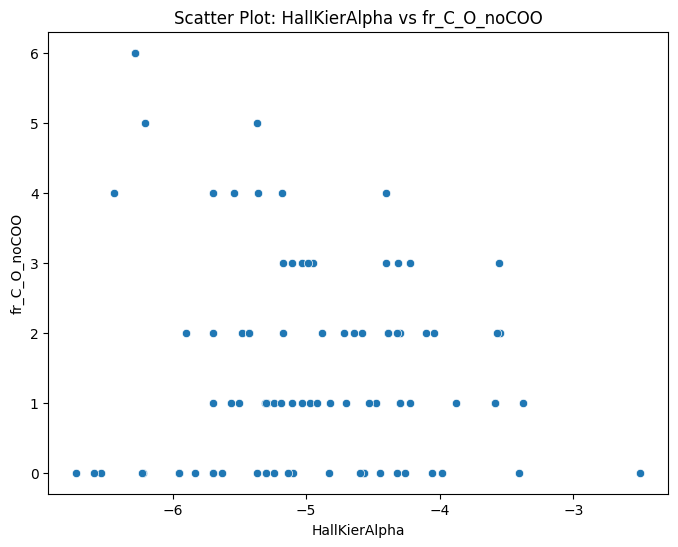

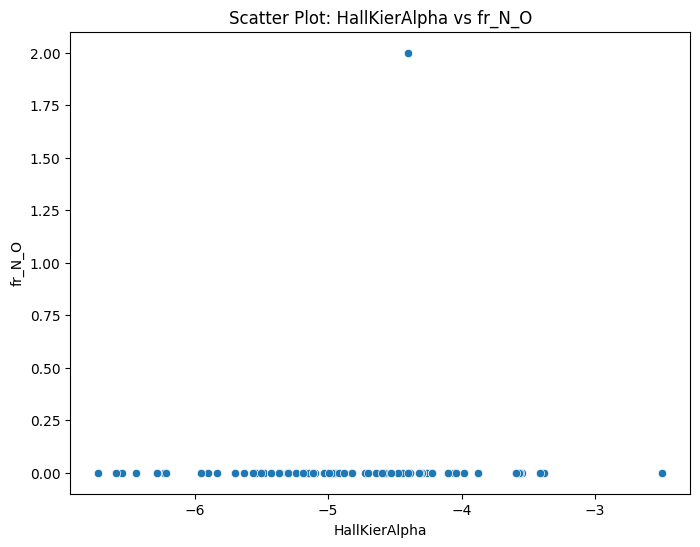

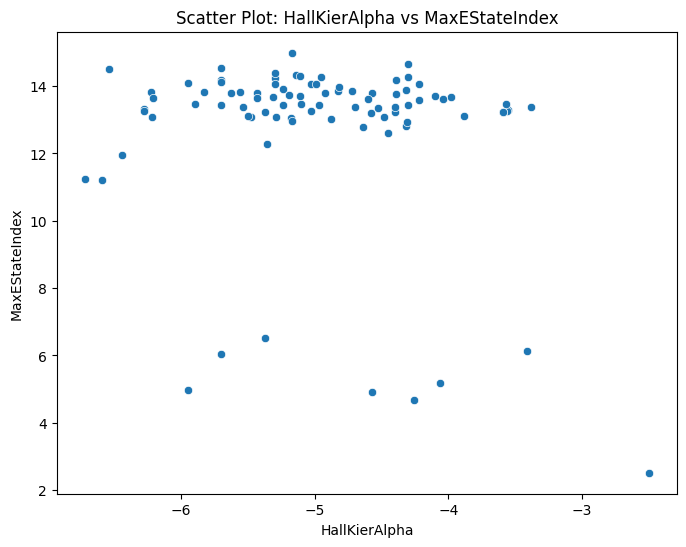

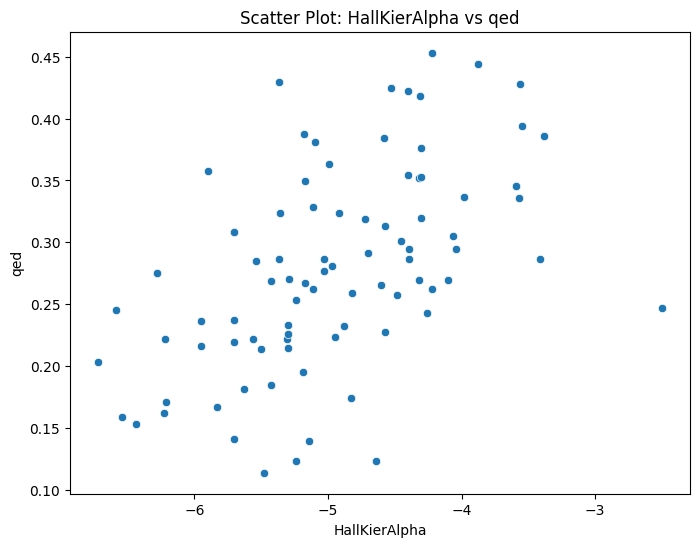

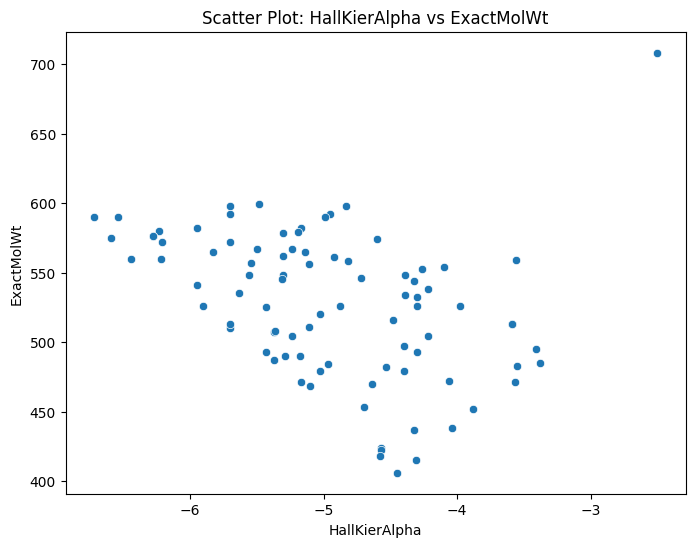

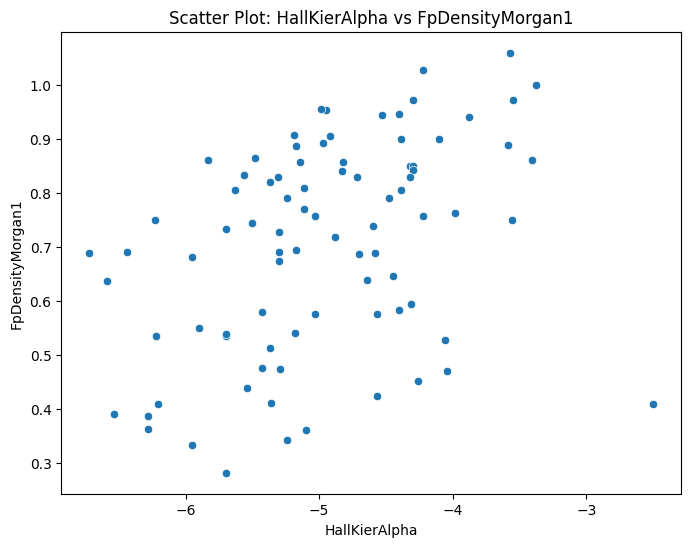

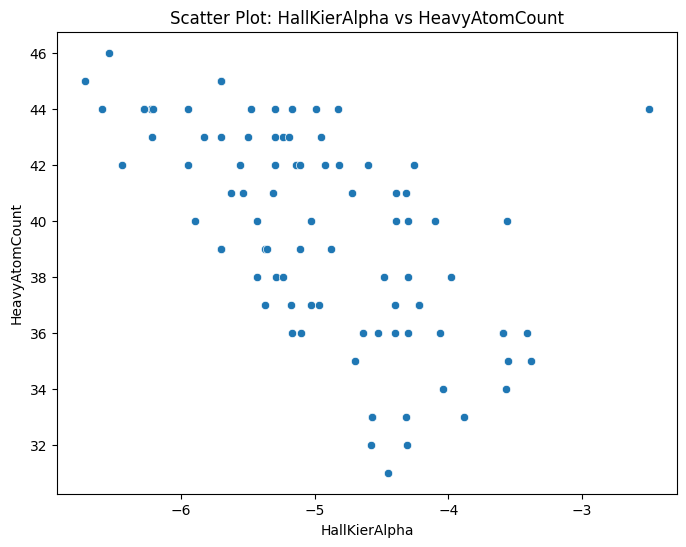

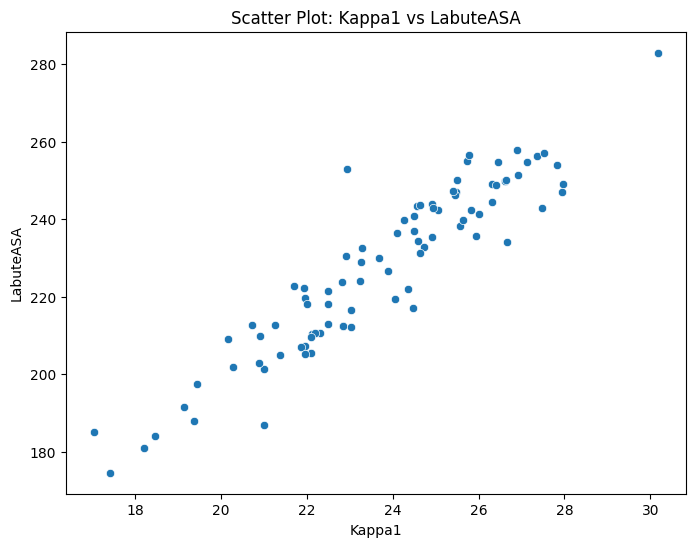

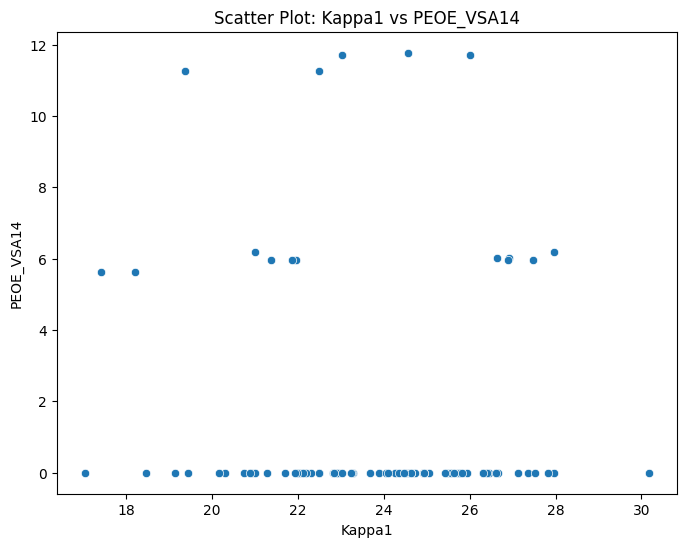

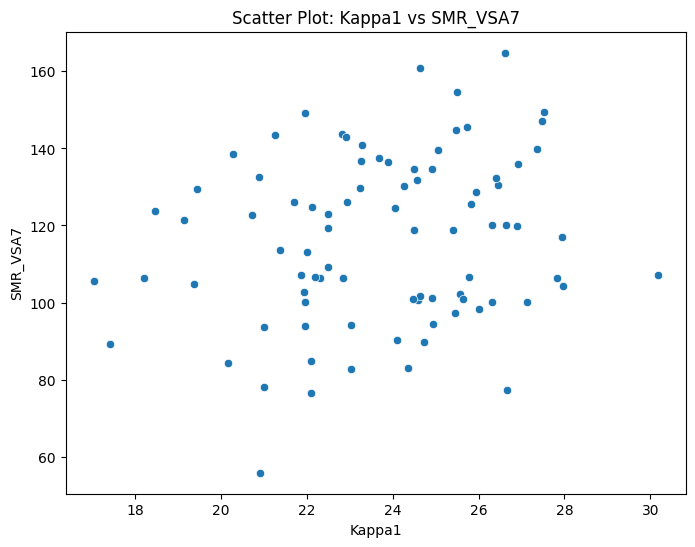

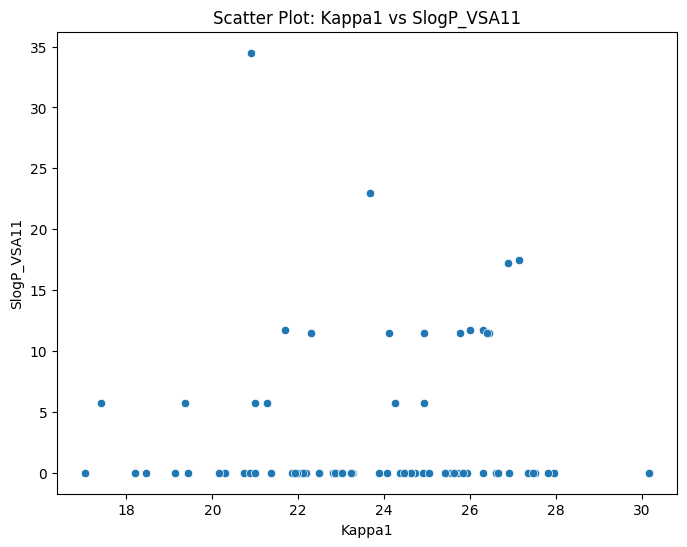

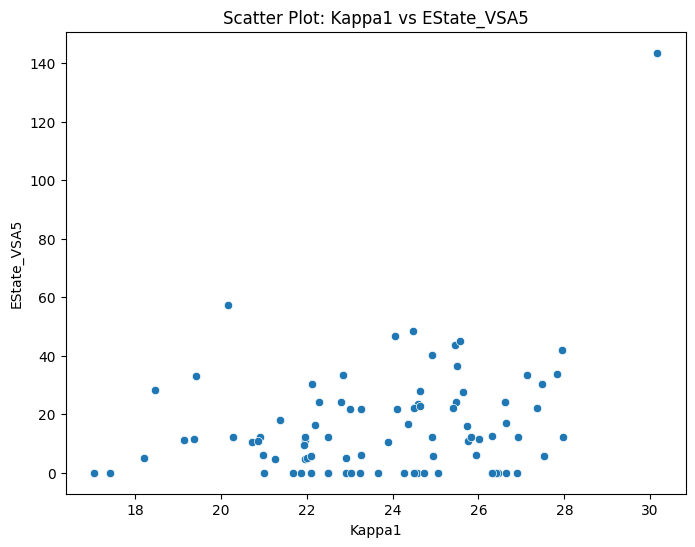

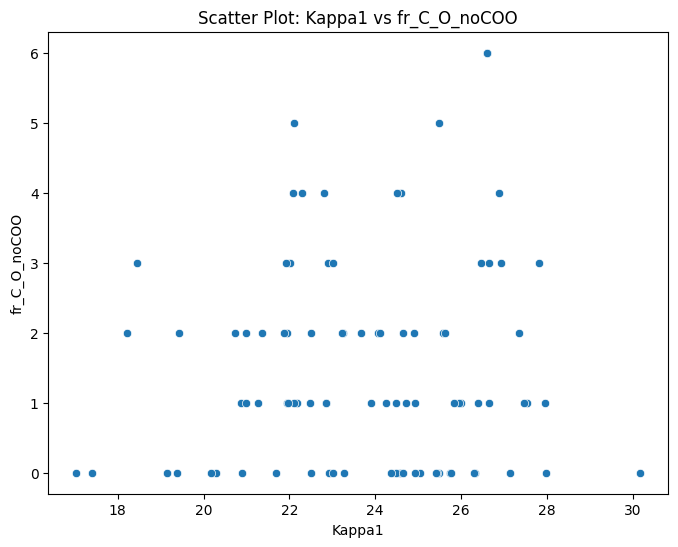

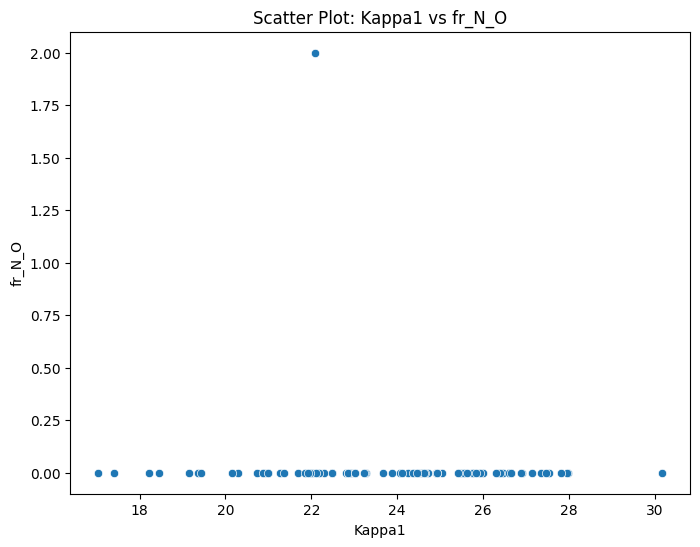

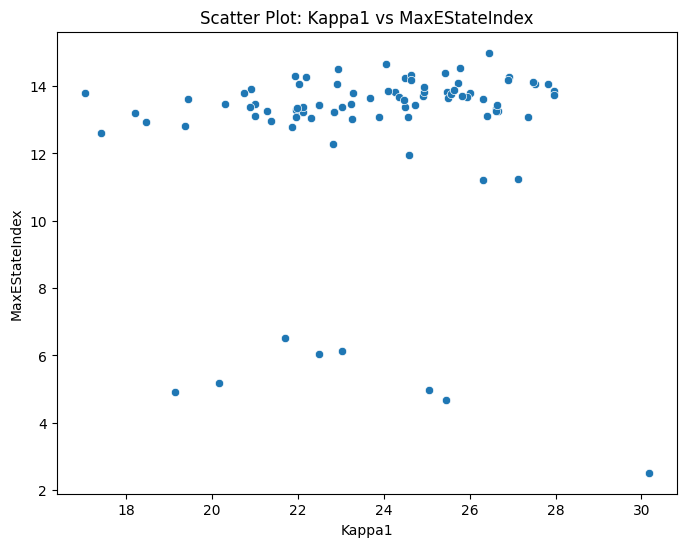

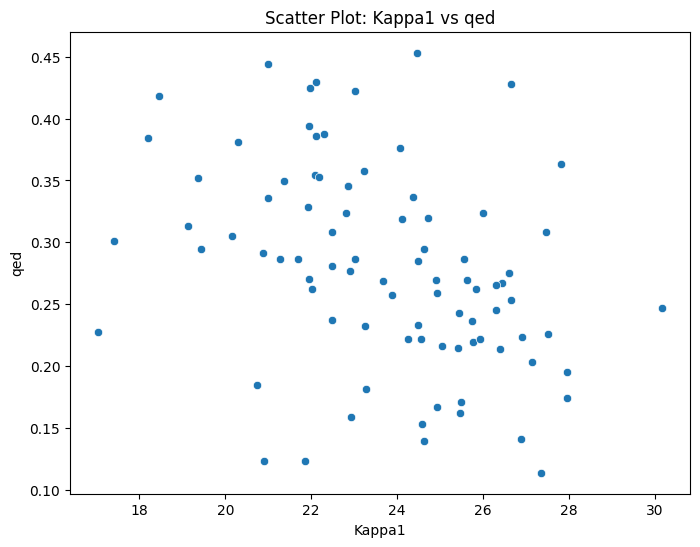

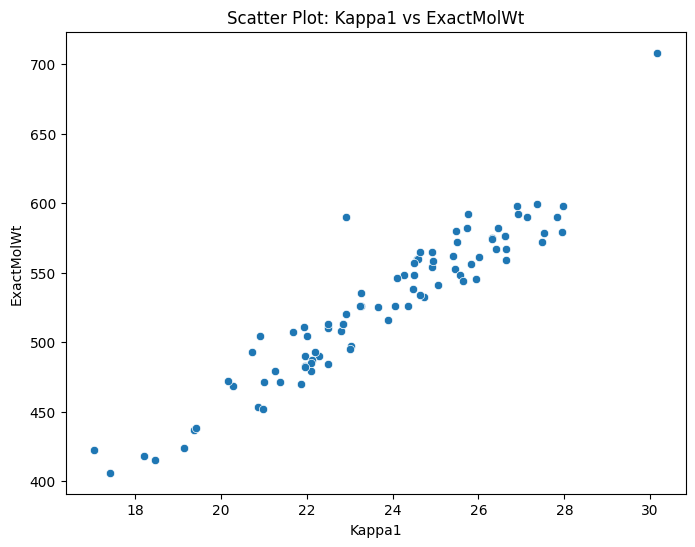

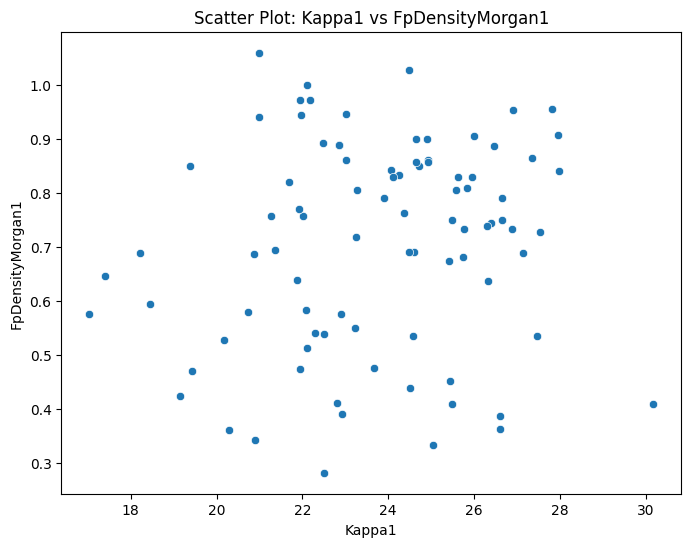

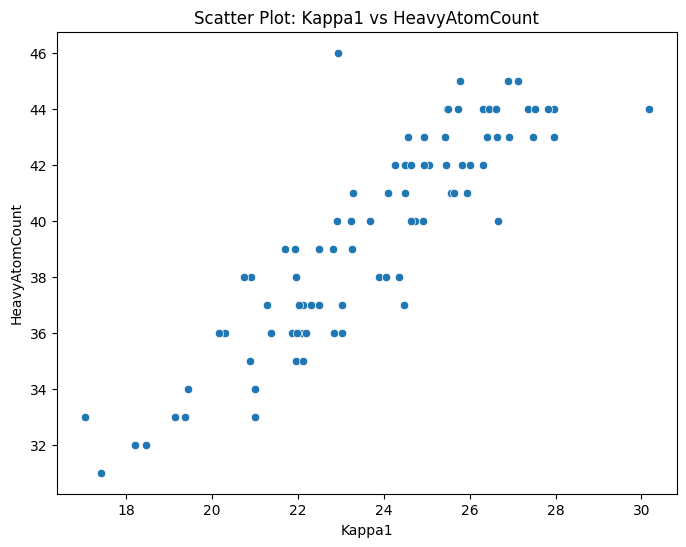

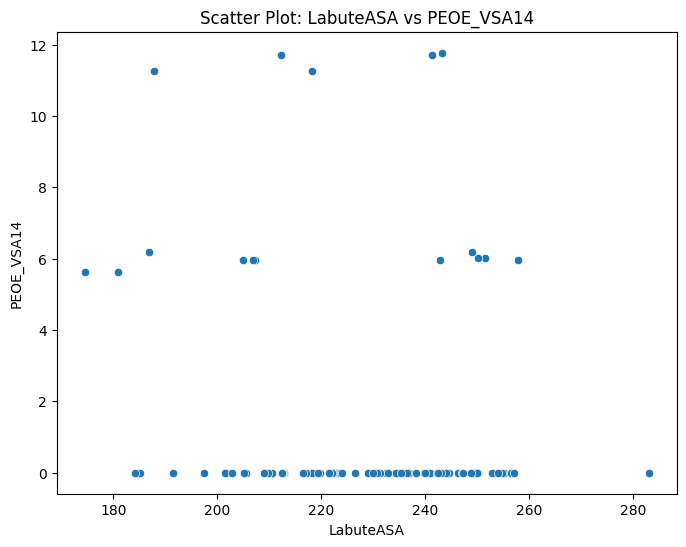

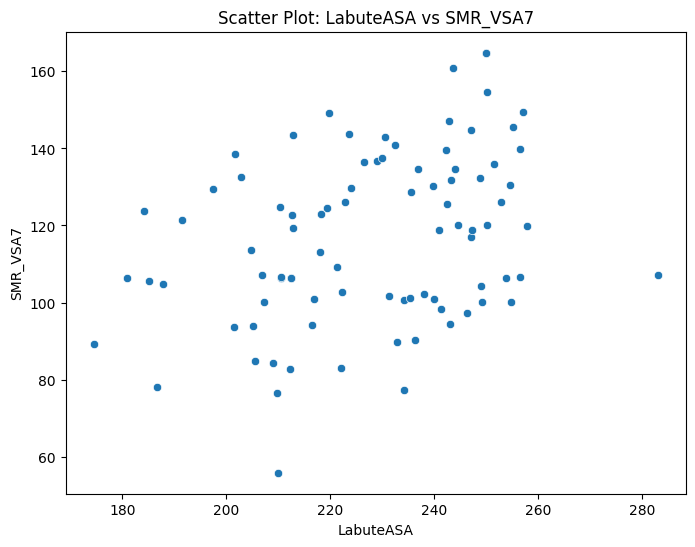

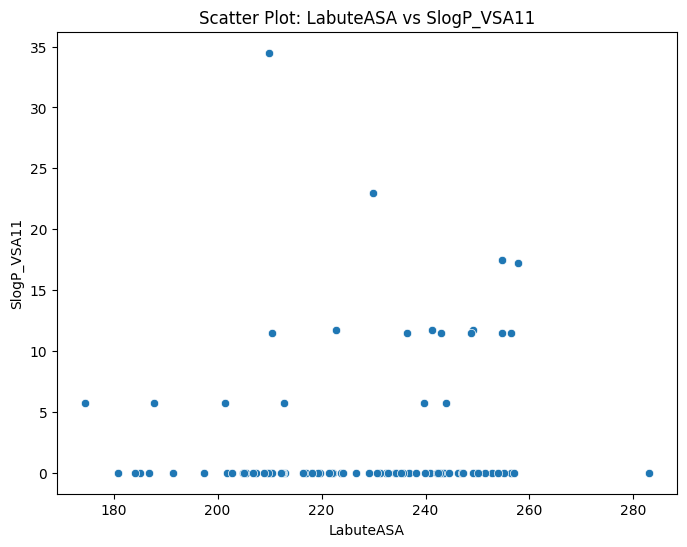

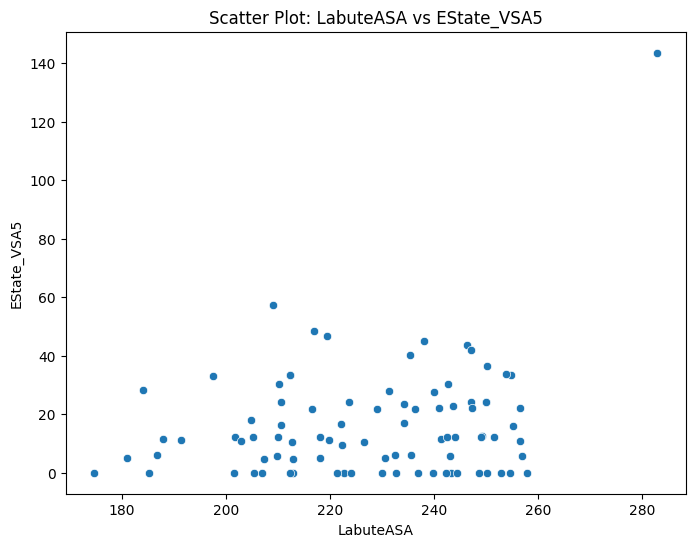

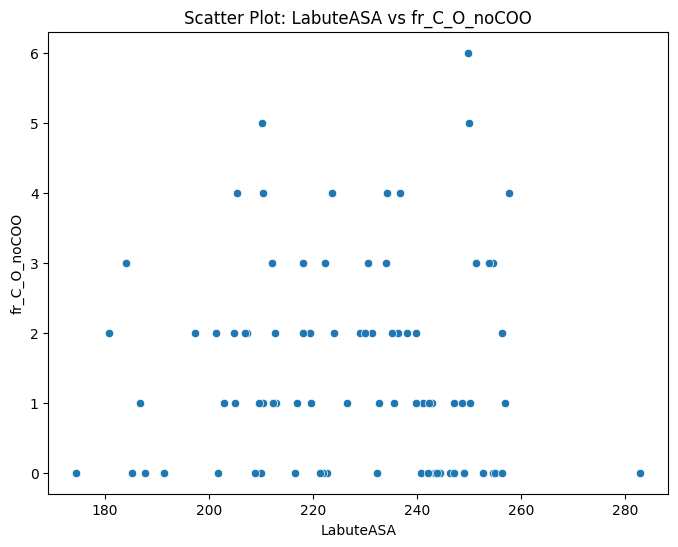

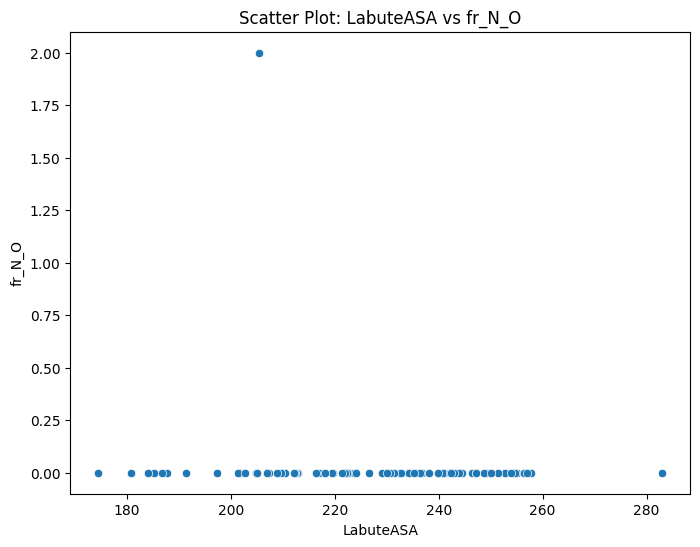

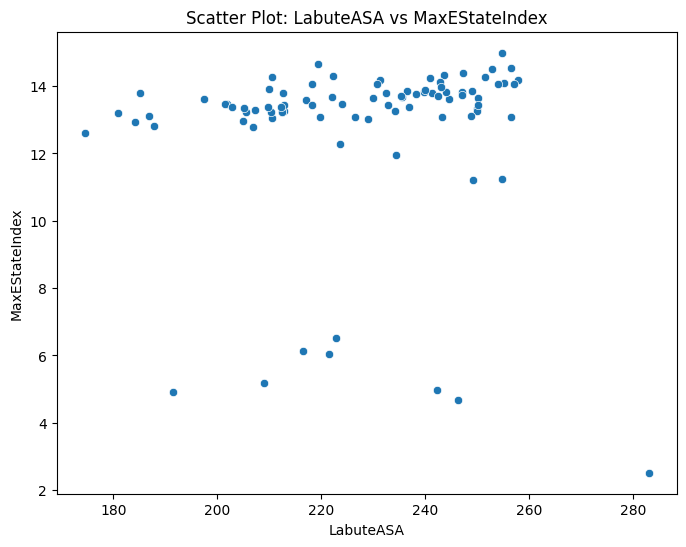

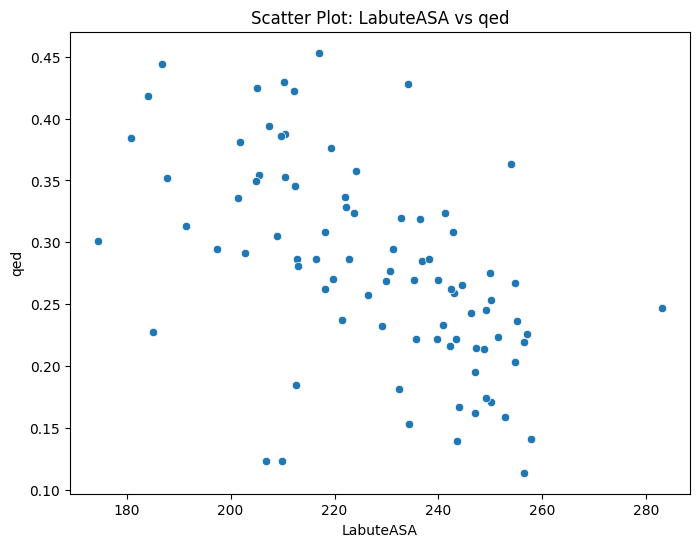

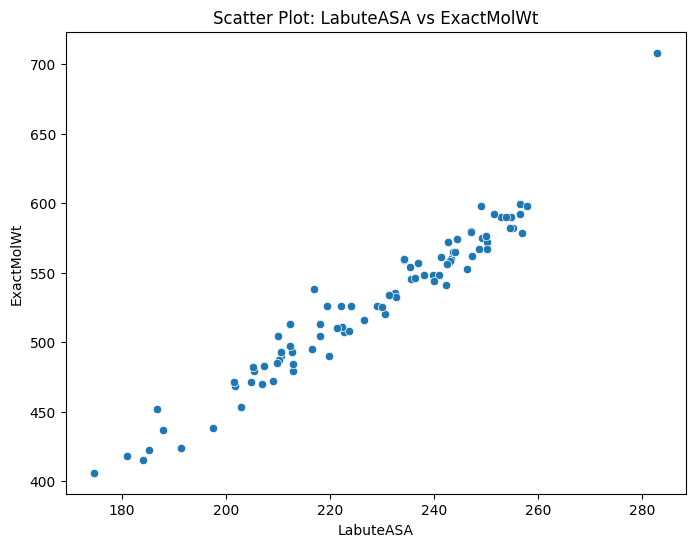

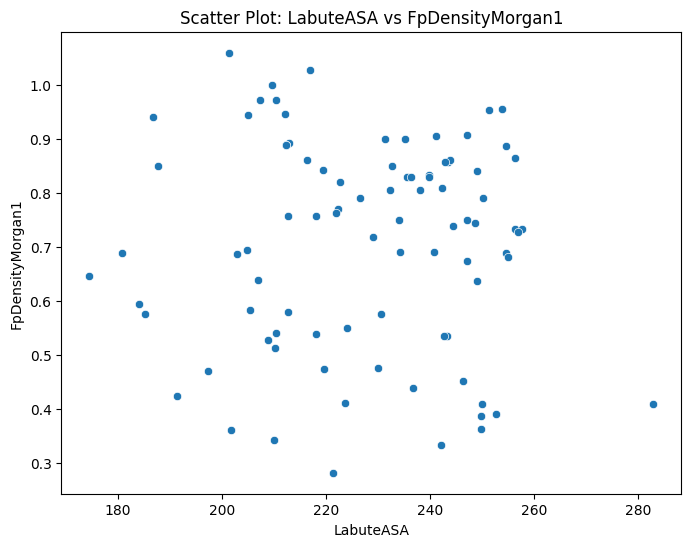

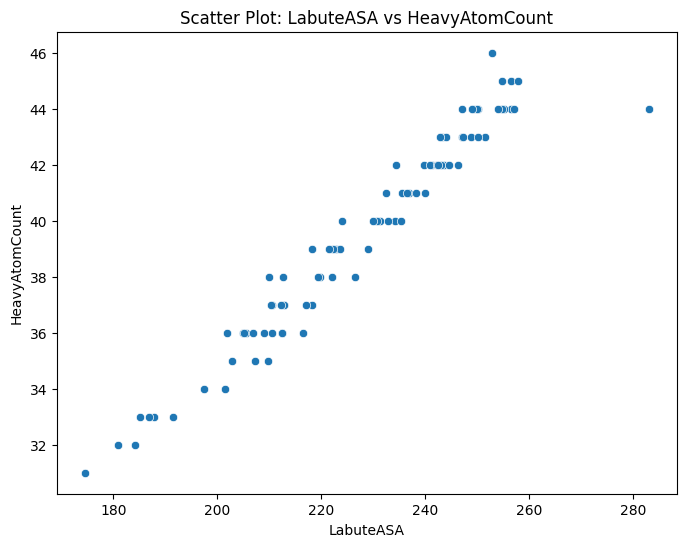

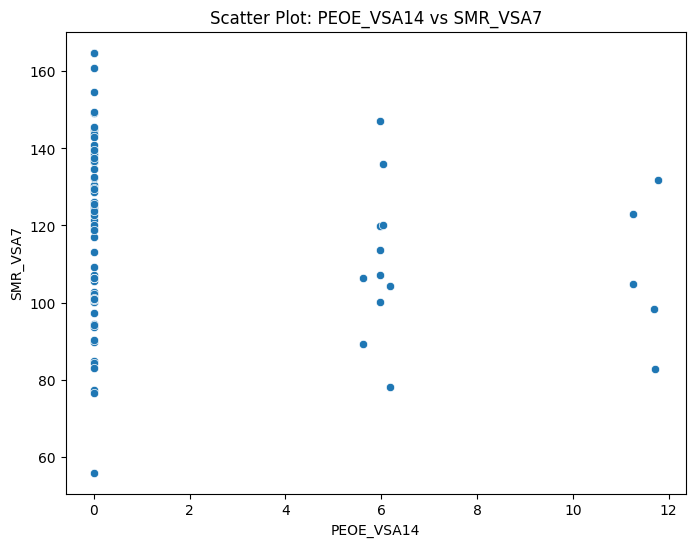

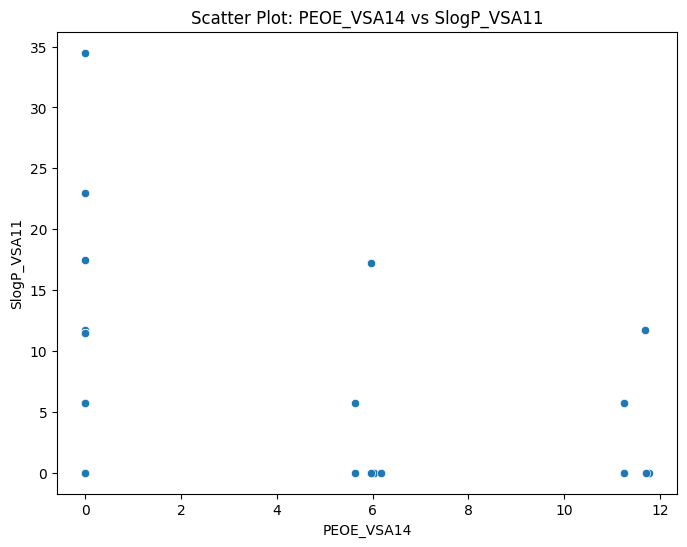

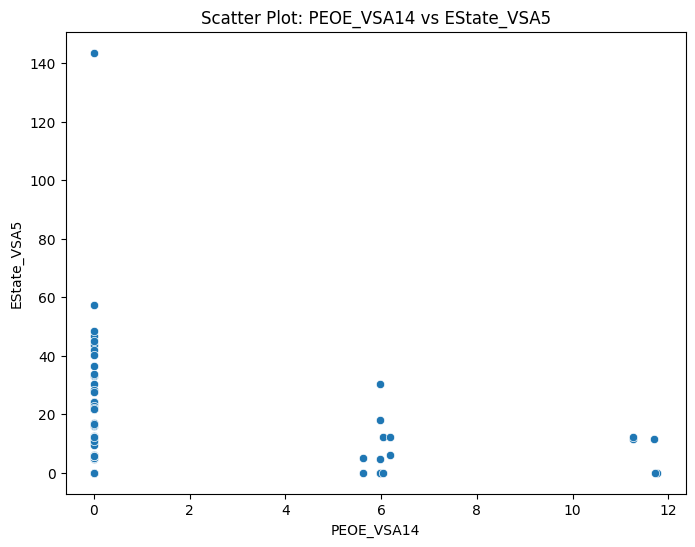

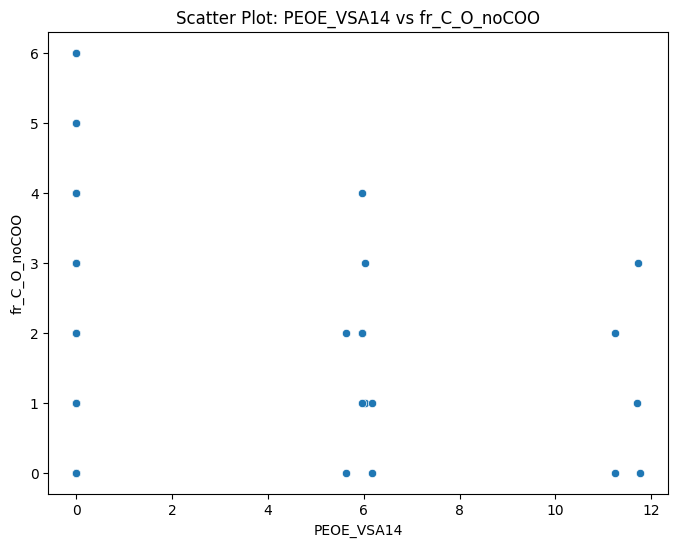

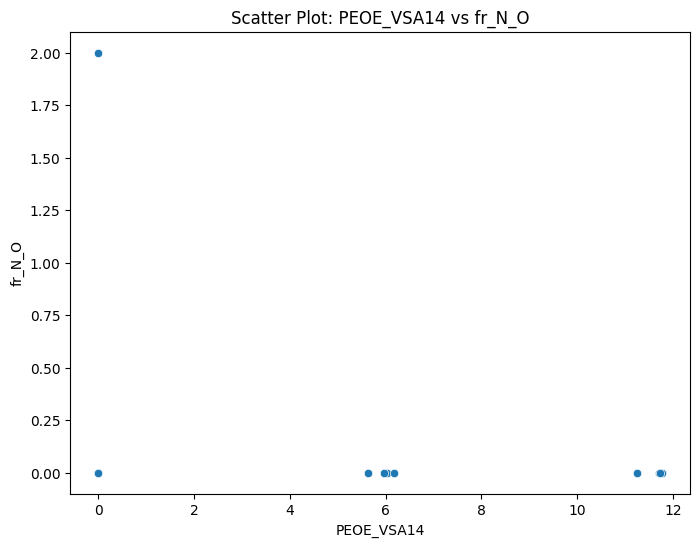

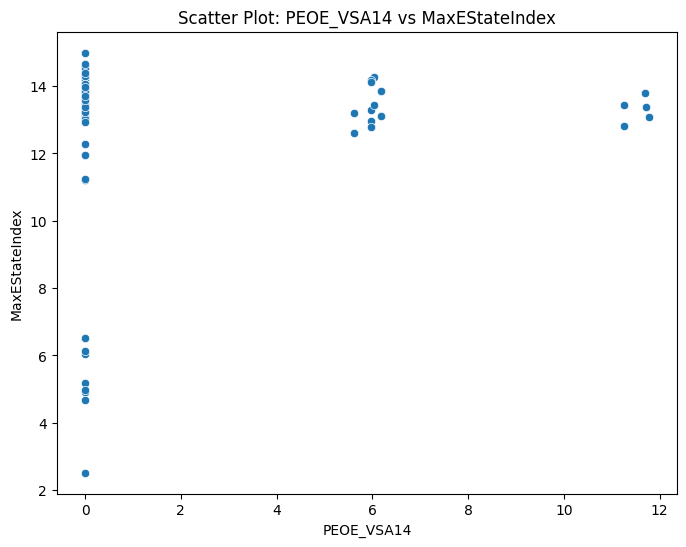

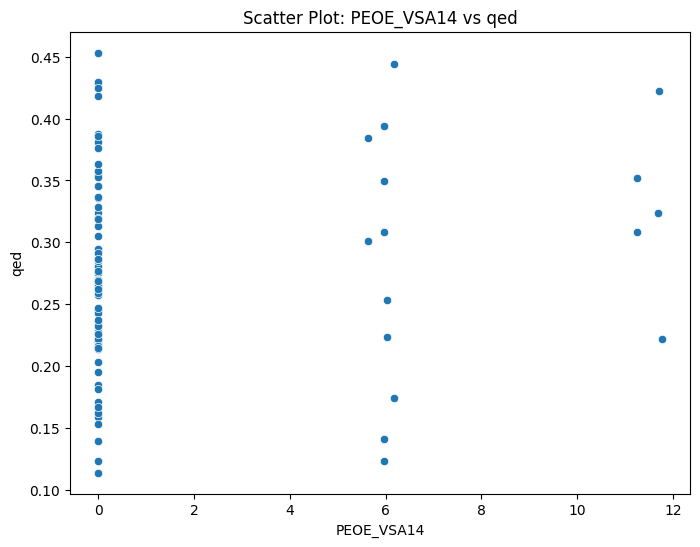

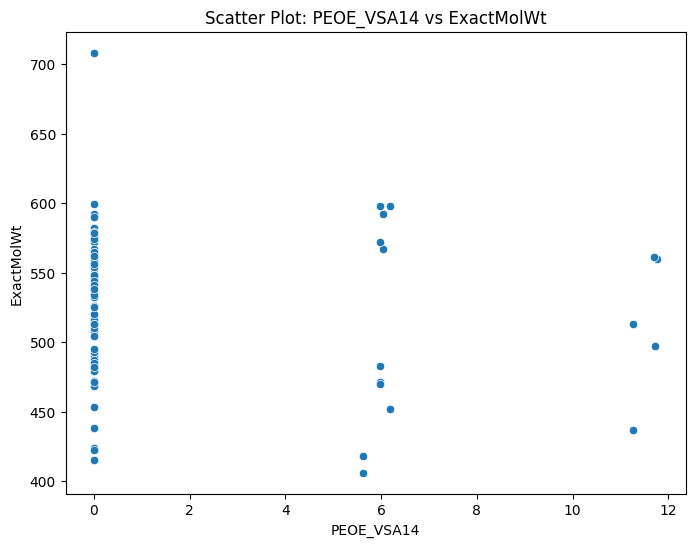

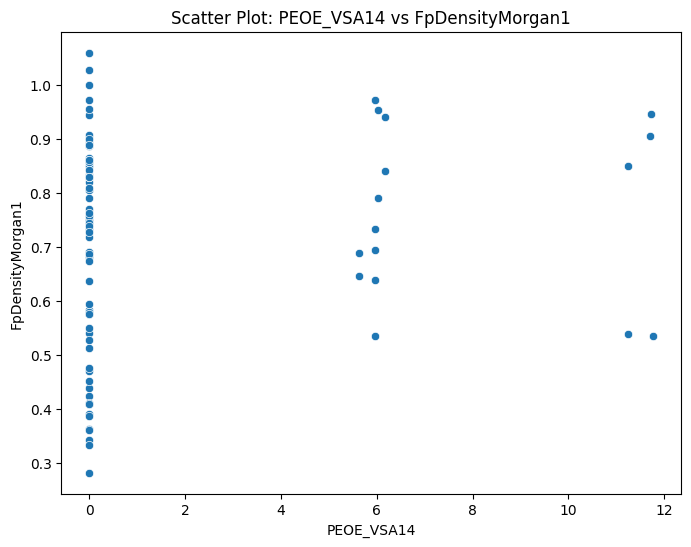

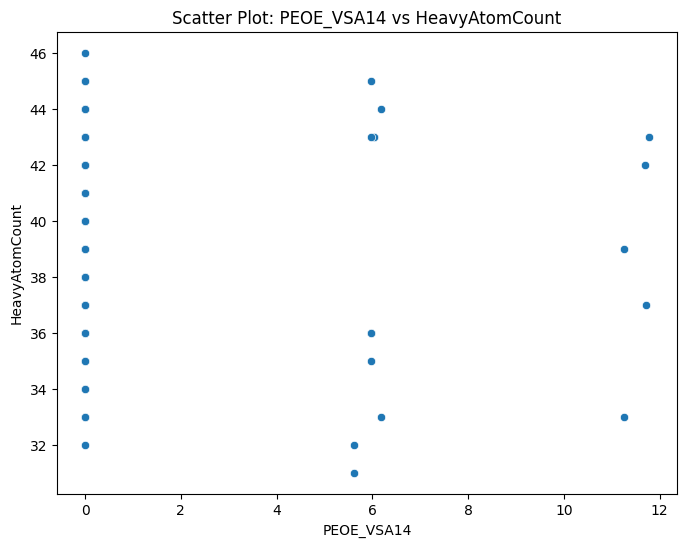

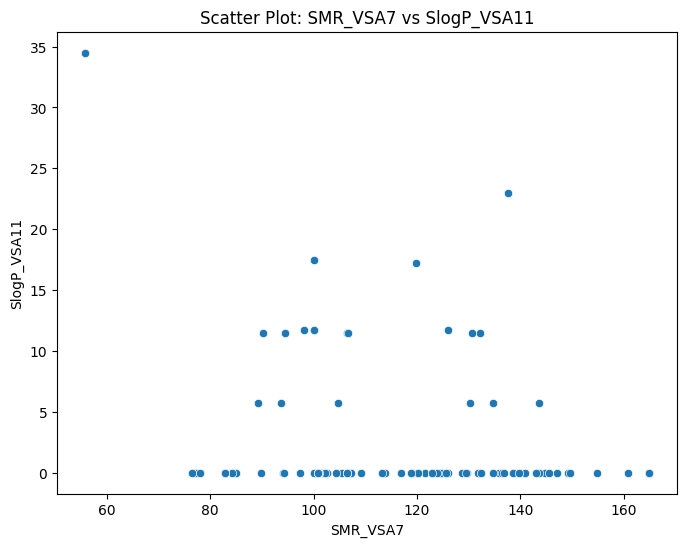

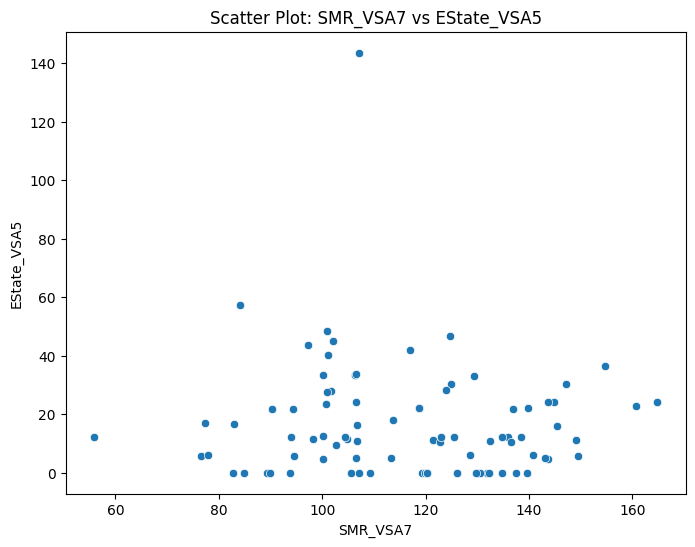

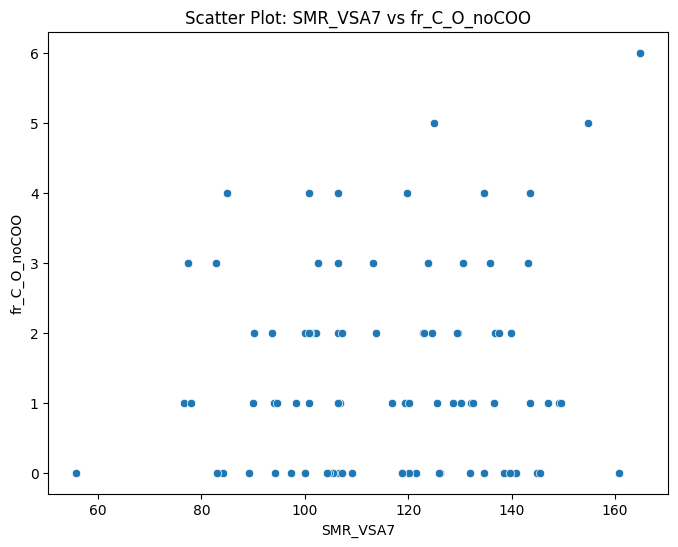

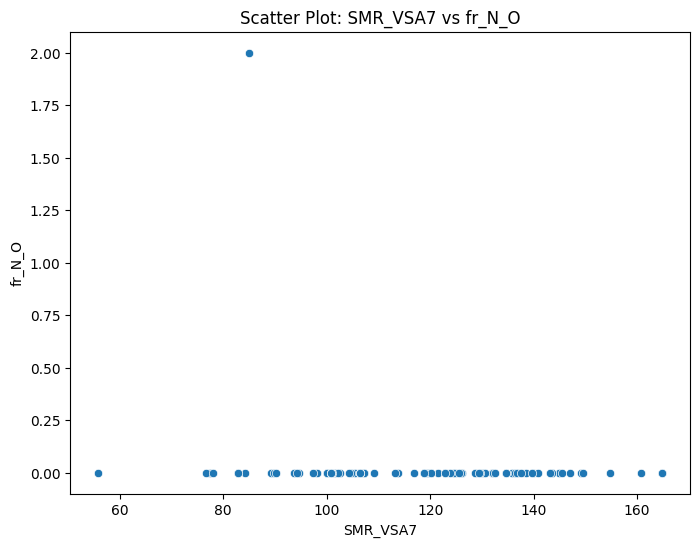

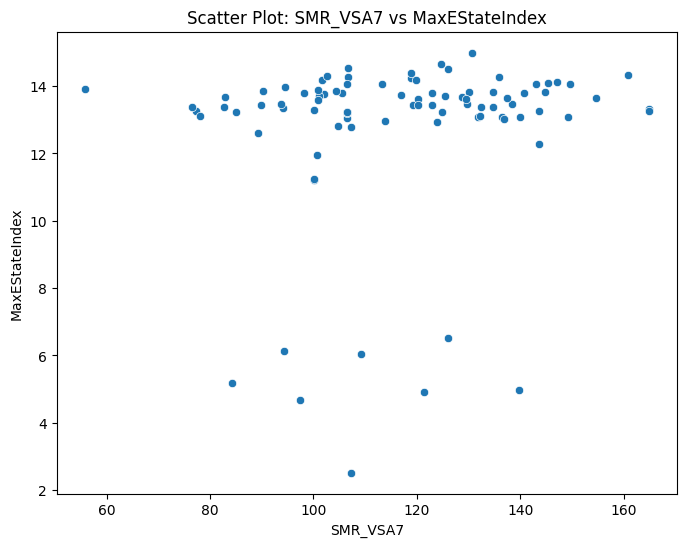

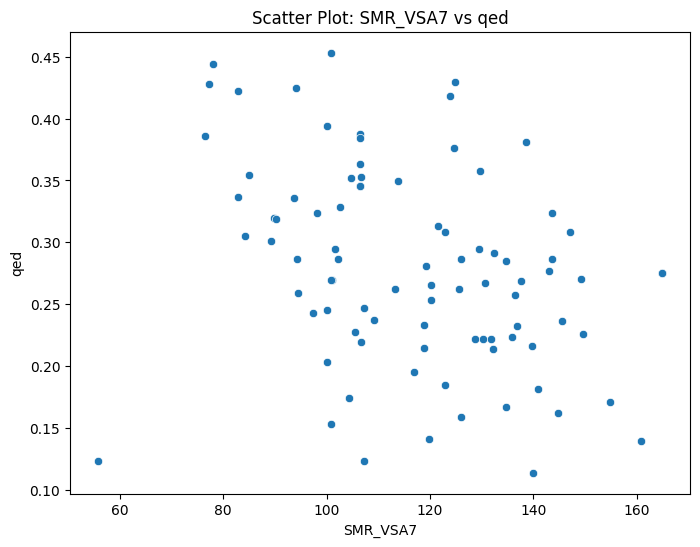

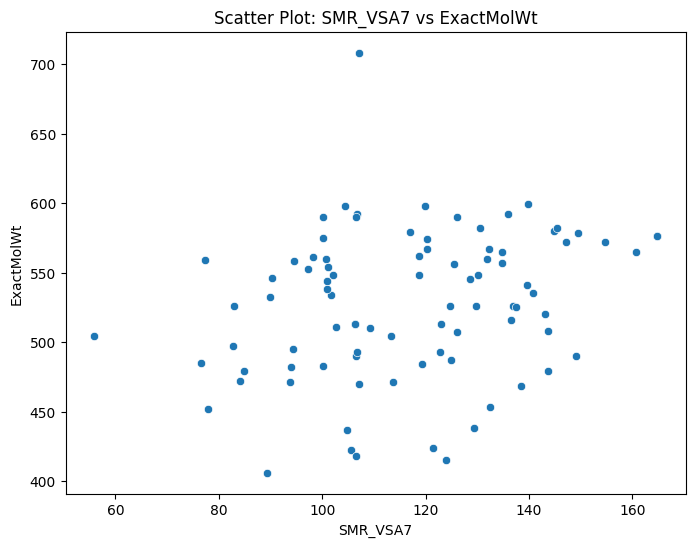

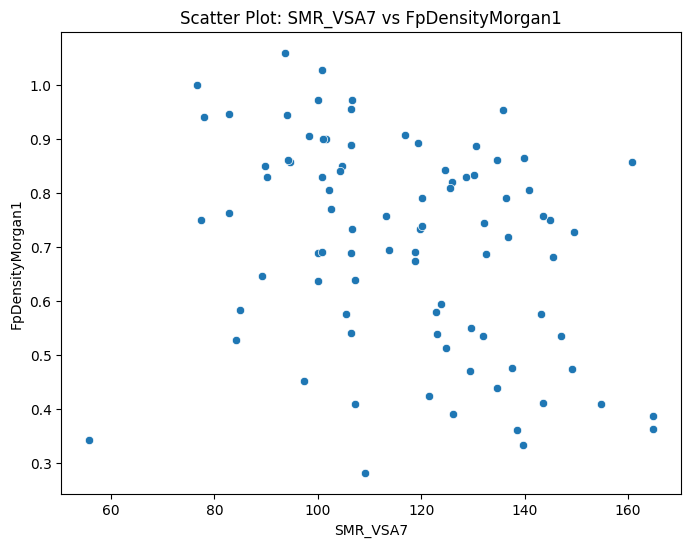

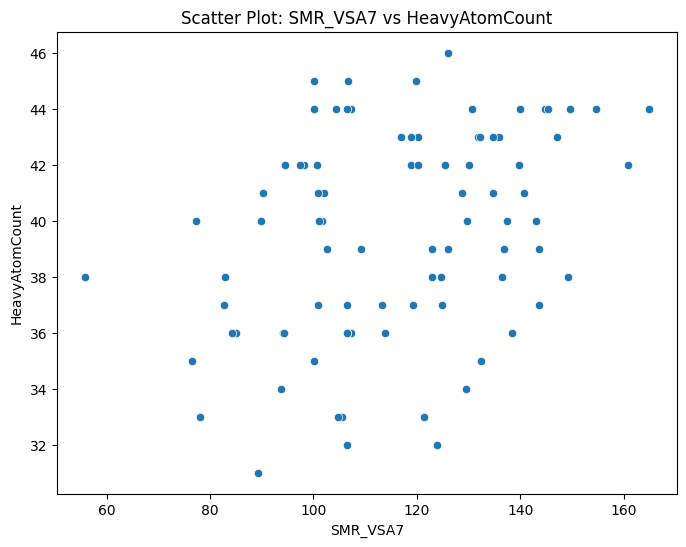

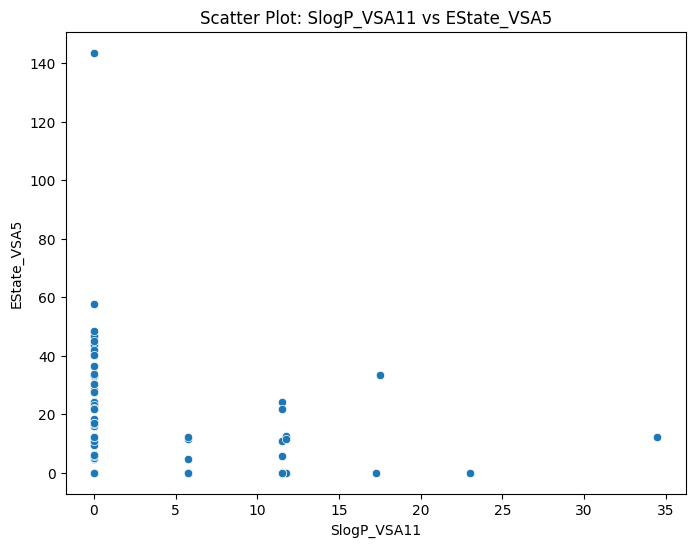

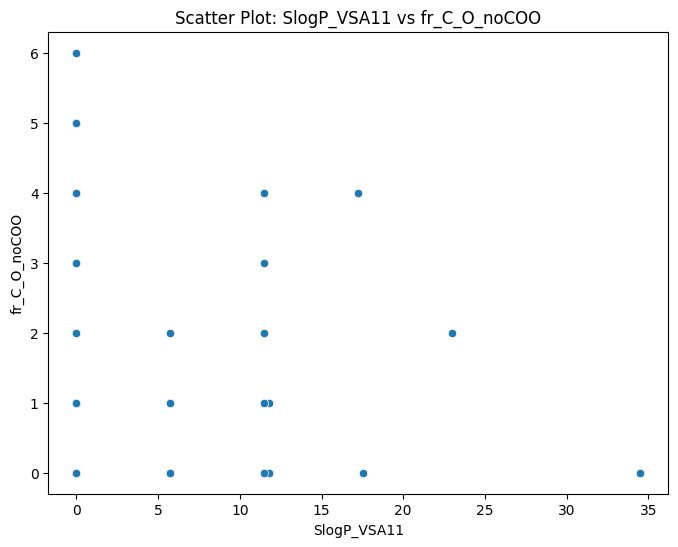

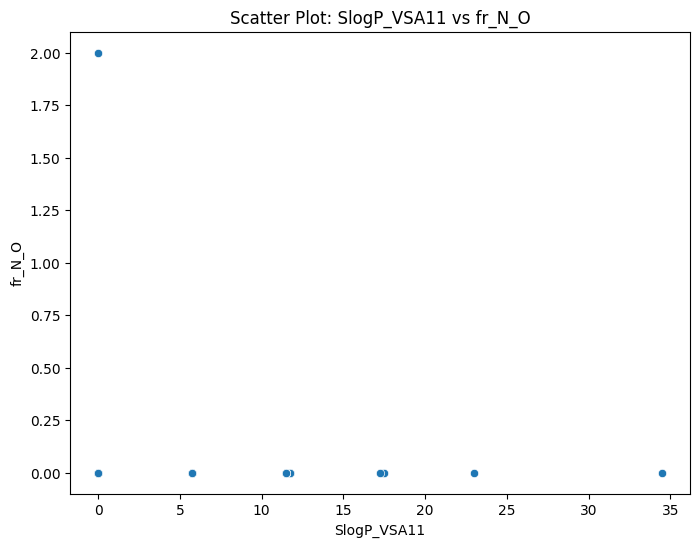

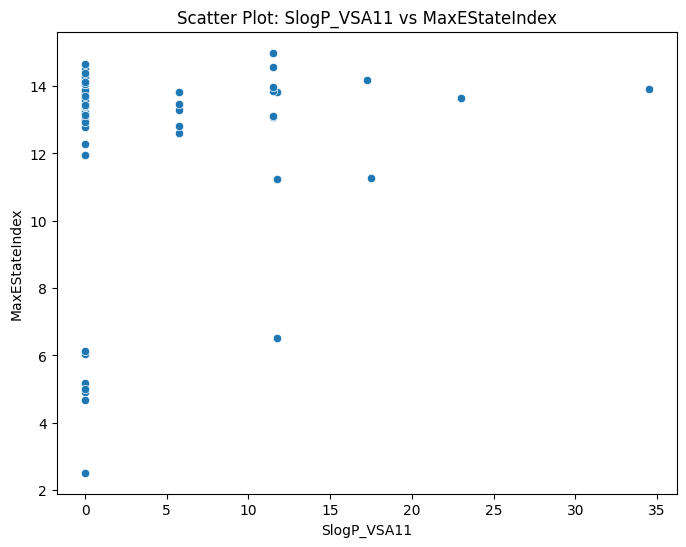

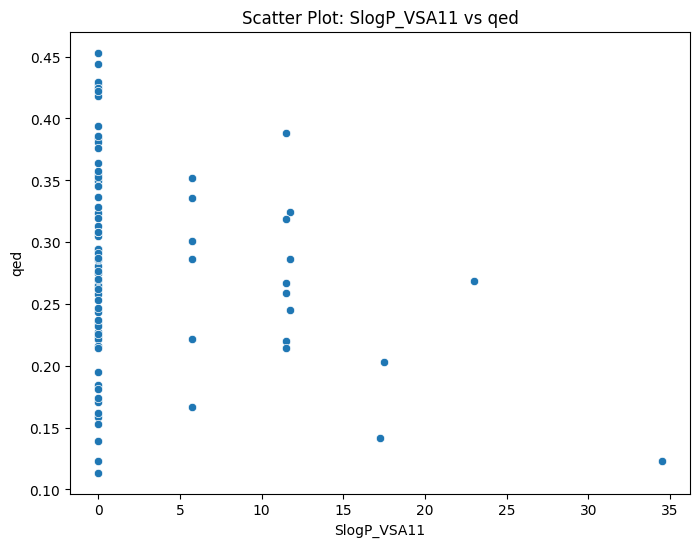

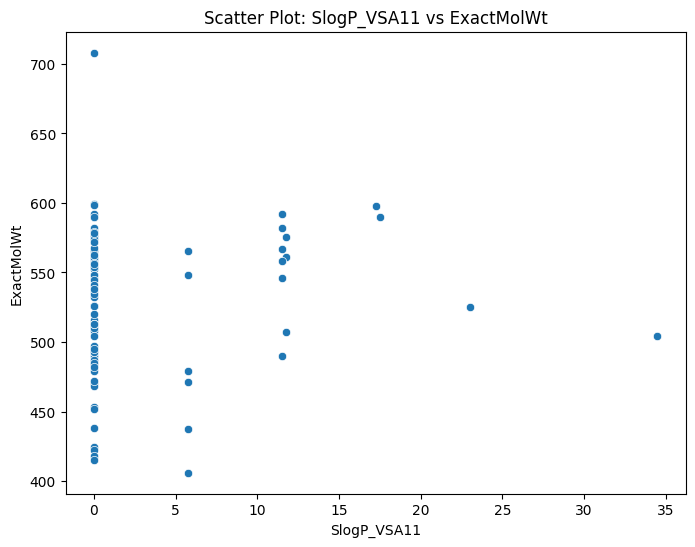

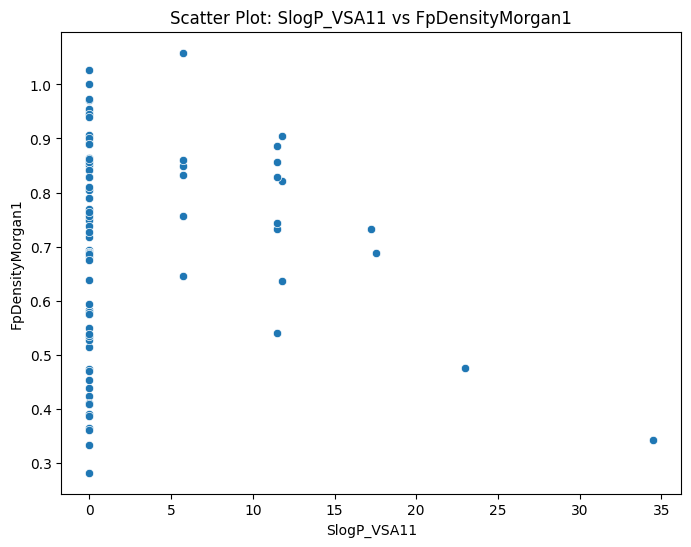

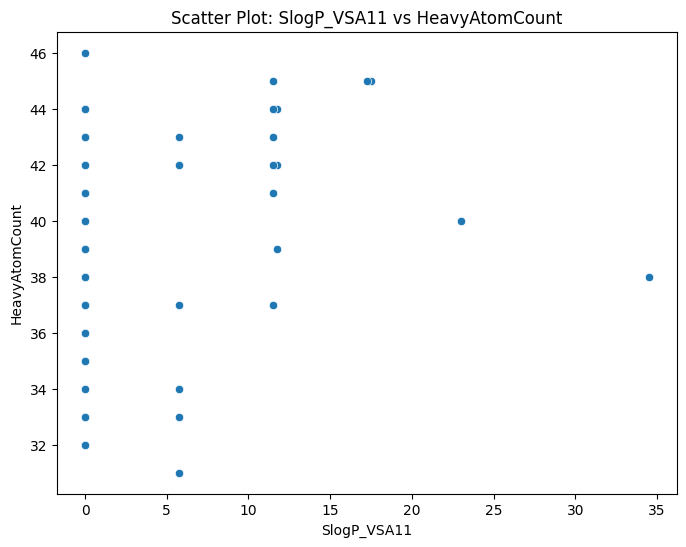

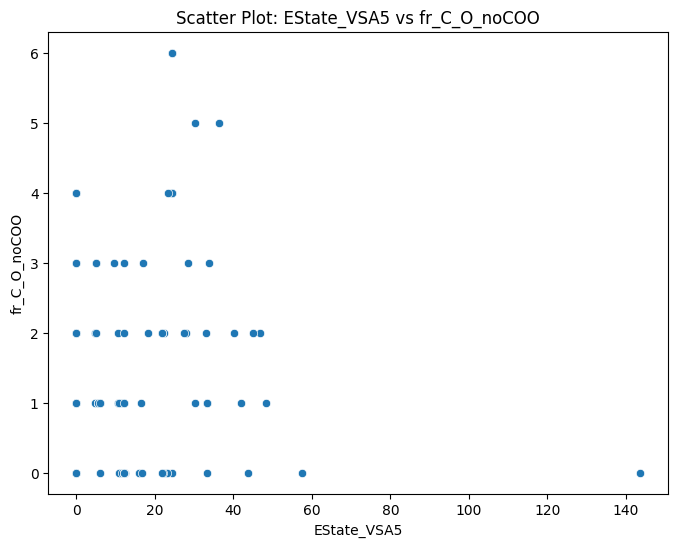

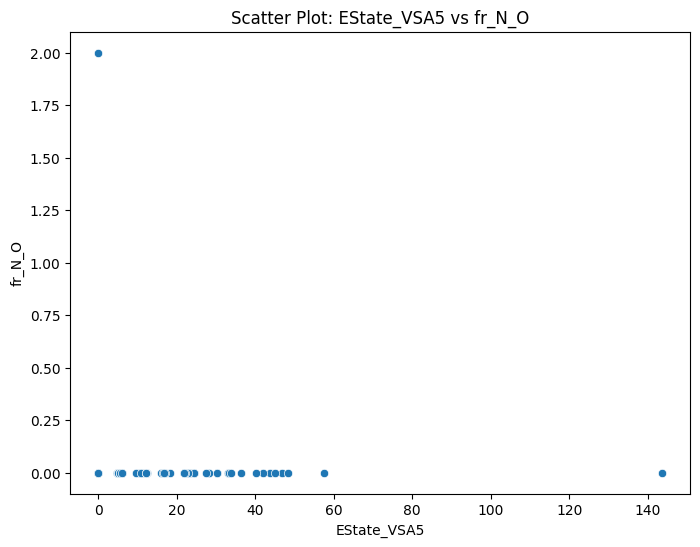

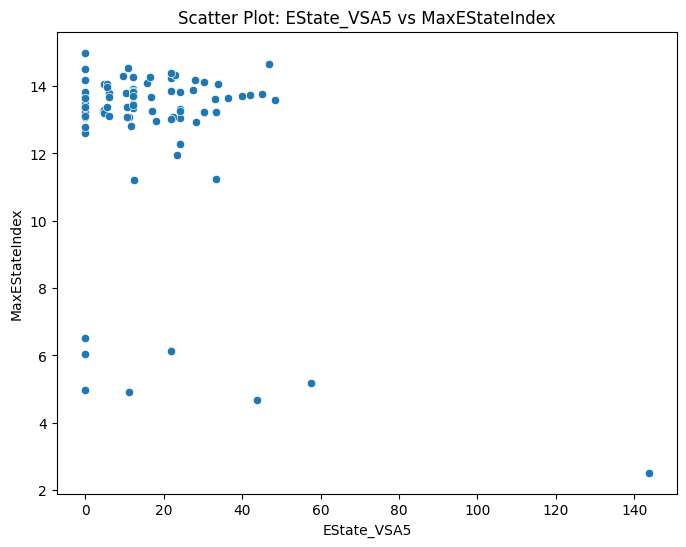

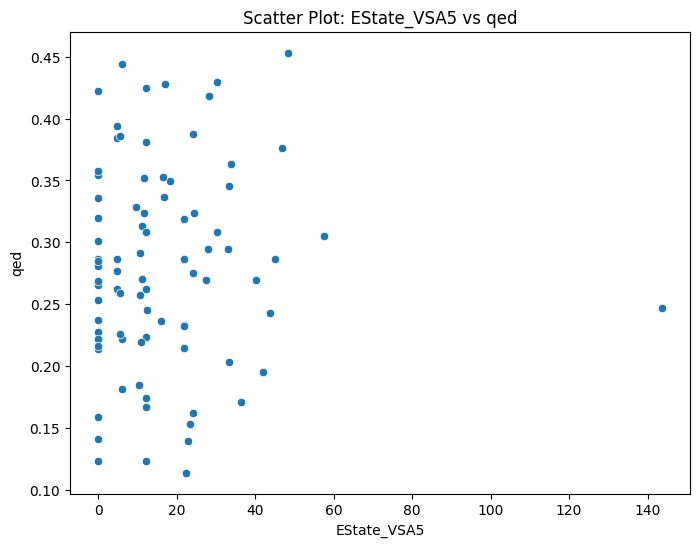

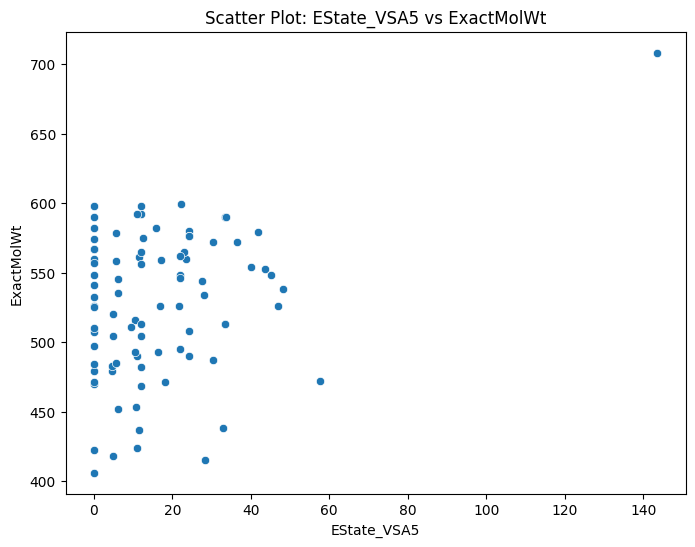

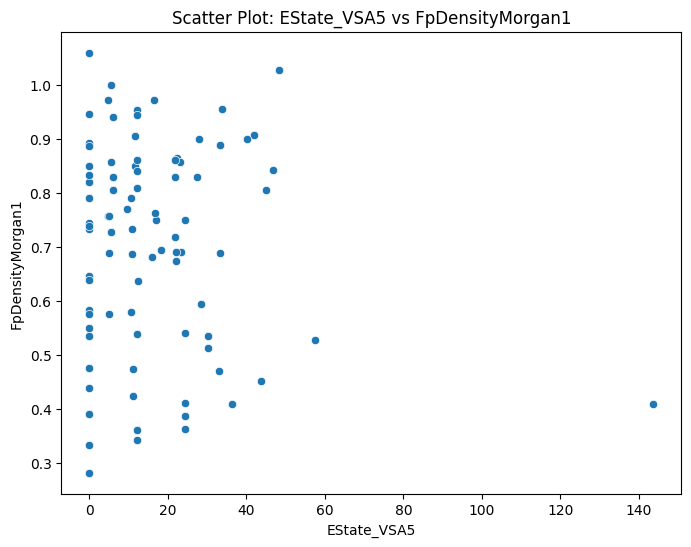

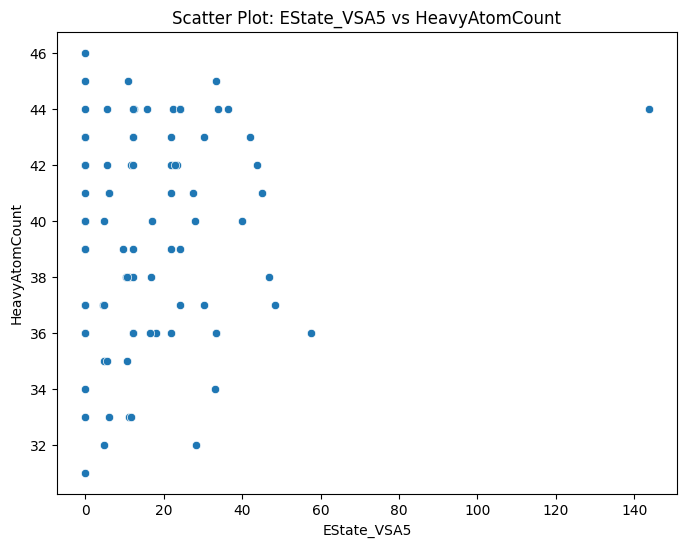

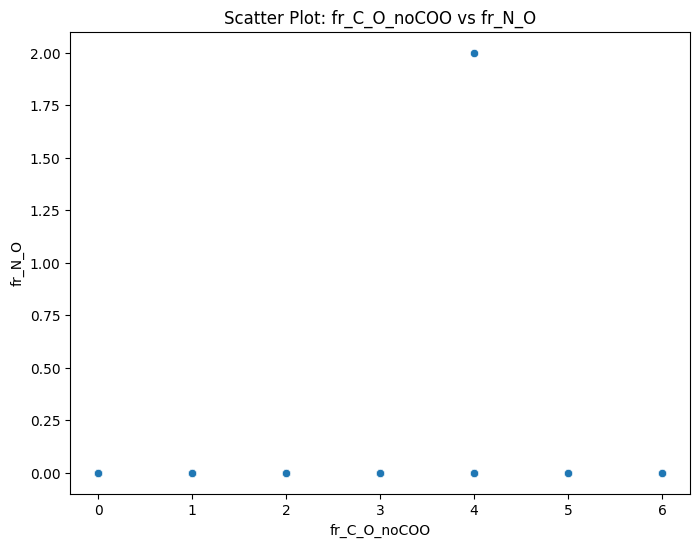

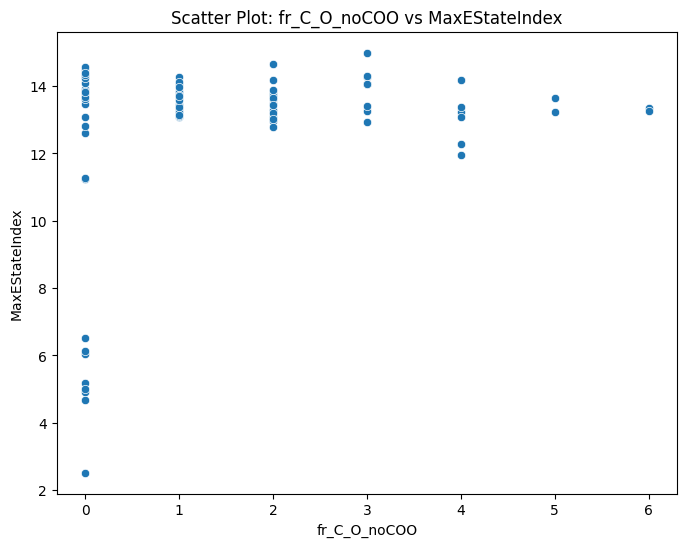

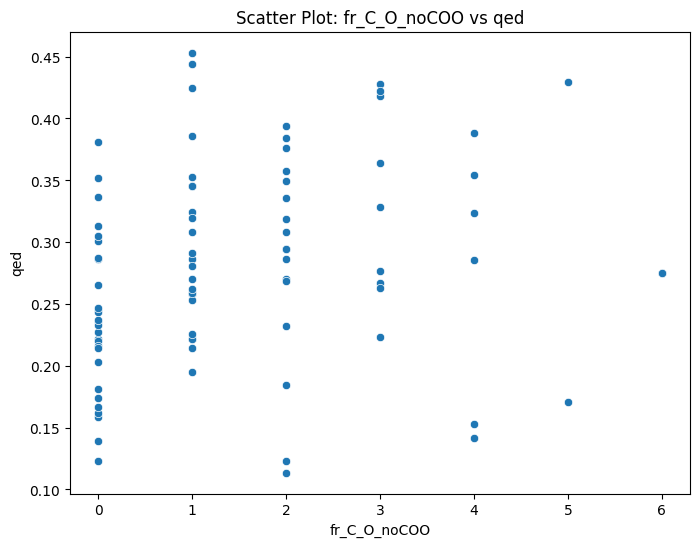

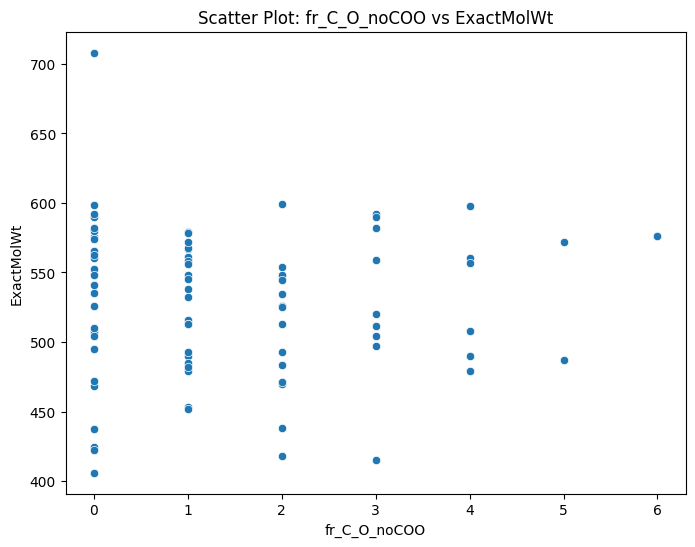

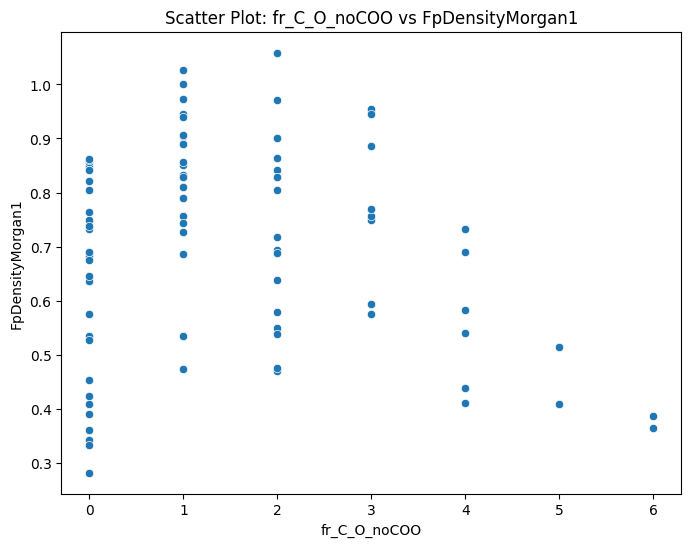

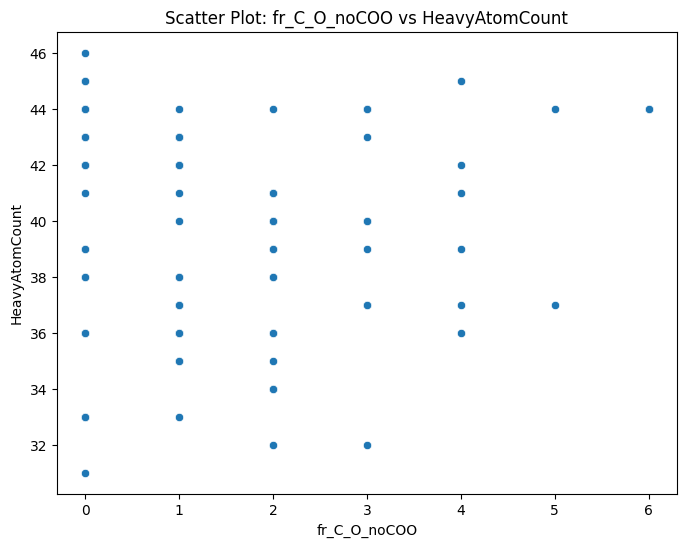

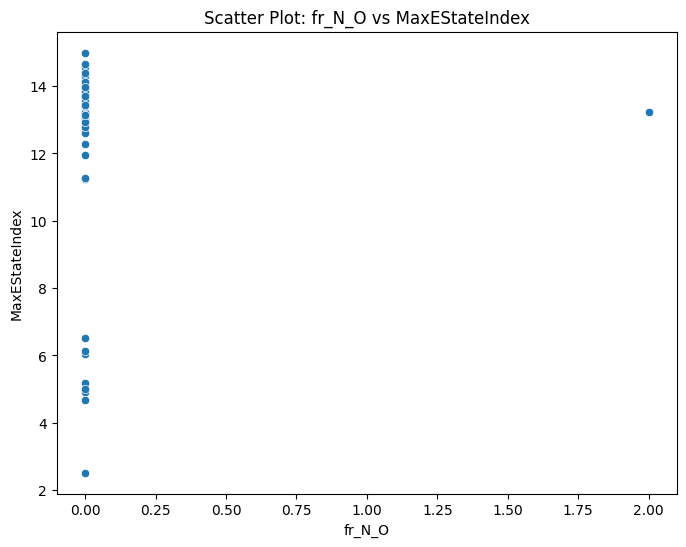

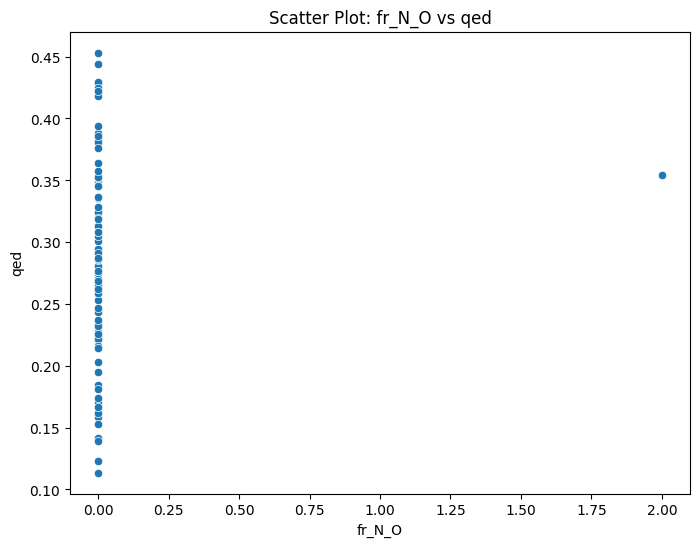

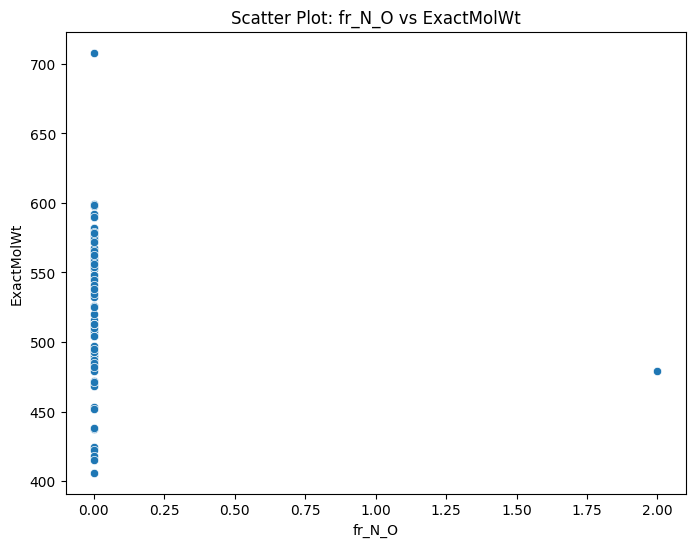

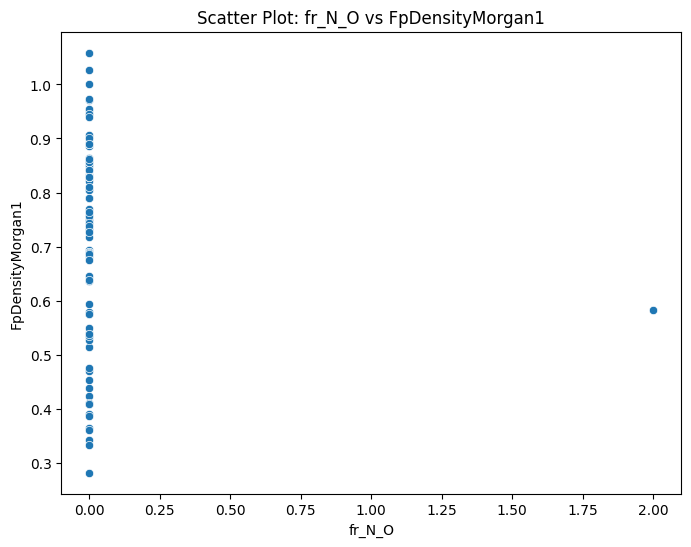

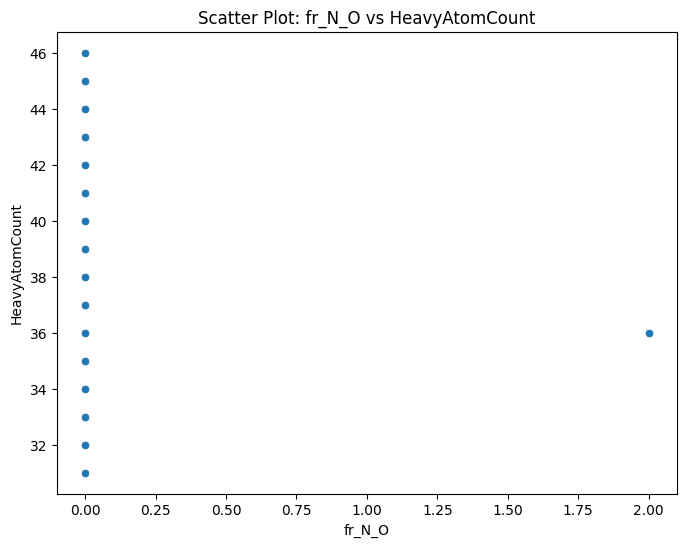

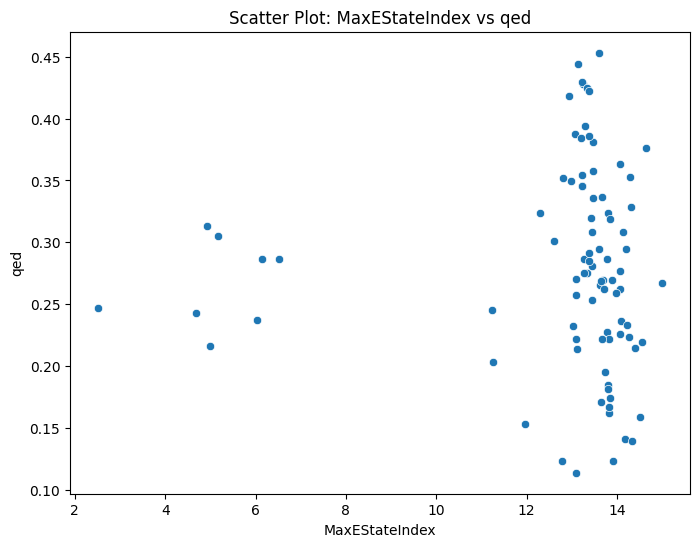

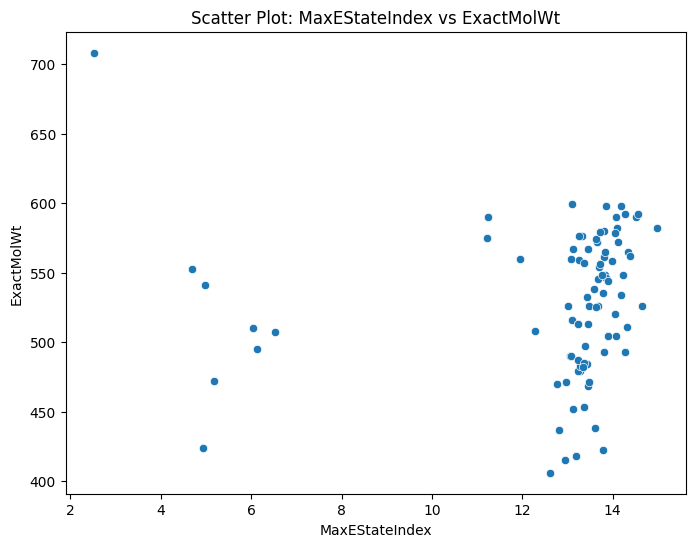

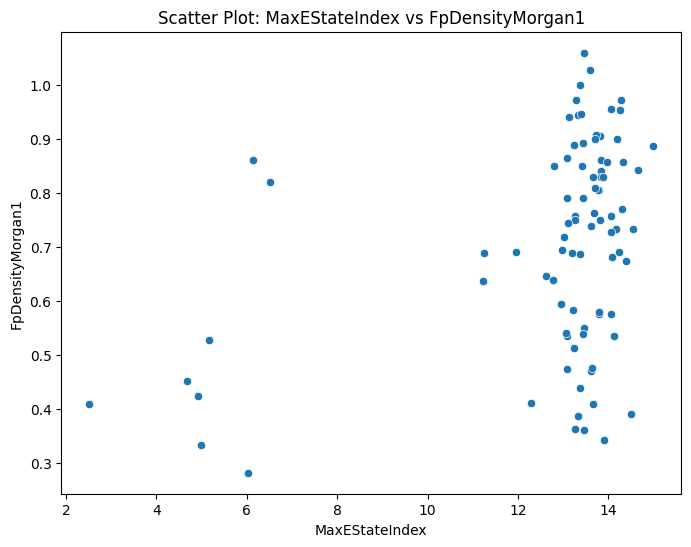

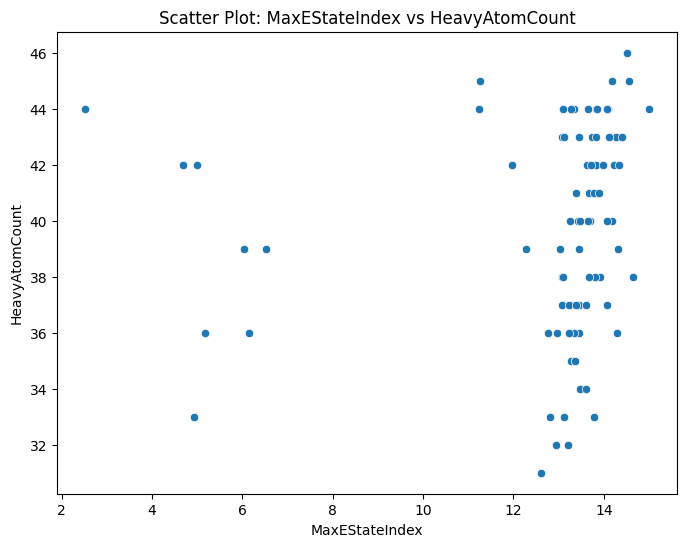

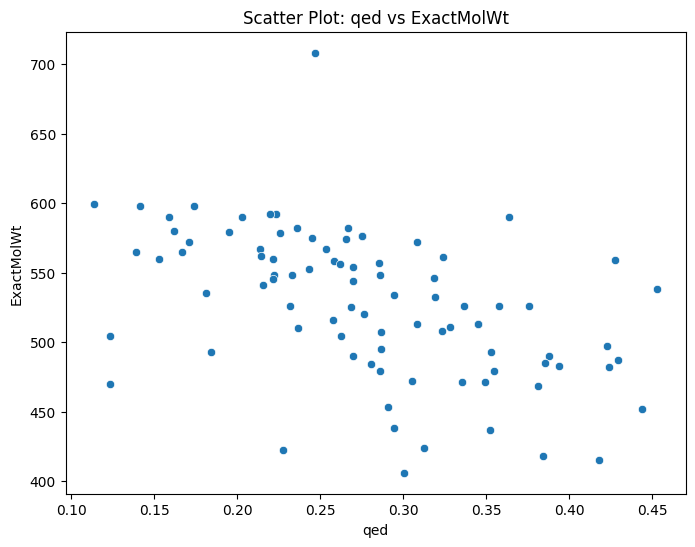

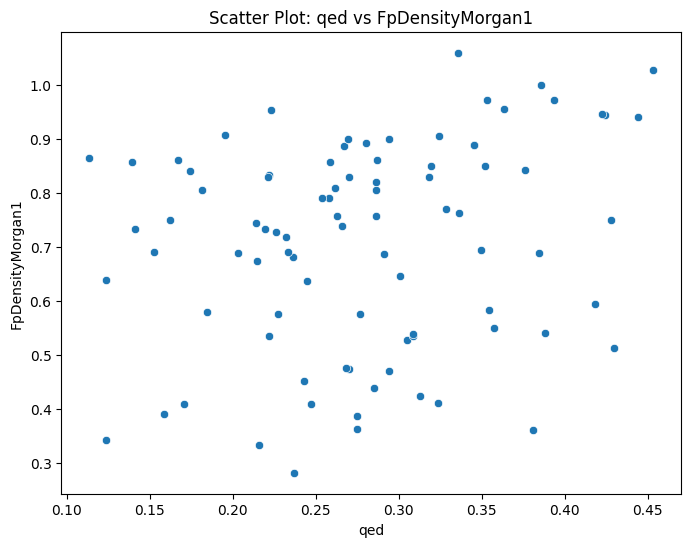

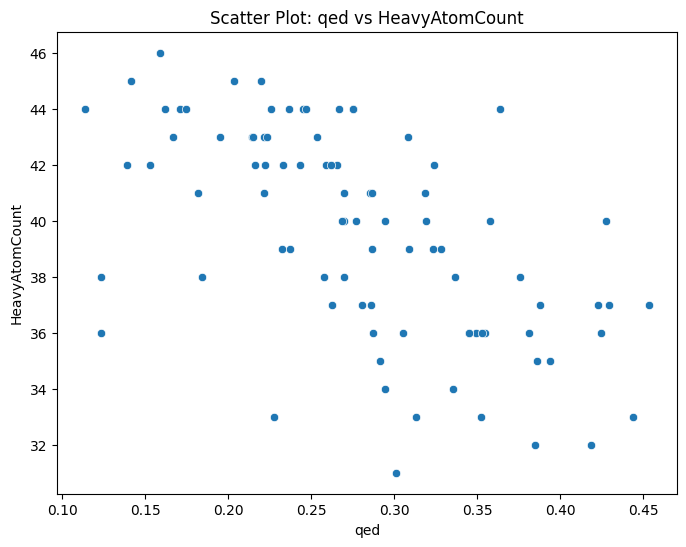

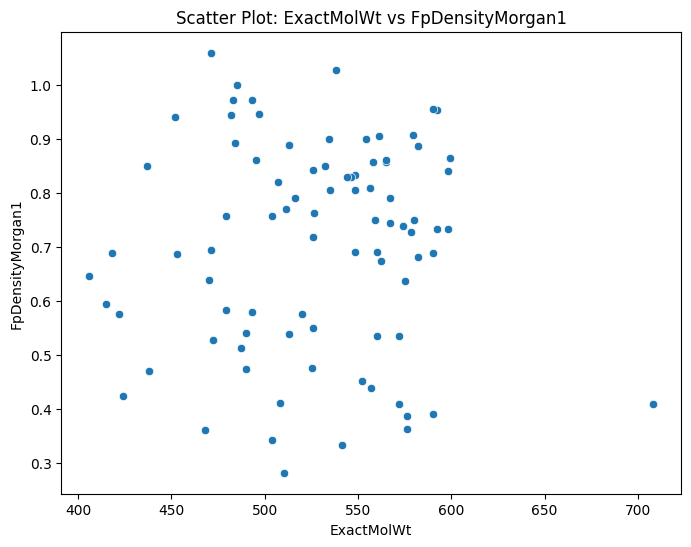

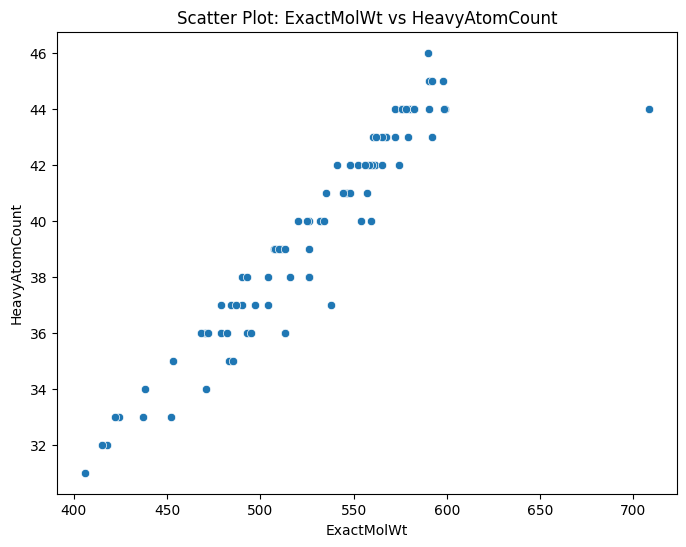

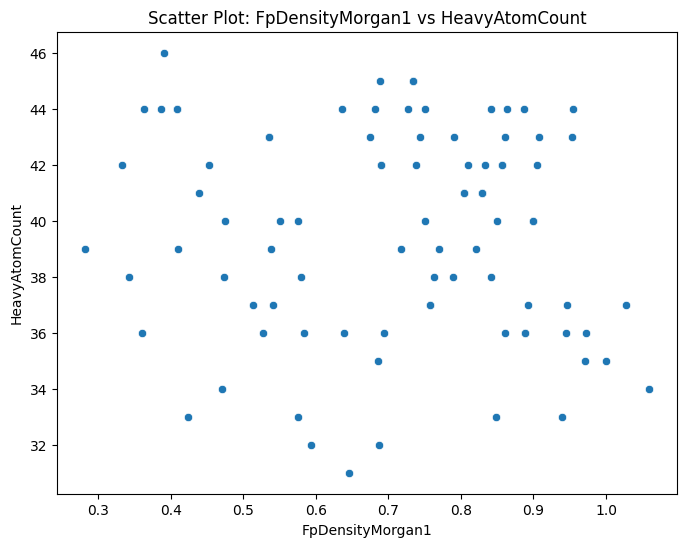

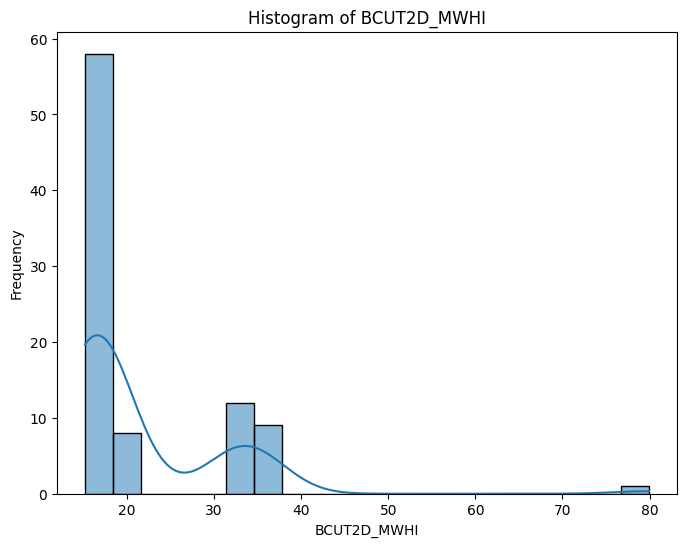

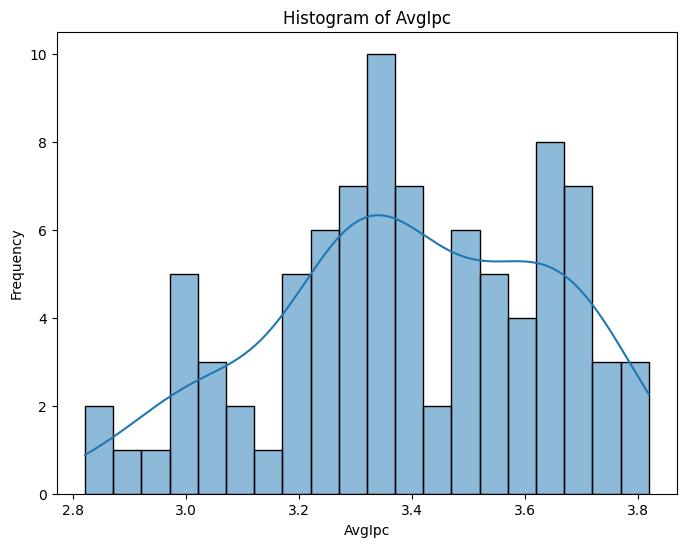

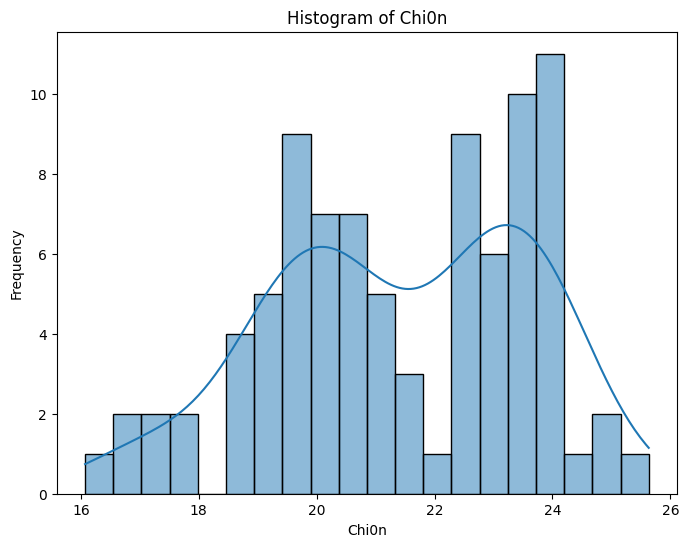

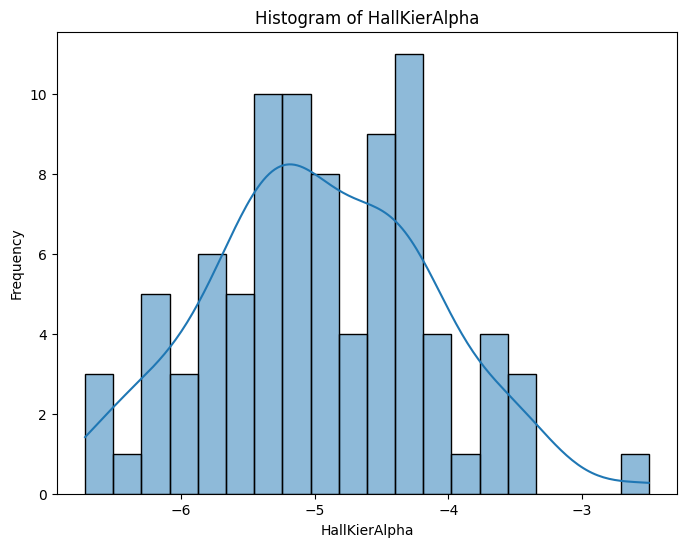

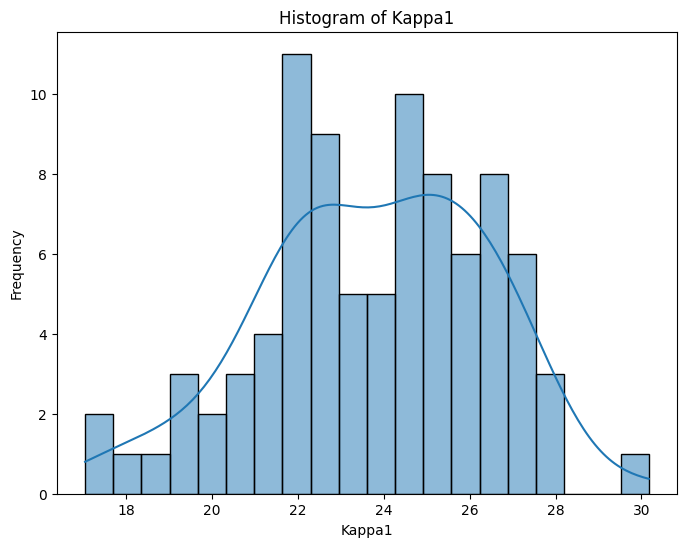

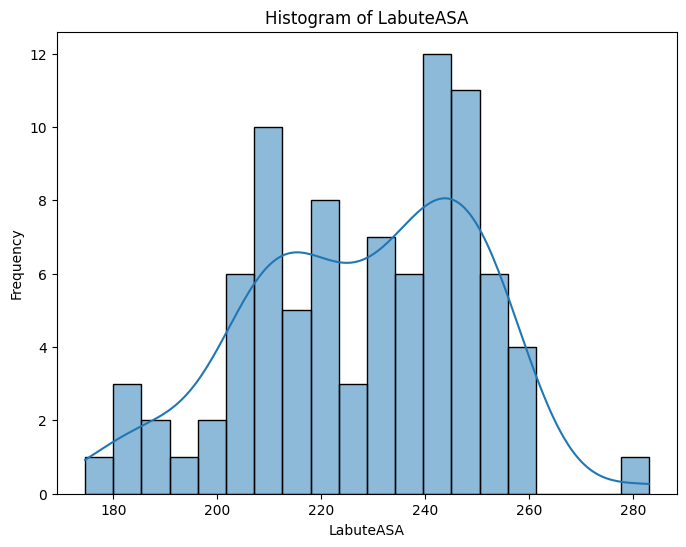

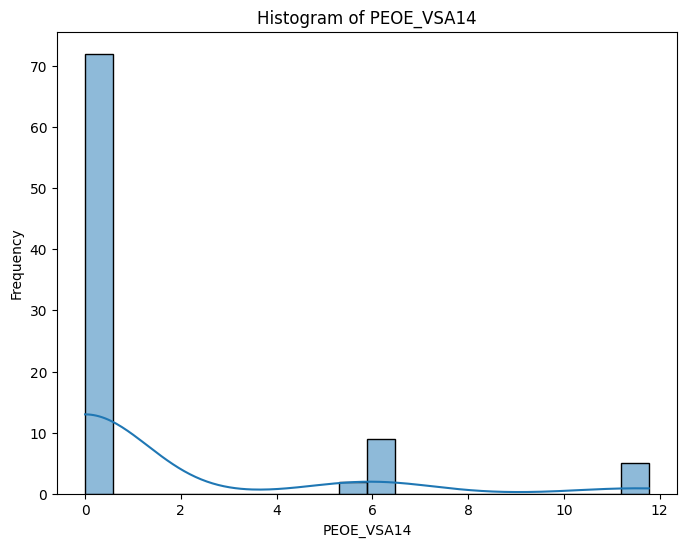

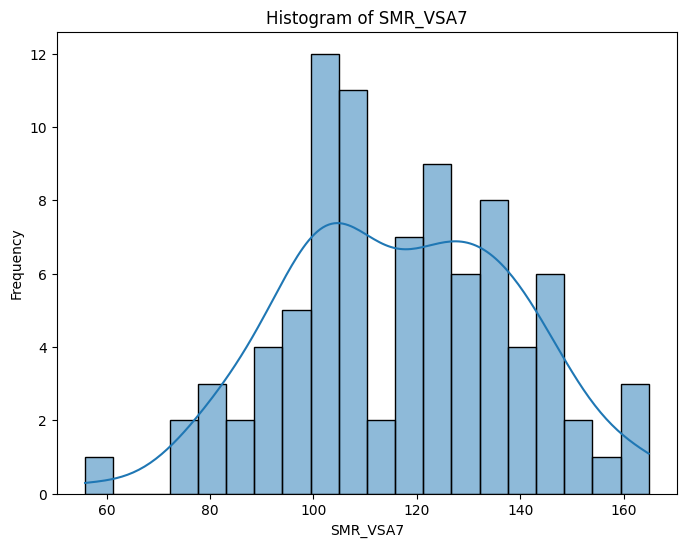

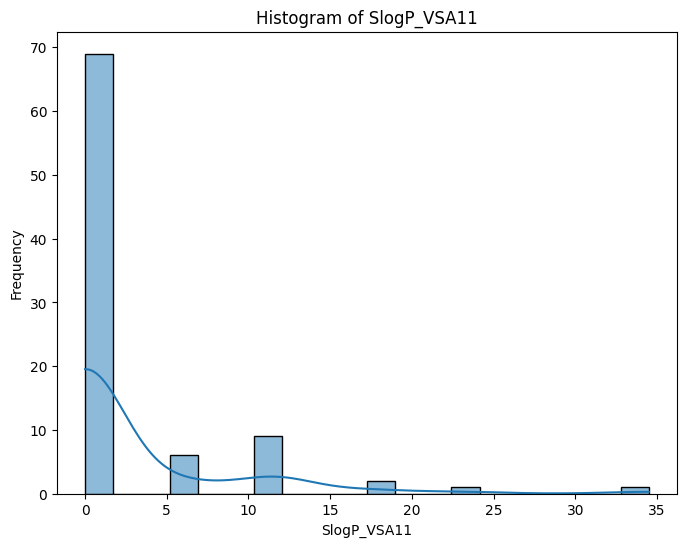

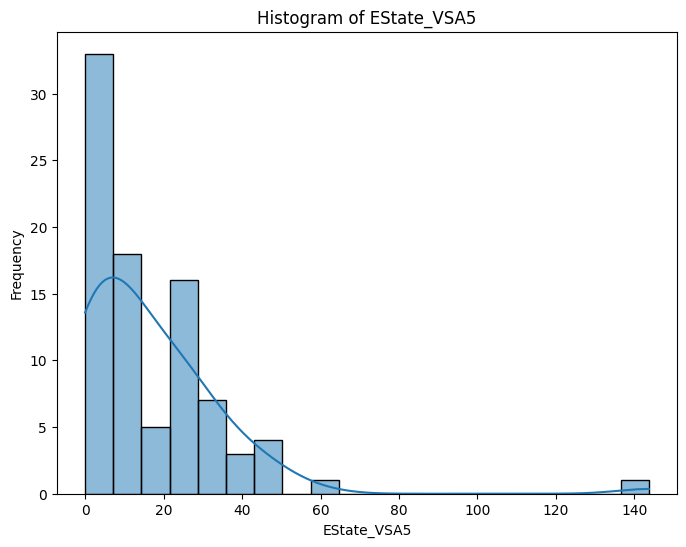

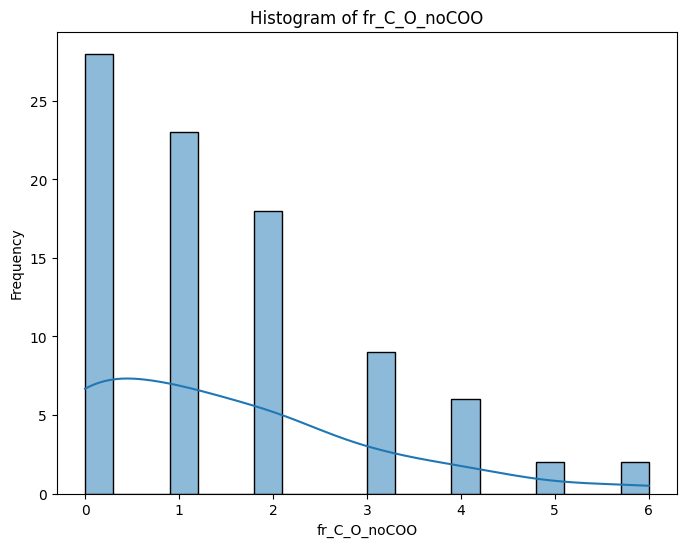

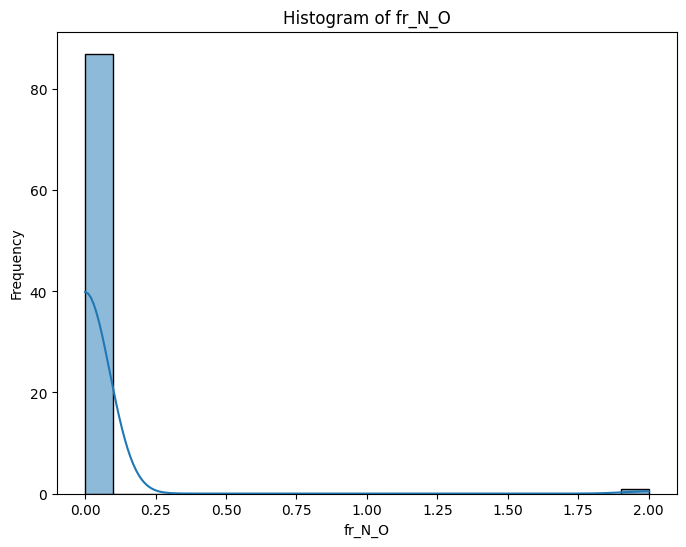

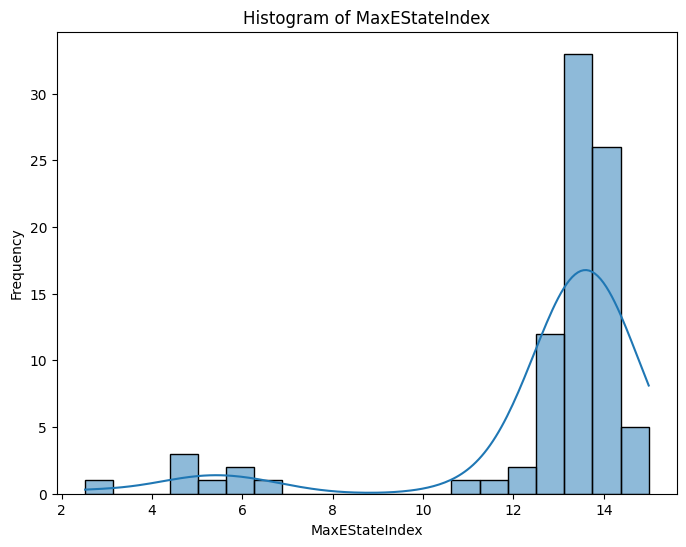

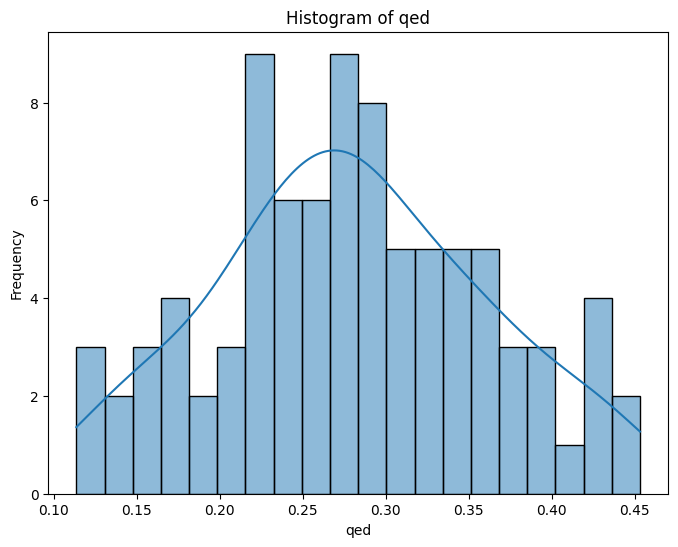

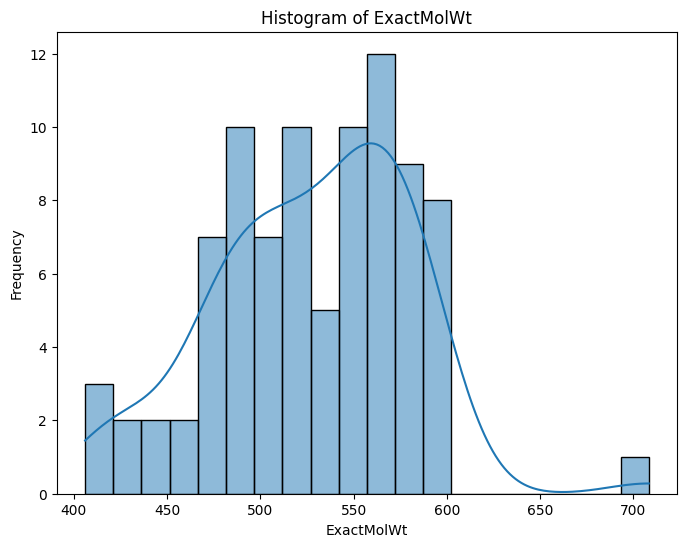

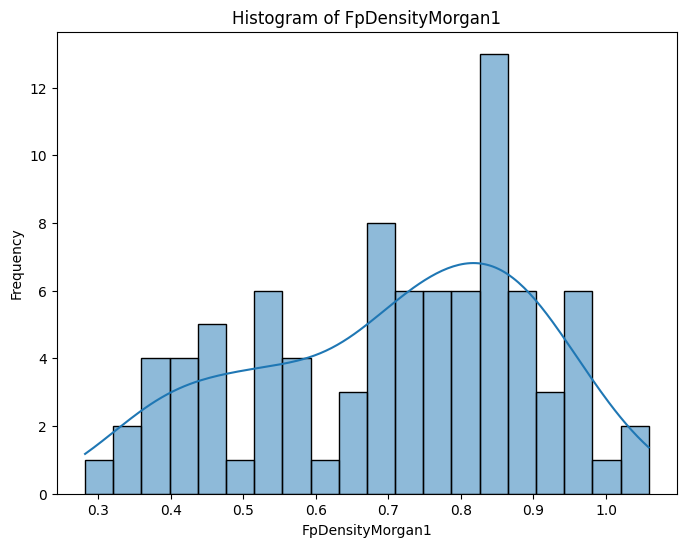

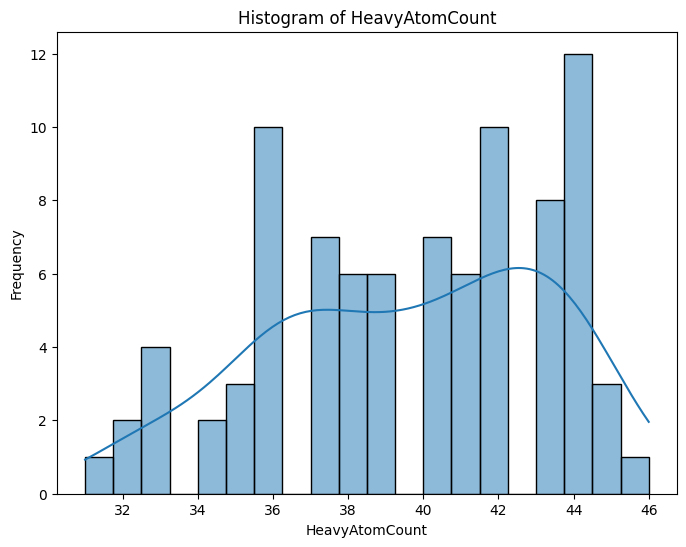

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from Excel file
def load_data(file_path, sheet_name):
    """Load data from an Excel file and sheet."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

# Generate a boxplot
def generate_boxplots(data, columns, output_dir):
    """Generate boxplots for the specified columns."""
    for column in columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=data[column])
        plt.title(f'Boxplot of {column}')
        plt.ylabel(column)


# Generate scatter plots
def generate_scatter_plots(data, columns, output_dir):
    """Generate scatter plots for all pairwise combinations of columns."""
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=data[columns[i]], y=data[columns[j]])
            plt.title(f'Scatter Plot: {columns[i]} vs {columns[j]}')
            plt.xlabel(columns[i])
            plt.ylabel(columns[j])


# Generate histograms
def generate_histograms(data, columns, output_dir):
    """Generate histograms for the specified columns."""
    for column in columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(data[column], kde=True, bins=20)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')


# Main execution
if __name__ == "__main__":
    # File path and sheet name
    file_path = 'Padel 2.xlsx'  # Replace with your Excel file path
    sheet_name = 'DataSet'  # Replace with your sheet name
    output_dir = 'plots'  # Directory to save plots

    # Load data
    data = load_data(file_path, sheet_name)

    # Specify the columns you want to visualize
    columns_to_plot = ['BCUT2D_MWHI', 'AvgIpc', 'Chi0n', 'HallKierAlpha', 'Kappa1', 'LabuteASA', 'PEOE_VSA14','SMR_VSA7', 'SlogP_VSA11', 'EState_VSA5', 'fr_C_O_noCOO', 'fr_N_O', 'MaxEStateIndex', 'qed', 'ExactMolWt', 'FpDensityMorgan1', 'HeavyAtomCount',]  # Replace with your column names

    # Generate visualizations
    generate_boxplots(data, columns_to_plot, output_dir)
    generate_scatter_plots(data, columns_to_plot, output_dir)
    generate_histograms(data, columns_to_plot, output_dir)

    print("Plots have been saved to:", output_dir)


Accuracy: 0.63
MolLogP                     0.023991
Chi4n                       0.019185
BCUT2D_MRHI                 0.019024
BalabanJ                    0.018376
HeavyAtomMolWt              0.018249
Chi3n                       0.018050
Chi2n                       0.015472
PEOE_VSA9                   0.015120
PEOE_VSA12                  0.015054
SPS                         0.014763
EState_VSA7                 0.014692
PEOE_VSA7                   0.014398
MinEStateIndex              0.013940
VSA_EState8                 0.013912
MolWt                       0.013897
MolMR                       0.013549
BCUT2D_LOGPLOW              0.013262
Chi1v                       0.013198
MinAbsEStateIndex           0.013135
BCUT2D_CHGLO                0.012896
SlogP_VSA2                  0.012738
VSA_EState4                 0.012650
MinPartialCharge            0.012319
BCUT2D_MRLOW                0.012087
Chi4v                       0.012036
BCUT2D_CHGHI                0.011870
NumHeteroatoms         

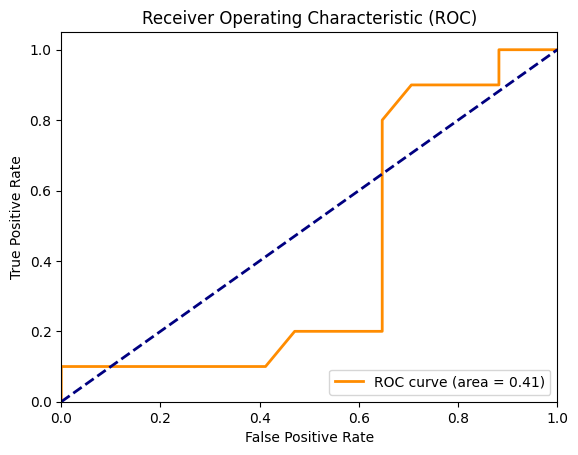

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the "Geometric" sheet from the Excel file
file_path = 'Padel 2.xlsx'  # Replace with your file path
geometric_data = pd.read_excel(file_path, sheet_name='DataSet')

# Preprocess the data
# Assume the last column is the target variable, and the rest are features
# EXCLUDE THE 'Name' COLUMN AS IT CONTAINS NON-NUMERIC DATA
X = geometric_data.iloc[:, 1:-1]  # Features (excluding the first column 'Name')
y = geometric_data.iloc[:, -1]   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Set pandas display option to show all rows
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Optionally, you can print feature importances
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))




# Step 1: Read data from the Excel file
file_path = 'Padel 2.xlsx'
sheet_name = 'RandomForest137'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming your target variable is in the last column and the rest are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Make predictions
y_probs = clf.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# Step 5: Calculate AUC-ROC score
auc = roc_auc_score(y_test, y_probs)
print(f'AUC-ROC: {auc:.2f}')

# Optional: Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()





AUC-ROC: 0.68


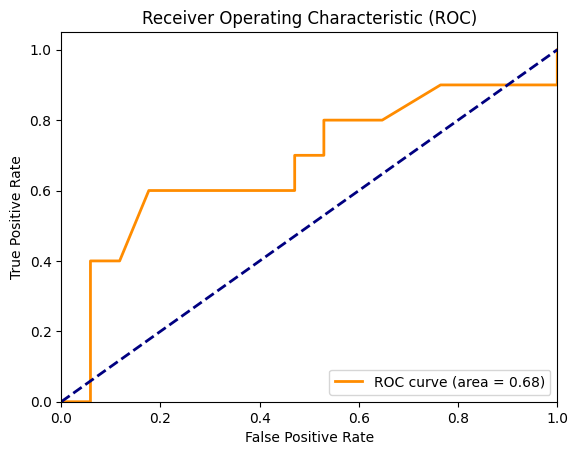

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Read data from the Excel file
file_path = 'Padel 2.xlsx'
sheet_name = 'RFE Data0.3'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming your target variable is in the last column and the rest are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Make predictions
y_probs = clf.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# Step 5: Calculate AUC-ROC score
auc = roc_auc_score(y_test, y_probs)
print(f'AUC-ROC: {auc:.2f}')

# Optional: Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
[[17  0]
 [ 8  2]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        17
           1       1.00      0.20      0.33        10

    accuracy                           0.70        27
   macro avg       0.84      0.60      0.57        27
weighted avg       0.80      0.70      0.63        27

Decision Tree
[[13  4]
 [ 7  3]]
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        17
           1       0.43      0.30      0.35        10

    accuracy                           0.59        27
   macro avg       0.54      0.53      0.53        27
weighted avg       0.57      0.59      0.57        27

Random Forest
[[16  1]
 [10  0]]
              precision    recall  f1-score   support

           0       0.62      0.94      0.74        17
           1       0.00      0.00      0.00        10

    accuracy                           0.59        27
   macro avg       0.31

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


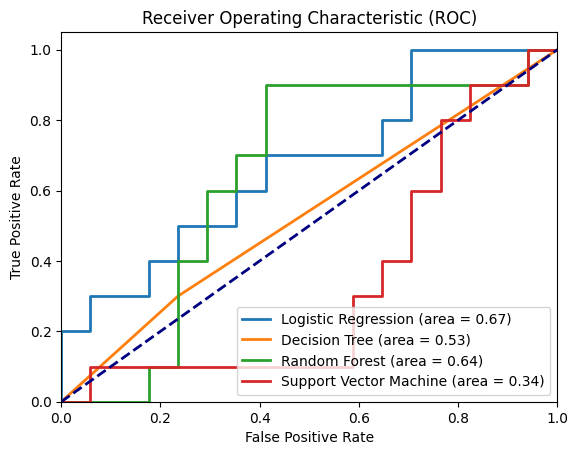

Decision Tree
[[13  4]
 [ 7  3]]
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        17
           1       0.43      0.30      0.35        10

    accuracy                           0.59        27
   macro avg       0.54      0.53      0.53        27
weighted avg       0.57      0.59      0.57        27

Summary Statistics:
       BCUT2D_MRLOW  PEOE_VSA12  PEOE_VSA4   SMR_VSA1  fr_allylic_oxid  \
count     88.000000   88.000000  88.000000  88.000000        88.000000   
mean       0.104633    4.686694   3.574059  12.978706         0.045455   
std        0.364685    6.463327   4.613360   8.571873         0.209493   
min       -0.950882    0.000000   0.000000   0.000000         0.000000   
25%       -0.122412    0.000000   0.000000   8.730176         0.000000   
50%        0.074748    0.000000   0.000000  13.411309         0.000000   
75%        0.177765   10.023291   5.101408  18.750823         0.000000   
max        1.192909   35.344

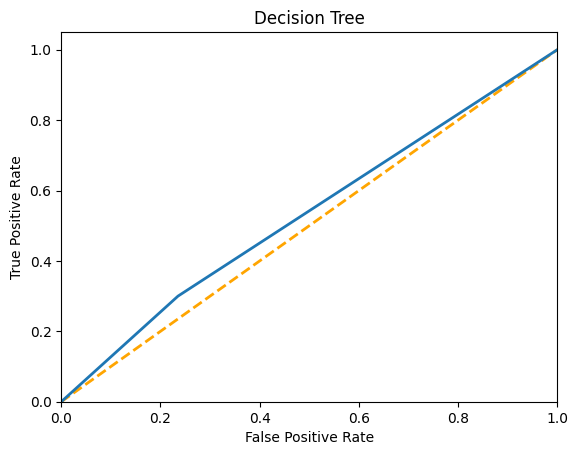

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Load data from Excel
file_path = 'Padel 2.xlsx'  # Replace with your file path
sheet_name = 'RFE Data0.2'  # Replace with your sheet name
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming your target variable is in the last column and the rest are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot ROC curve
def plot_roc_curve(y_test, y_probs, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {auc:.2f})')

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_probs_logreg = logreg.predict_proba(X_test)[:, 1]
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
plot_roc_curve(y_test, y_probs_logreg, 'Logistic Regression')

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_probs_tree = tree.predict_proba(X_test)[:, 1]
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
plot_roc_curve(y_test, y_probs_tree, 'Decision Tree')

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_probs_rf = rf.predict_proba(X_test)[:, 1]
print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
plot_roc_curve(y_test, y_probs_rf, 'Random Forest')

# Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_probs_svm = svm.predict_proba(X_test)[:, 1]
print("Support Vector Machine")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
plot_roc_curve(y_test, y_probs_svm, 'Support Vector Machine')

# Chi-Square Test
# This assumes that the first two columns in the data are the binary variables for the chi-square test
chi2, p, dof, ex = chi2_contingency(pd.crosstab(data.iloc[:, 0], data.iloc[:, 1]))
print(f'Chi-Square Test\nChi2: {chi2}, p-value: {p}')

# Finalize ROC plot
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Decision Tree
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree')
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_probs_tree = tree.predict_proba(X_test)[:, 1]
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
plot_roc_curve(y_test, y_probs_tree, 'Decision Tree')

# Summary statistics
print("Summary Statistics:")
print(data.describe())

# Data types
print("\nData Types:")
print(data.dtypes)

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Streaming output truncated to the last 5000 lines.
1                        3  7  13  0  0  0
2                        2  8   7  1  0  0
3                        6  3   0  0  0  0
4                        3  1   1  1  0  0
5                        2  0   0  0  0  0
6                        2  0   0  0  0  0
NumAromaticRings  3   4   5   6   7   8   12
fr_C_O_noCOO                                
0                  0   0   4   7  10   6   1
1                  1   4   9   8   1   0   0
2                  0   3  11   2   2   0   0
3                  2   4   3   0   0   0   0
4                  0   4   2   0   0   0   0
5                  0   1   0   1   0   0   0
6                  0   0   2   0   0   0   0
NumHAcceptors  0   2   3   4   5   6   7   8   9   11  12
fr_C_O_noCOO                                             
0               1   0   0   2   1   8   5   5   4   2   0
1               0   1   0   3   6   4   5   3   1   0   0
2               0   4   0   4   4   3   0   3   0   0 

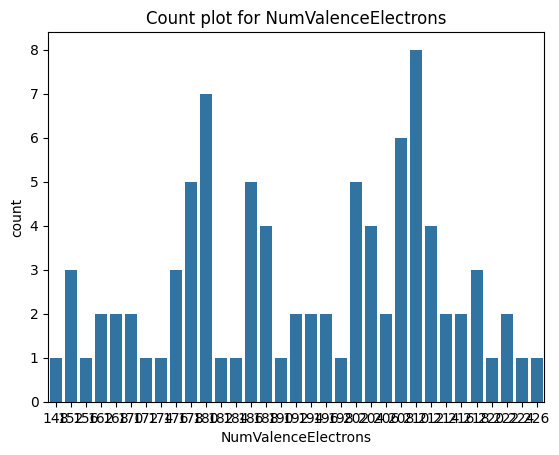

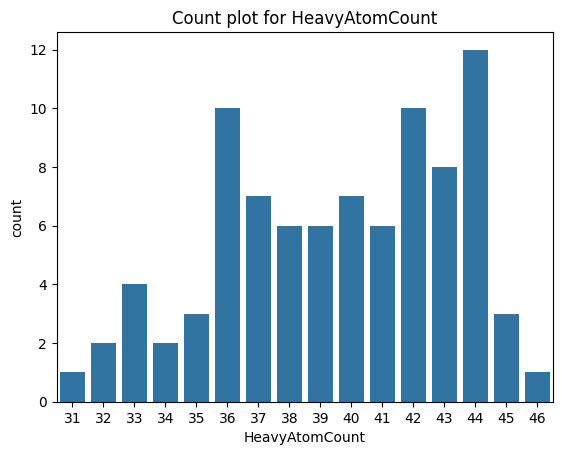

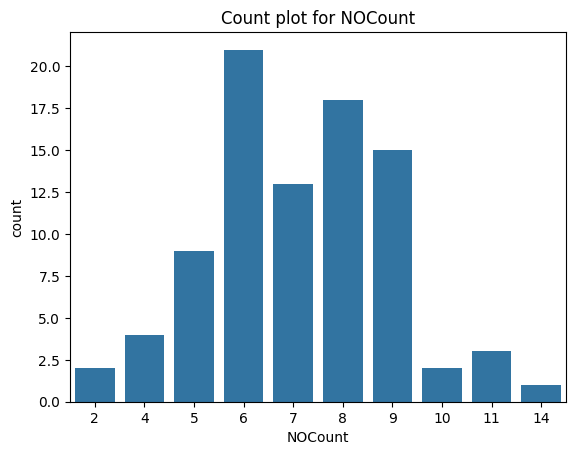

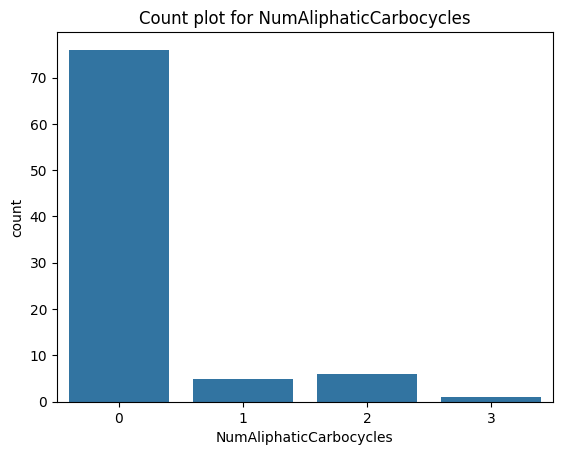

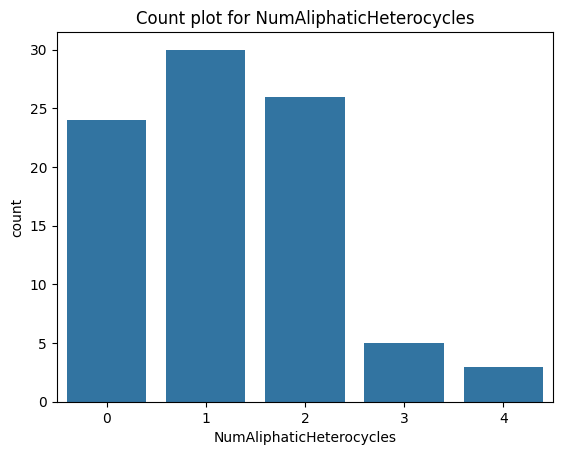

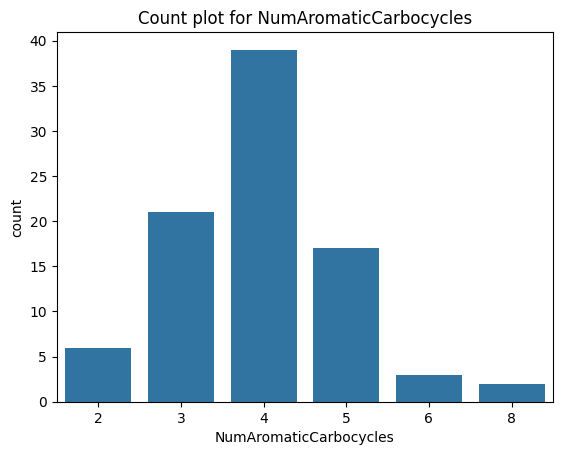

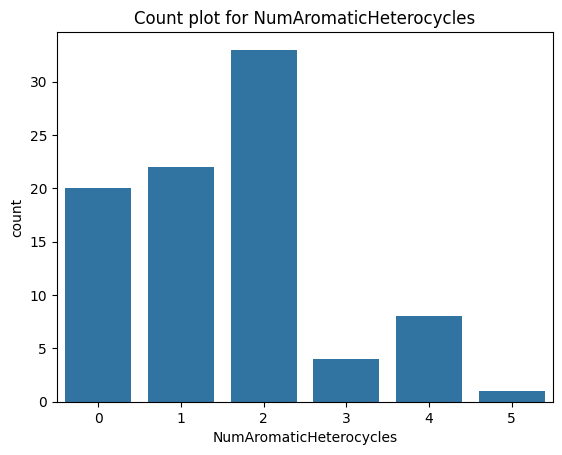

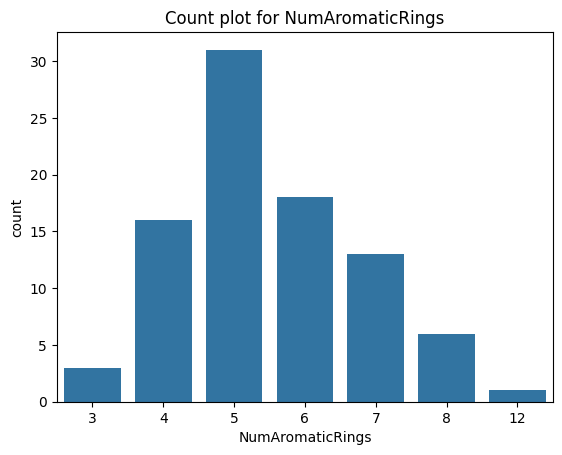

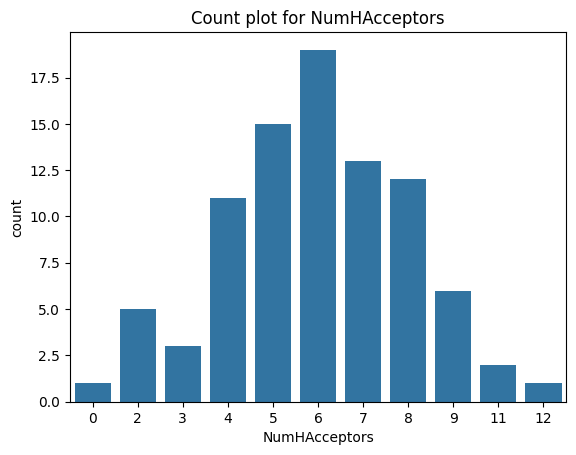

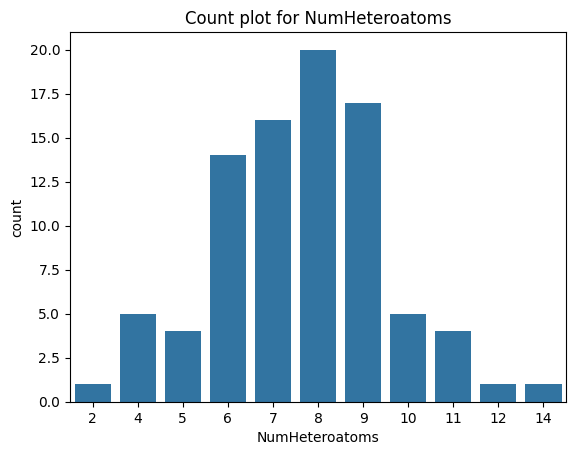

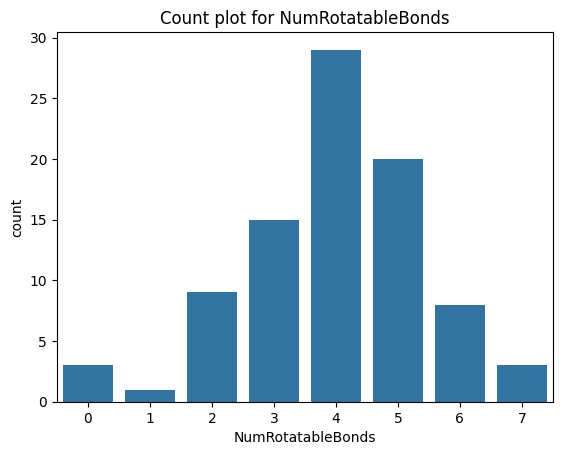

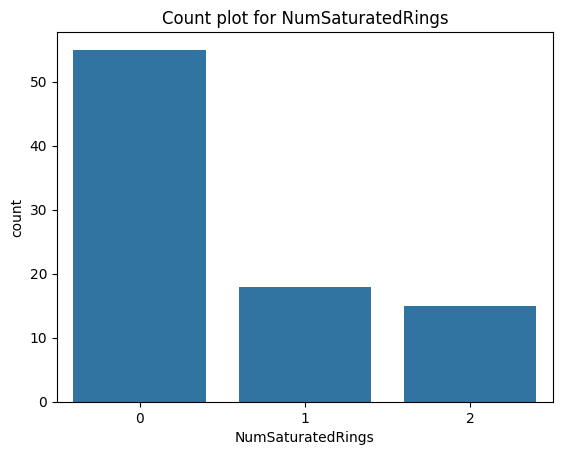

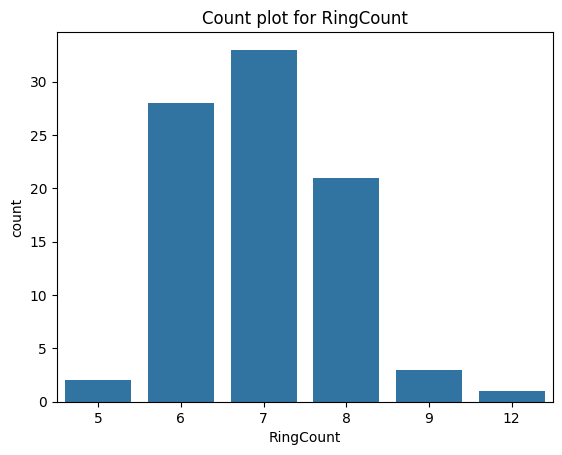

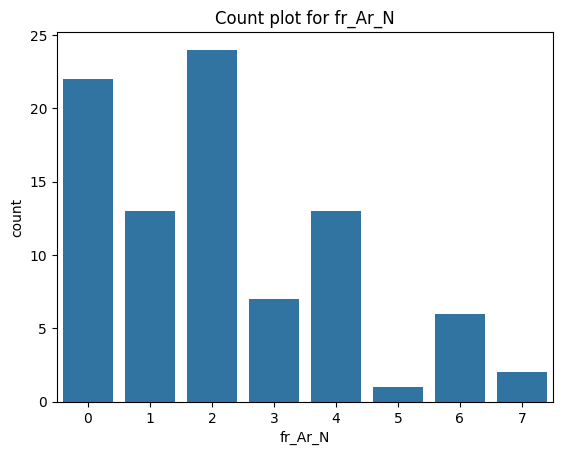

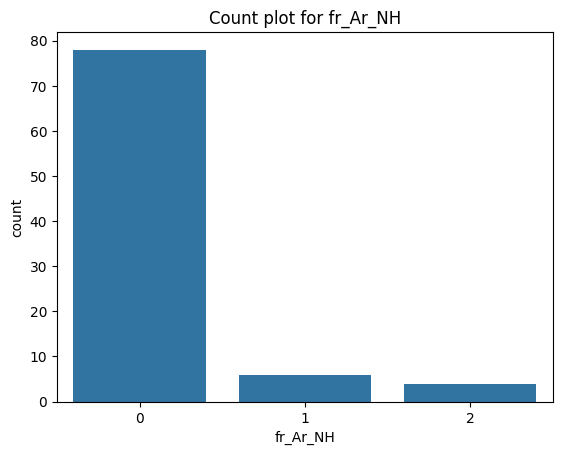

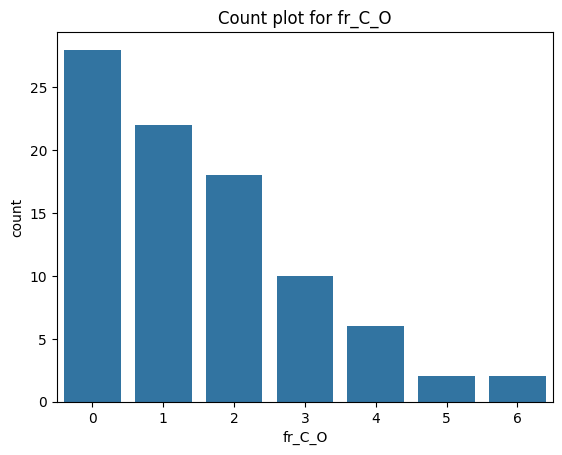

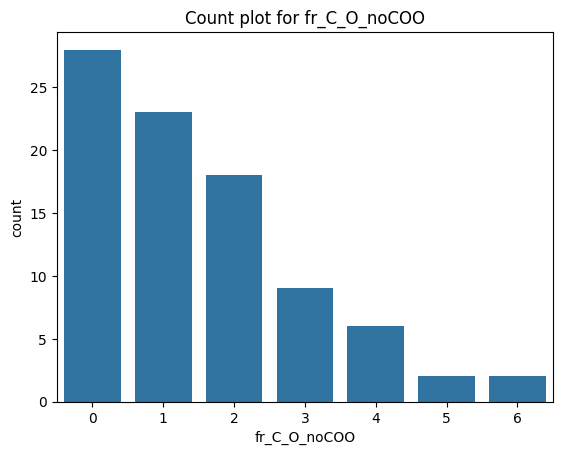

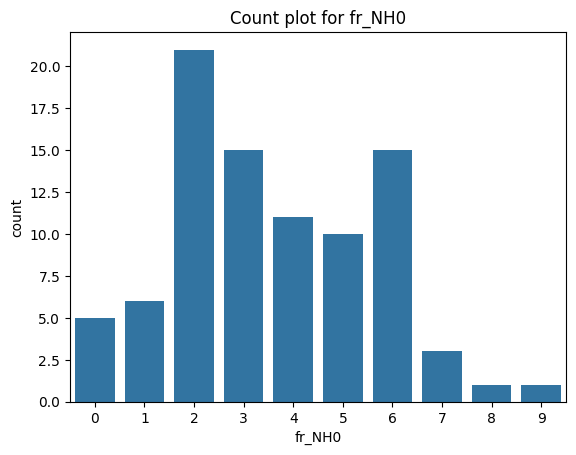

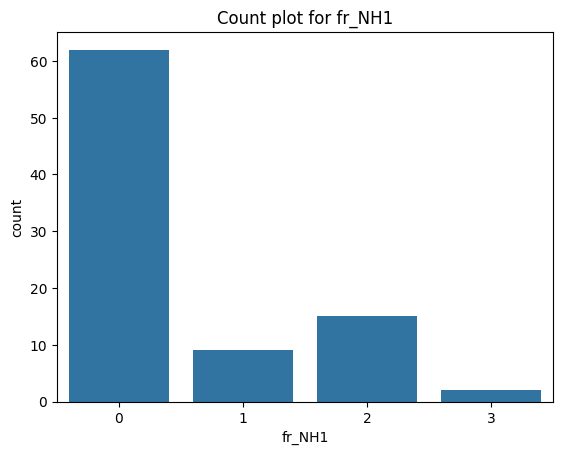

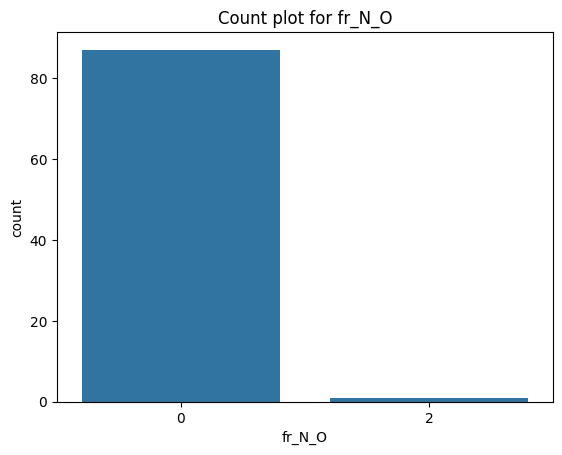

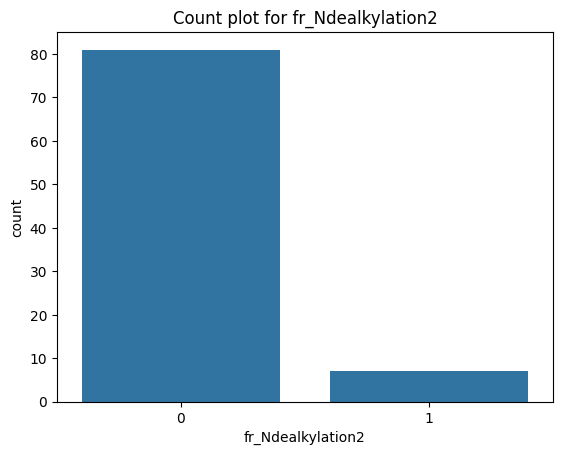

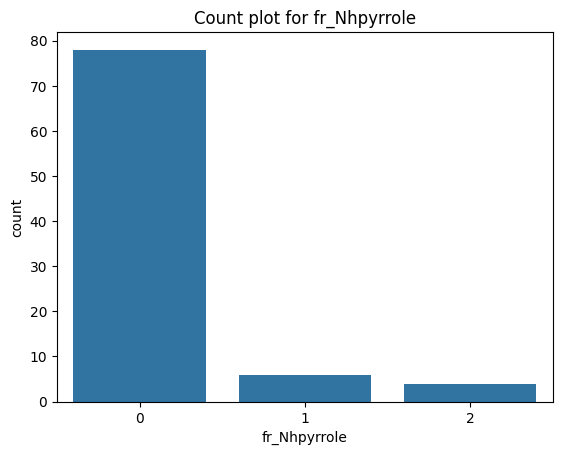

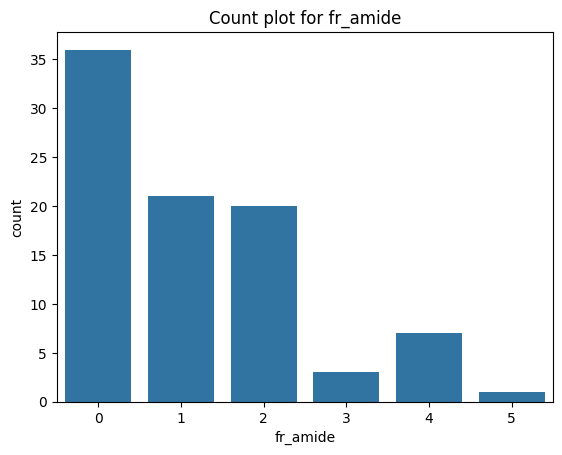

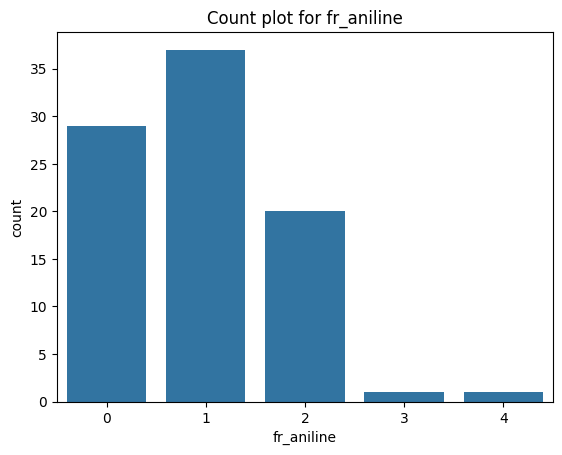

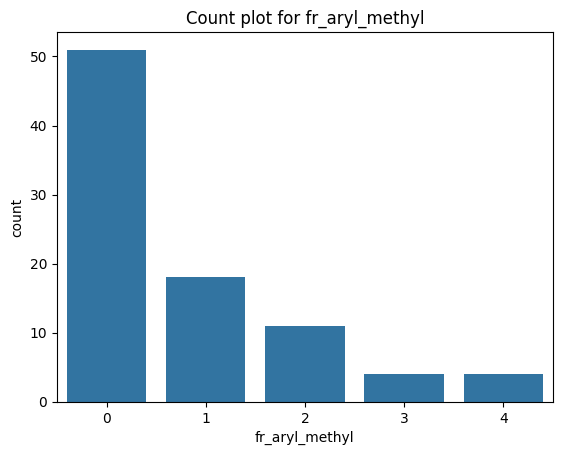

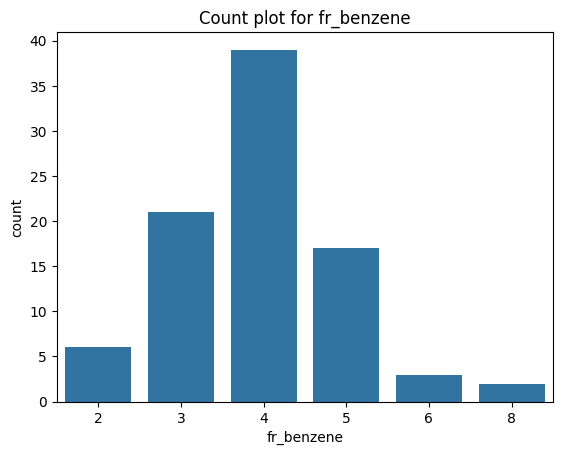

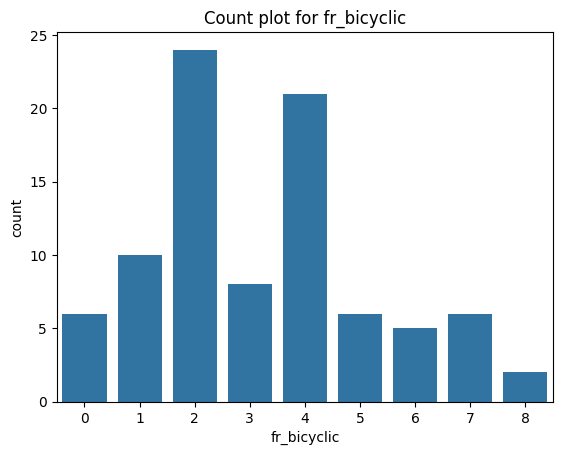

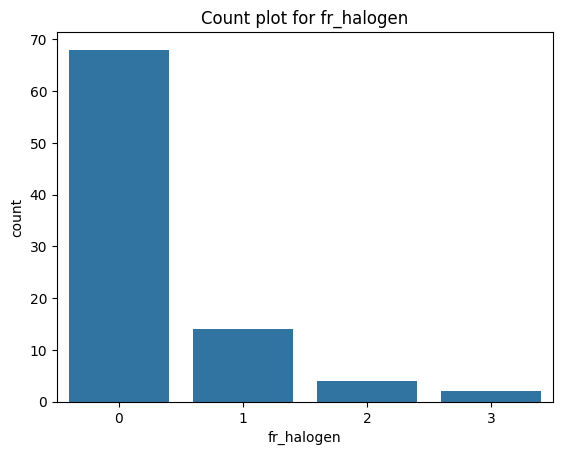

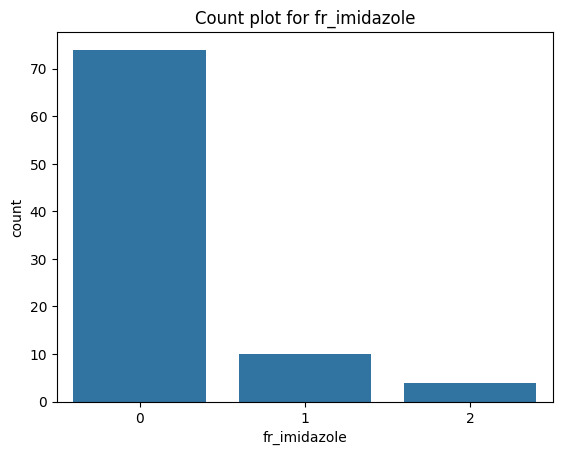

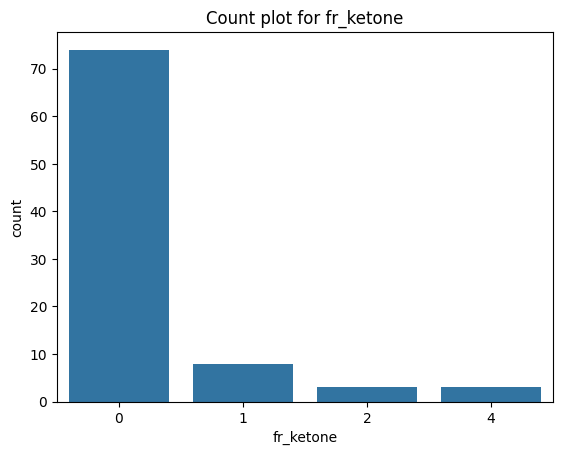

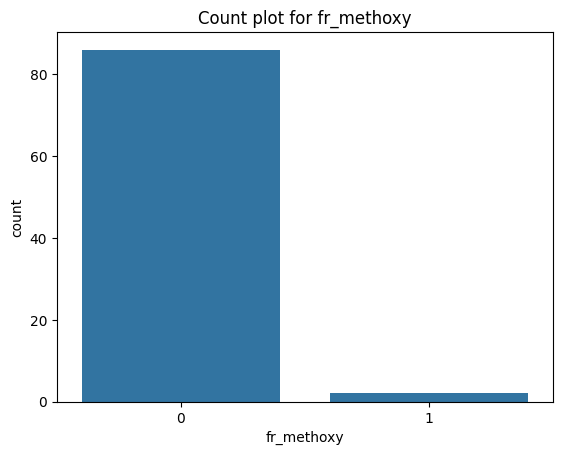

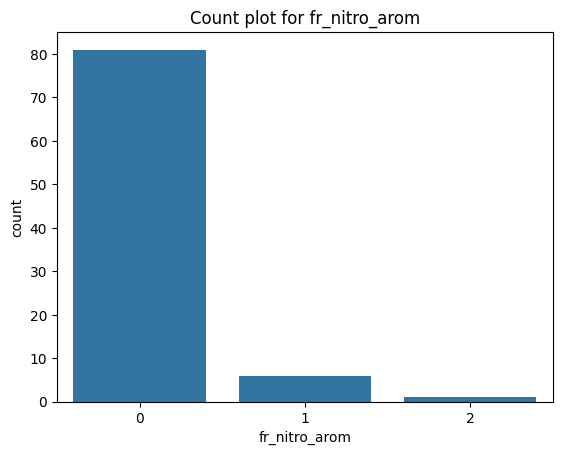

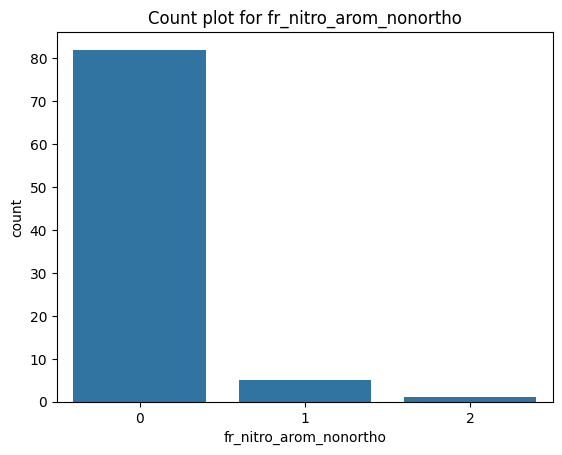

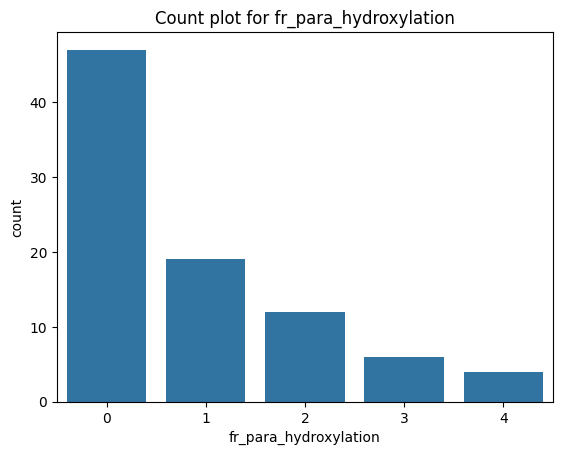

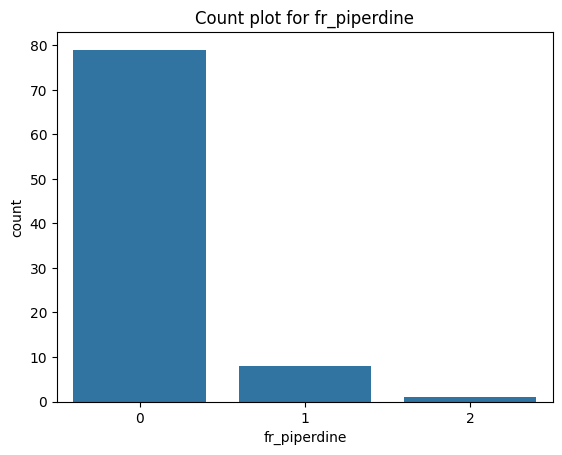

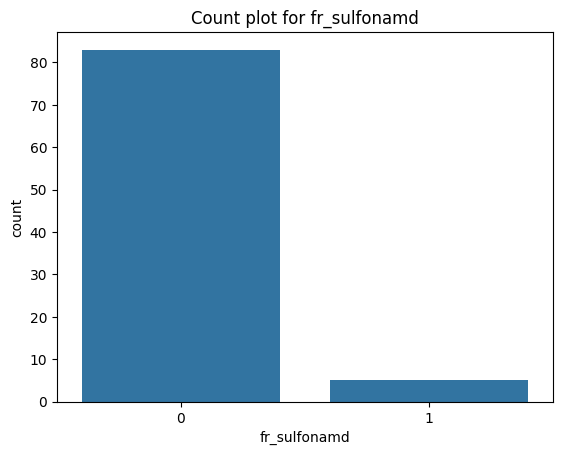

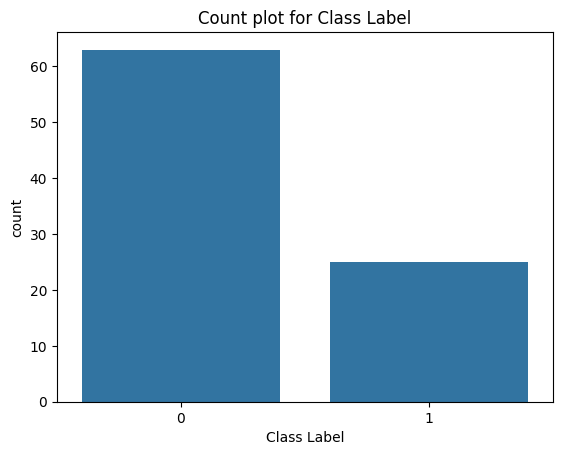

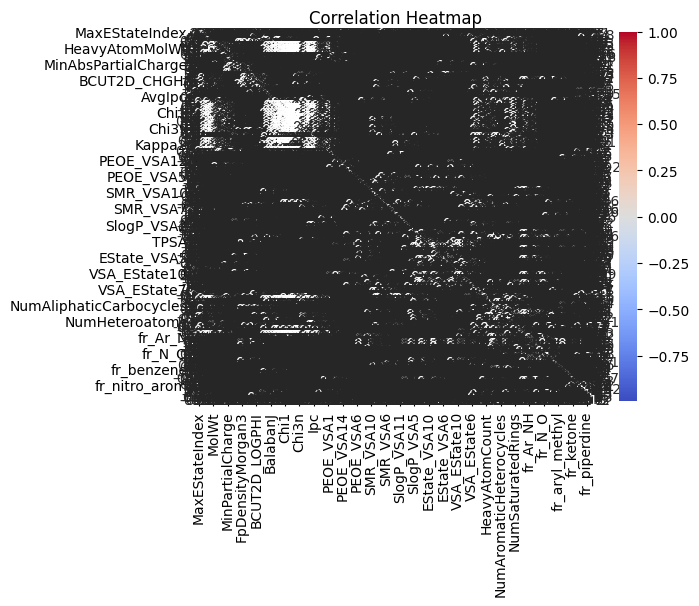


Chi-Square Tests:
Chi-Square Test between NumValenceElectrons and HeavyAtomCount: Chi2 = 681.5785827664399, p-value = 3.5279310759156465e-09

Chi-Square Test between NumValenceElectrons and NOCount: Chi2 = 346.03416128844697, p-value = 0.010730284702300532

Chi-Square Test between NumValenceElectrons and NumAliphaticCarbocycles: Chi2 = 86.45182121971597, p-value = 0.7469118542688347

Chi-Square Test between NumValenceElectrons and NumAliphaticHeterocycles: Chi2 = 142.90322954822958, p-value = 0.17389955843744587

Chi-Square Test between NumValenceElectrons and NumAromaticCarbocycles: Chi2 = 160.9729984301413, p-value = 0.46353076045726643

Chi-Square Test between NumValenceElectrons and NumAromaticHeterocycles: Chi2 = 156.85746031746032, p-value = 0.5554711123435515

Chi-Square Test between NumValenceElectrons and NumAromaticRings: Chi2 = 173.52055187942287, p-value = 0.8265939912070598

Chi-Square Test between NumValenceElectrons and NumHAcceptors: Chi2 = 376.7251359167149, p-value =

KeyError: "['your_target_column'] not found in axis"

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.stats import chi2_contingency

# Load your data
file_path = 'Padel 2.xlsx'  # Replace with your file path
sheet_name = 'RandomForest137'  # Replace with your sheet name
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Set the actual target variable column name
target_variable = 'your_target_column'  # Replace with your actual target column name

# Summary statistics
print("Summary Statistics:")
print(data.describe())

# Data types
print("\nData Types:")
print(data.dtypes)

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Optionally, handle missing values (e.g., imputation or removal)
data = data.dropna()  # Simple removal of missing values

# Frequency distribution of binary variables
print("\nFrequency Distribution:")
for column in data.select_dtypes(include=['int', 'bool']).columns:
    print(f"\n{column}:")
    print(data[column].value_counts())
    print(data[column].value_counts(normalize=True))  # Percentage distribution

# Cross-tabulation of binary variables
print("\nCross-tabulation of Binary Variables:")
for col1 in data.select_dtypes(include=['int', 'bool']).columns:
    for col2 in data.select_dtypes(include=['int', 'bool']).columns:
        if col1 != col2:
            print(pd.crosstab(data[col1], data[col2]))

# Visualization
# Bar plots for binary variables
for column in data.select_dtypes(include=['int', 'bool']).columns:
    sns.countplot(x=column, data=data)
    plt.title(f'Count plot for {column}')
    plt.show()

# Heatmap for correlation
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Chi-square test for association
print("\nChi-Square Tests:")
for col1 in data.select_dtypes(include=['int', 'bool']).columns:
    for col2 in data.select_dtypes(include=['int', 'bool']).columns:
        if col1 != col2:
            contingency_table = pd.crosstab(data[col1], data[col2])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            print(f'Chi-Square Test between {col1} and {col2}: Chi2 = {chi2}, p-value = {p}\n')

# Prepare data for the Decision Tree model
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot ROC curve
def plot_roc_curve(y_test, y_probs, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc:.2f})')
    return auc

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_probs_tree = tree.predict_proba(X_test)[:, 1]
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
auc_tree = plot_roc_curve(y_test, y_probs_tree, 'Decision Tree')

# Finalize ROC plot
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Summary of results
print("\nSummary of Results:")
print(f"Decision Tree AUC: {auc_tree:.2f}")


In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your data
df = pd.read_excel('Padel 2.xlsx', sheet_name='DataSet')

# Assuming the target variable is in the last column
X = df.iloc[:, :-1]  # all rows, all columns except the last
y = df.iloc[:, -1]   # all rows, only the last column

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression classifier
model = LogisticRegression()

# Create the RFE model and select attributes
rfe = RFE(estimator=model, n_features_to_select=5)  # adjust n_features_to_select as needed
rfe = rfe.fit(X_train_scaled, y_train)

# Summarize the selection of attributes
print('Selected features:', list(X.columns[rfe.support_]))
print('Feature ranking:', rfe.ranking_)


Selected features: ['BCUT2D_MRLOW', 'PEOE_VSA13', 'PEOE_VSA4', 'fr_Ar_COO', 'fr_ether']
Feature ranking: [ 46  34  19  87  74 130 105  79 110 128 173  22  32  15  67  59  72 115
   6  95  23 145 100  58  33   1  29  27  65 141 159 147 151 148 133 125
  62  88  94 127 153 158  38 146  80  55 157  86  17   7   9   1 112 143
  52   1 121 134  30  18   8  26  24  75   3  76 116  53  77 198  89  48
  35 104 123 155  25 154 132 149  41 156 206 131  91 111 205  20  44   4
  11 152  36  70  49  51  96  37   5  83 109  43  10  56  40 124 138 103
  92  81  60 117 142 150 161  99  73 114  39  85  61  78 102  54 118 192
 178 164 185   1  28   2  50  21  42 113 126 189 201  45  93 108 171  16
 204 144  13 175 176 181 162  31 106 182  69  57 188 179 187 137 197  97
 165 194 195  47   1 120 202 122 203  14 101  71 199 200  82  84 166  68
 177 167  64 135 140 129 174 172 169  66  90  98 193 196 136 160 183 184
 119 163 180 139  12 168 170  63 186 190 191 107]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load your data
df = pd.read_excel('Padel 2.xlsx', sheet_name='RFE Data0.4')

# Remove rows with any infinite or NaN values
df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
df.dropna(inplace=True)

# Check if the dataframe is empty after removing NaNs and infinities
if df.empty:
    raise ValueError("The dataframe is empty after removing NaN and infinity values. Check your data quality or consider less stringent cleaning.")

# Assuming the target variable is in the last column
X = df.iloc[:, :-1]  # all rows, all columns except the last
y = df.iloc[:, -1]   # all rows, only the last column

# Ensure the target variable is of type int, if it's categorical
y = y.astype('int')

# Check the balance of data samples
if len(y) < 10:
    raise ValueError("Not enough samples to split into train and test sets. Need more data.")

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Check if the training set is empty
if X_train.empty:
    raise ValueError("The training set is empty after the split. Adjust the test_size or check the dataset size.")

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression classifier with increased maximum iterations
model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Train the model
model.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy:', accuracy)




ValueError: The dataframe is empty after removing NaN and infinity values. Check your data quality or consider less stringent cleaning.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load your data
df = pd.read_excel('Padel 2.xlsx', sheet_name='RFE Data0.3')

# Assuming the target variable is in the last column
X = df.iloc[:, :-1]  # all rows, all columns except the last
y = df.iloc[:, -1]   # all rows, only the last column

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression classifier
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred = model.predict(X_test_scaled)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)


Confusion Matrix:
 [[14  6]
 [ 5  2]]


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # You can replace this with any model you like
from sklearn.model_selection import KFold

# Load the data from the Excel file
file_path = 'Padel 2.xlsx'  # Replace with your file path
sheet_name = 'RFE Data0.2+Dataset'  # Replace with your sheet name if different
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target (the last column)

# Define the model (you can replace this with your model of choice)
model = RandomForestClassifier()

# Define the 10x cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  # Change scoring if necessary

# Output the results
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {cv_scores.mean()}')


Cross-validation scores: [0.77777778 0.44444444 0.88888889 1.         0.77777778 0.66666667
 0.77777778 0.66666667 0.875      0.625     ]
Mean accuracy: 0.75


Confusion Matrix for Fold 1:
[[6 1]
 [2 0]]

Confusion Matrix for Fold 2:
[[7 0]
 [1 1]]

Confusion Matrix for Fold 3:
[[6 1]
 [2 0]]

Confusion Matrix for Fold 4:
[[6 0]
 [1 2]]

Confusion Matrix for Fold 5:
[[5 1]
 [1 2]]

Confusion Matrix for Fold 6:
[[6 0]
 [2 1]]

Confusion Matrix for Fold 7:
[[6 0]
 [2 1]]

Confusion Matrix for Fold 8:
[[6 0]
 [2 1]]

Confusion Matrix for Fold 9:
[[6 0]
 [2 0]]

Confusion Matrix for Fold 10:
[[6 0]
 [2 0]]



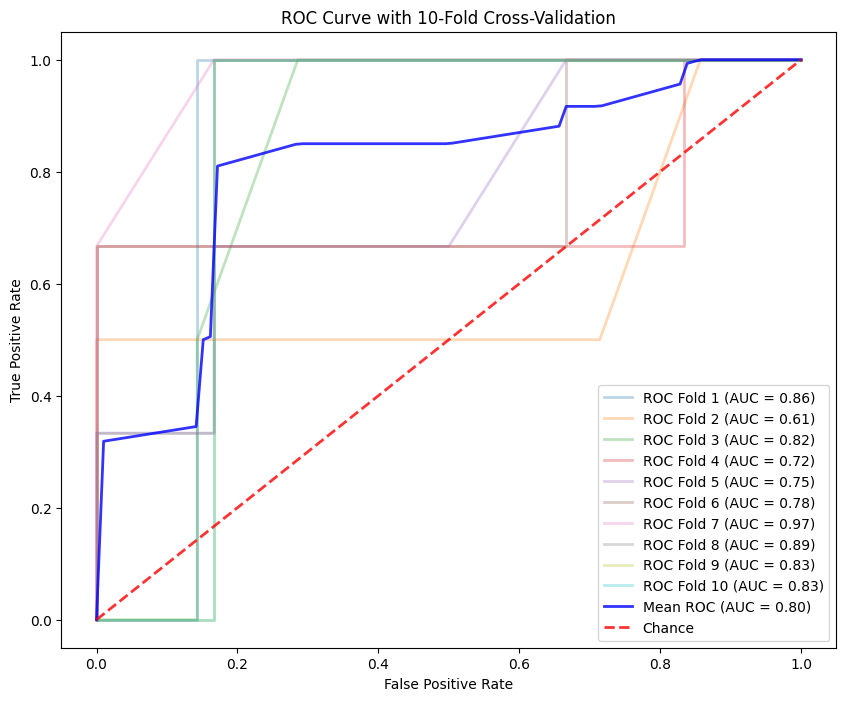

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier  # You can replace this with any model you like
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the Excel file
file_path = 'Padel 2.xlsx'  # Replace with your file path
sheet_name = 'RFE Data0.2+Dataset'  # Replace with your sheet name if different
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target (the last column)

# Define the model (you can replace this with your model of choice)
model = RandomForestClassifier()

# Define the 10x cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to collect metrics
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 8))

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for Fold {i+1}:\n{cm}\n")

    # Compute ROC curve and area the curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Plot the mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot random chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 10-Fold Cross-Validation (Random Forest)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
pip install lazypredict

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
!pip install scikit-learn==0.24.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 54.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Confusion Matrix for Fold 1:
[[7 0]
 [2 0]]

Confusion Matrix for Fold 2:
[[6 1]
 [2 0]]

Confusion Matrix for Fold 3:
[[6 1]
 [2 0]]

Confusion Matrix for Fold 4:
[[6 0]
 [1 2]]

Confusion Matrix for Fold 5:
[[5 1]
 [2 1]]

Confusion Matrix for Fold 6:
[[6 0]
 [1 2]]

Confusion Matrix for Fold 7:
[[6 0]
 [2 1]]

Confusion Matrix for Fold 8:
[[6 0]
 [2 1]]

Confusion Matrix for Fold 9:
[[6 0]
 [2 0]]

Confusion Matrix for Fold 10:
[[6 0]
 [2 0]]



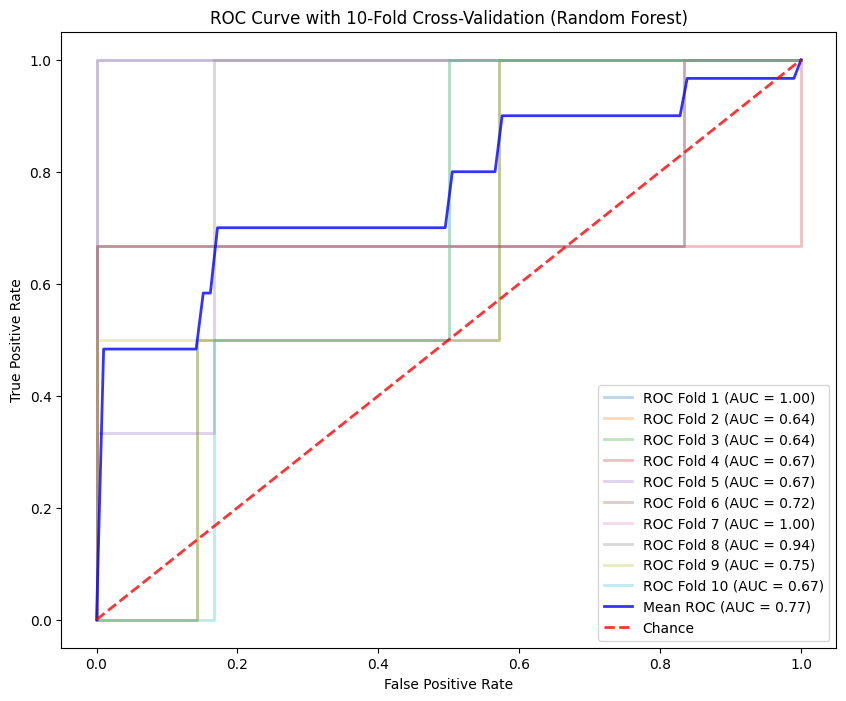

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
data = pd.read_excel('Padel 2.xlsx', sheet_name='RFE Data0.2+Dataset')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Define the model
model = RandomForestClassifier()

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)
model = grid_search.best_estimator_

# Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize metrics
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 8))

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for Fold {i+1}:\n{cm}\n")

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 10-Fold Cross-Validation (Random Forest)')
plt.legend(loc="lower right")
plt.show()



--- Model: RandomForest ---

Confusion Matrix for Fold 1:
[[7 0]
 [2 0]]

Confusion Matrix for Fold 2:
[[7 0]
 [2 0]]

Confusion Matrix for Fold 3:
[[6 1]
 [2 0]]

Confusion Matrix for Fold 4:
[[6 0]
 [1 2]]

Confusion Matrix for Fold 5:
[[5 1]
 [2 1]]

Confusion Matrix for Fold 6:
[[6 0]
 [2 1]]

Confusion Matrix for Fold 7:
[[6 0]
 [2 1]]

Confusion Matrix for Fold 8:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 9:
[[6 0]
 [2 0]]

Confusion Matrix for Fold 10:
[[5 1]
 [2 0]]



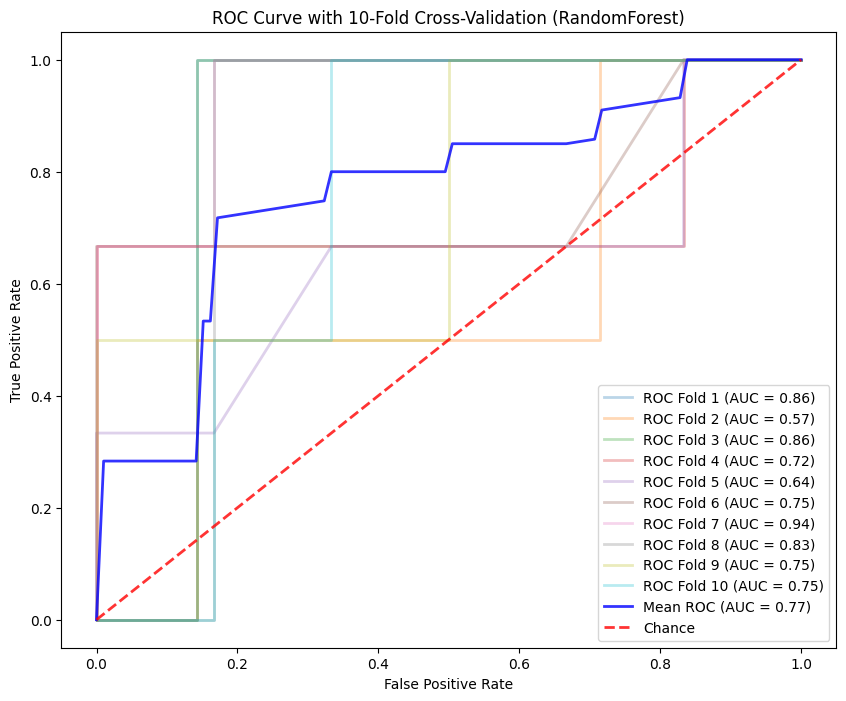


--- Model: GradientBoosting ---

Confusion Matrix for Fold 1:
[[6 1]
 [1 1]]

Confusion Matrix for Fold 2:
[[6 1]
 [1 1]]

Confusion Matrix for Fold 3:
[[6 1]
 [1 1]]

Confusion Matrix for Fold 4:
[[6 0]
 [1 2]]

Confusion Matrix for Fold 5:
[[5 1]
 [1 2]]

Confusion Matrix for Fold 6:
[[5 1]
 [2 1]]

Confusion Matrix for Fold 7:
[[6 0]
 [0 3]]

Confusion Matrix for Fold 8:
[[6 0]
 [2 1]]

Confusion Matrix for Fold 9:
[[6 0]
 [2 0]]

Confusion Matrix for Fold 10:
[[5 1]
 [1 1]]



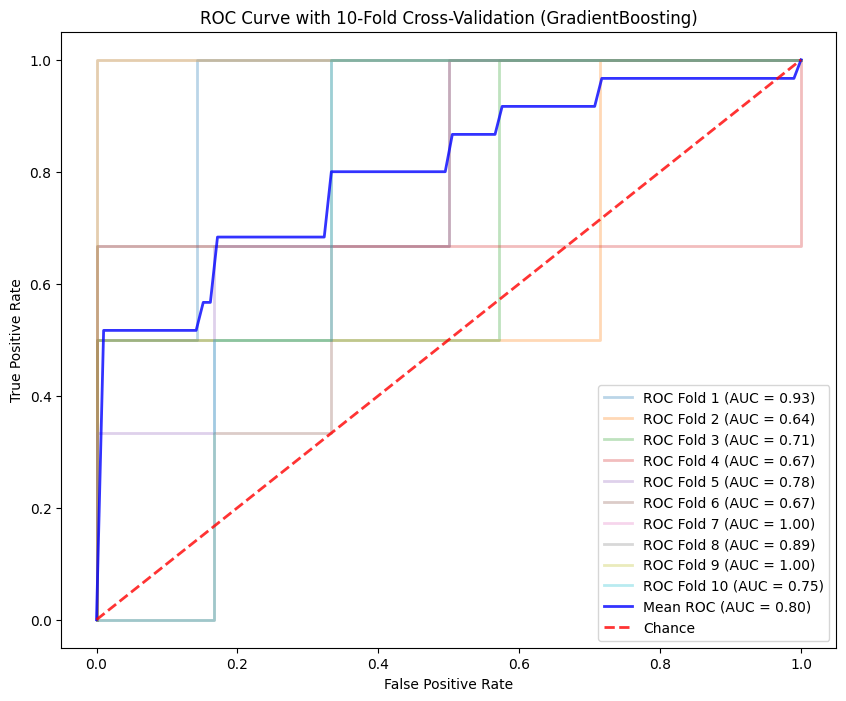


--- Model: SVM ---

Confusion Matrix for Fold 1:
[[7 0]
 [2 0]]

Confusion Matrix for Fold 2:
[[7 0]
 [2 0]]

Confusion Matrix for Fold 3:
[[5 2]
 [2 0]]

Confusion Matrix for Fold 4:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 5:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 6:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 7:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 8:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 9:
[[5 1]
 [2 0]]

Confusion Matrix for Fold 10:
[[6 0]
 [2 0]]



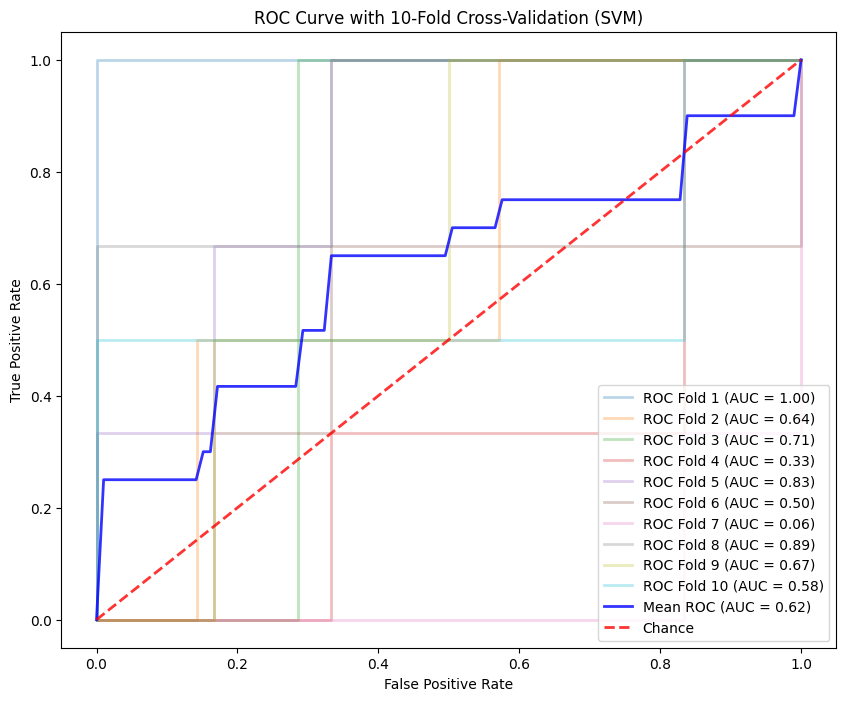


--- Model: LogisticRegression ---

Confusion Matrix for Fold 1:
[[6 1]
 [1 1]]

Confusion Matrix for Fold 2:
[[5 2]
 [1 1]]

Confusion Matrix for Fold 3:
[[5 2]
 [2 0]]

Confusion Matrix for Fold 4:
[[5 1]
 [2 1]]

Confusion Matrix for Fold 5:
[[6 0]
 [1 2]]

Confusion Matrix for Fold 6:
[[5 1]
 [3 0]]

Confusion Matrix for Fold 7:
[[5 1]
 [1 2]]

Confusion Matrix for Fold 8:
[[5 1]
 [3 0]]

Confusion Matrix for Fold 9:
[[6 0]
 [1 1]]

Confusion Matrix for Fold 10:
[[4 2]
 [2 0]]



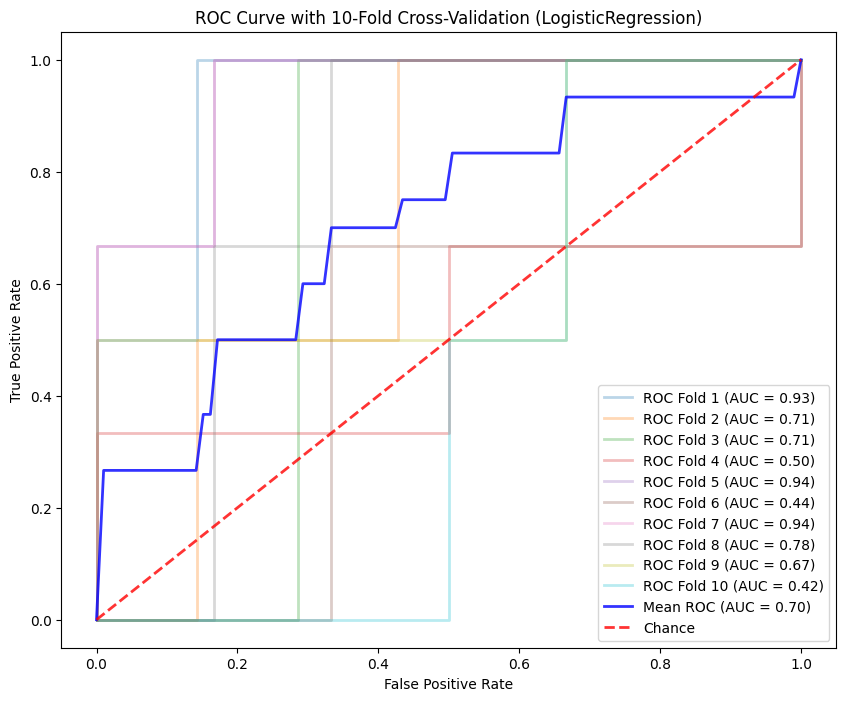

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the Excel file
file_path = 'Padel 2.xlsx'  # Replace with your file path
sheet_name = 'RFE Data0.2+Dataset'  # Replace with your sheet name if different
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target (the last column)

# Define the models
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),  # Enable probability estimates for ROC curves
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# Define the 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Loop through each model
for model_name, model in models.items():
    print(f"\n--- Model: {model_name} ---\n")

    # Initialize variables to collect metrics
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    plt.figure(figsize=(10, 8))

    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for ROC

        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix for Fold {i+1}:\n{cm}\n")

        # Compute ROC curve and area under the curve (AUC)
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

        plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

    # Plot the mean ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

    # Plot random chance line
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve with 10-Fold Cross-Validation ({model_name})')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load data from Excel sheet
file_path = 'Padel 2.xlsx'  # Update with your file path
sheet_name = 'RFE Data0.2+Dataset'  # Update with your sheet name
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Separate features (descriptors) and target variable
X = data.drop(columns=['Class Label'])  # Replace 'Target' with the actual name of the target column
y = data['Class Label']

# Split the data into training and test sets (optional, depending on your need)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (necessary for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

### 1. RFE: Recursive Feature Elimination

# Define the estimator (Random Forest in this case)
estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE with the number of features to select (e.g., top 10)
rfe = RFE(estimator, n_features_to_select=10)

# Fit RFE
rfe.fit(X_scaled, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features from RFE:", selected_features)

# Transform the data to the selected features
X_train_rfe = rfe.transform(X_scaled)
X_test_rfe = rfe.transform(scaler.transform(X_test))

### 2. PCA: Principal Component Analysis

# Initialize PCA with the number of components (e.g., 10)
pca = PCA(n_components=10)

# Fit PCA on the scaled data
X_train_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(scaler.transform(X_test))

# Explained variance by each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio from PCA:", explained_variance)

# Now you can use X_train_rfe and X_train_pca for further modeling


Selected Features from RFE: Index(['BCUT2D_MRLOW', 'PEOE_VSA12', 'FpDensityMorgan1', 'ATSC8c', 'MATS4e',
       'MATS4s', 'SpMin4_Bhp', 'MLFER_S', 'ATSC4p', 'SpMax2_Bhm'],
      dtype='object')
Explained Variance Ratio from PCA: [0.12924263 0.10465164 0.09707601 0.08706172 0.07680257 0.07083938
 0.06311754 0.06044672 0.05179573 0.04958124]



--- Model: RandomForest ---

Confusion Matrix for Fold 1:
[[7 0]
 [2 0]]

Confusion Matrix for Fold 2:
[[6 1]
 [2 0]]

Confusion Matrix for Fold 3:
[[6 1]
 [2 0]]

Confusion Matrix for Fold 4:
[[5 1]
 [2 1]]

Confusion Matrix for Fold 5:
[[5 1]
 [2 1]]

Confusion Matrix for Fold 6:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 7:
[[6 0]
 [2 1]]

Confusion Matrix for Fold 8:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 9:
[[6 0]
 [2 0]]

Confusion Matrix for Fold 10:
[[4 2]
 [1 1]]



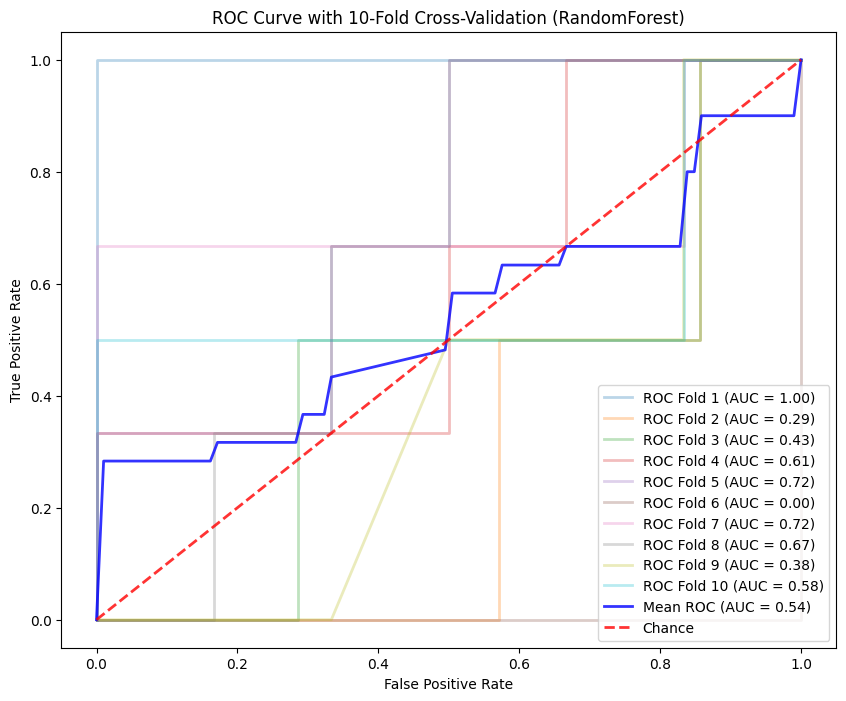


--- Model: GradientBoosting ---

Confusion Matrix for Fold 1:
[[7 0]
 [1 1]]

Confusion Matrix for Fold 2:
[[6 1]
 [2 0]]

Confusion Matrix for Fold 3:
[[5 2]
 [2 0]]

Confusion Matrix for Fold 4:
[[5 1]
 [2 1]]

Confusion Matrix for Fold 5:
[[3 3]
 [2 1]]

Confusion Matrix for Fold 6:
[[5 1]
 [3 0]]

Confusion Matrix for Fold 7:
[[5 1]
 [2 1]]

Confusion Matrix for Fold 8:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 9:
[[5 1]
 [2 0]]

Confusion Matrix for Fold 10:
[[4 2]
 [2 0]]



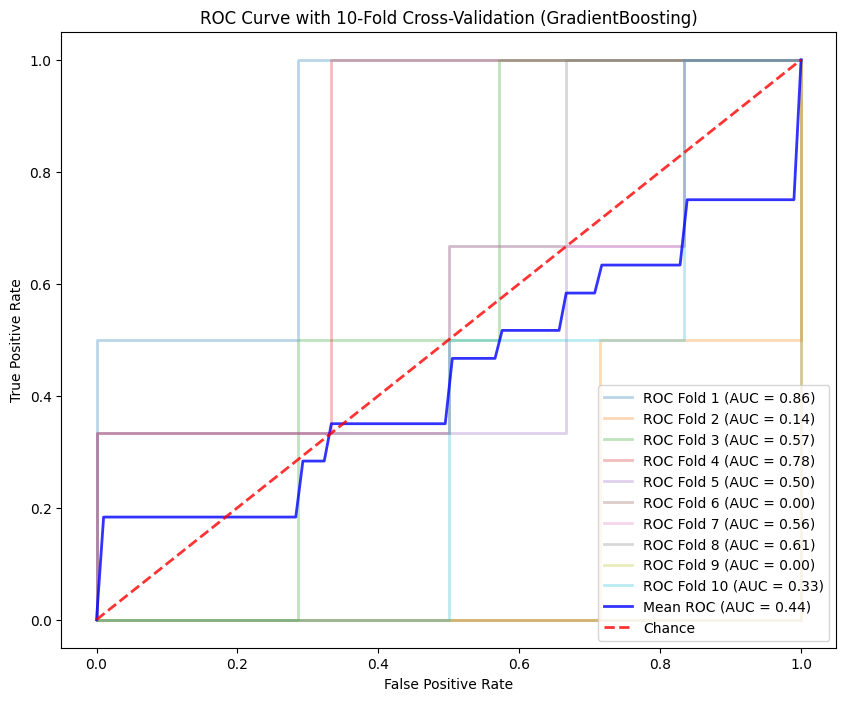


--- Model: SVM ---

Confusion Matrix for Fold 1:
[[7 0]
 [2 0]]

Confusion Matrix for Fold 2:
[[7 0]
 [2 0]]

Confusion Matrix for Fold 3:
[[5 2]
 [2 0]]

Confusion Matrix for Fold 4:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 5:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 6:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 7:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 8:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 9:
[[5 1]
 [2 0]]

Confusion Matrix for Fold 10:
[[6 0]
 [2 0]]



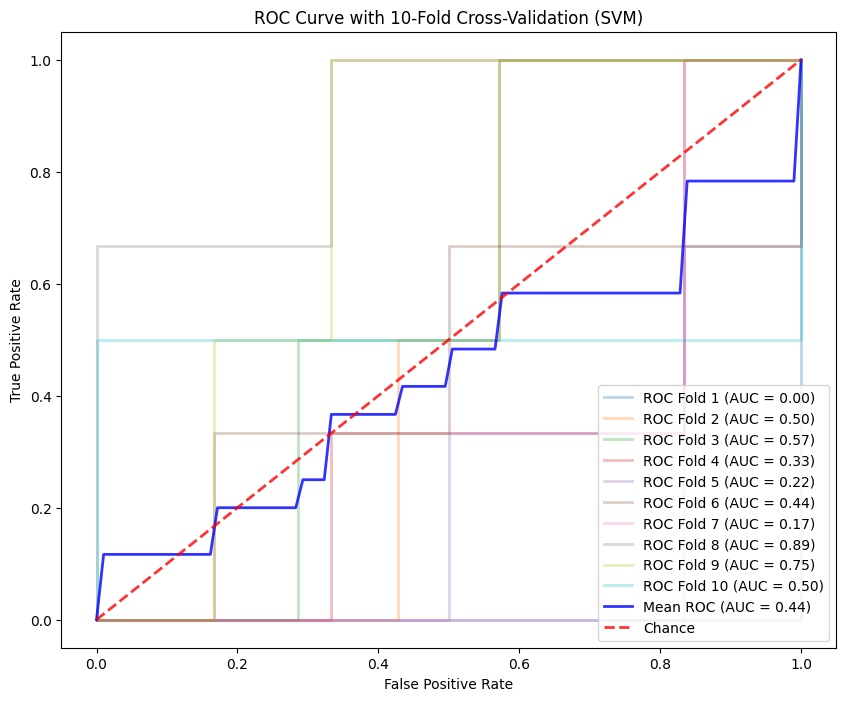


--- Model: LogisticRegression ---

Confusion Matrix for Fold 1:
[[6 1]
 [1 1]]

Confusion Matrix for Fold 2:
[[7 0]
 [2 0]]

Confusion Matrix for Fold 3:
[[5 2]
 [2 0]]

Confusion Matrix for Fold 4:
[[6 0]
 [2 1]]

Confusion Matrix for Fold 5:
[[6 0]
 [1 2]]

Confusion Matrix for Fold 6:
[[5 1]
 [3 0]]

Confusion Matrix for Fold 7:
[[6 0]
 [1 2]]

Confusion Matrix for Fold 8:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 9:
[[6 0]
 [1 1]]

Confusion Matrix for Fold 10:
[[5 1]
 [1 1]]



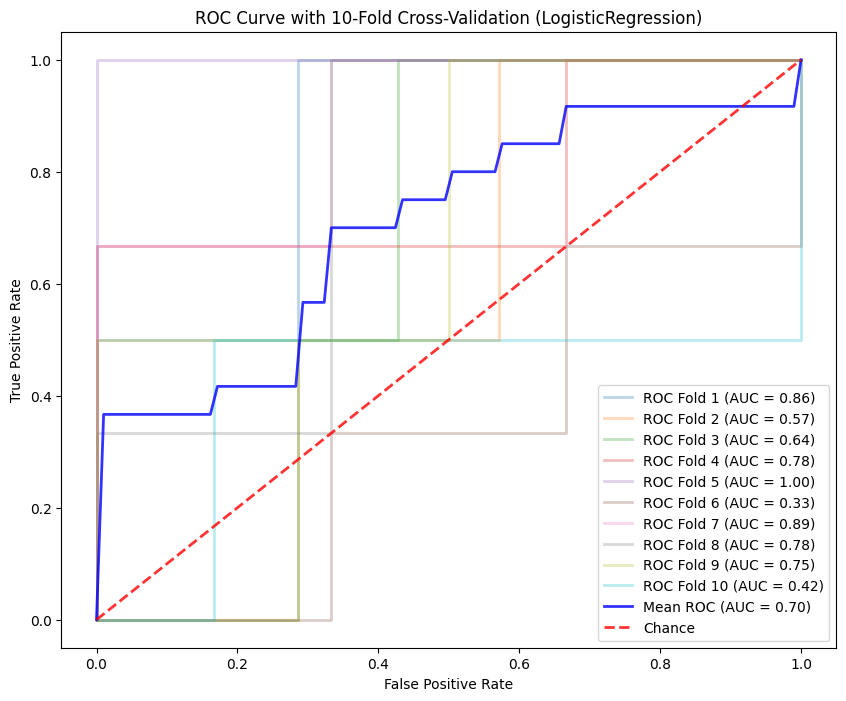

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the Excel file
file_path = 'Padel 2.xlsx'  # Replace with your file path
sheet_name = 'RFE Data0.2'  # Replace with your sheet name if different
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target (the last column)

# Define the models
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),  # Enable probability estimates for ROC curves
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# Define the 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Loop through each model
for model_name, model in models.items():
    print(f"\n--- Model: {model_name} ---\n")

    # Initialize variables to collect metrics
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    plt.figure(figsize=(10, 8))

    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for ROC

        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix for Fold {i+1}:\n{cm}\n")

        # Compute ROC curve and area under the curve (AUC)
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

        plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

    # Plot the mean ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

    # Plot random chance line
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve with 10-Fold Cross-Validation ({model_name})')
    plt.legend(loc="lower right")
    plt.show()

Confusion Matrix for Fold 1:
[[6 1]
 [2 0]]

Confusion Matrix for Fold 2:
[[6 1]
 [2 0]]

Confusion Matrix for Fold 3:
[[6 1]
 [2 0]]

Confusion Matrix for Fold 4:
[[4 2]
 [2 1]]

Confusion Matrix for Fold 5:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 6:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 7:
[[6 0]
 [2 1]]

Confusion Matrix for Fold 8:
[[6 0]
 [3 0]]

Confusion Matrix for Fold 9:
[[6 0]
 [2 0]]

Confusion Matrix for Fold 10:
[[4 2]
 [1 1]]



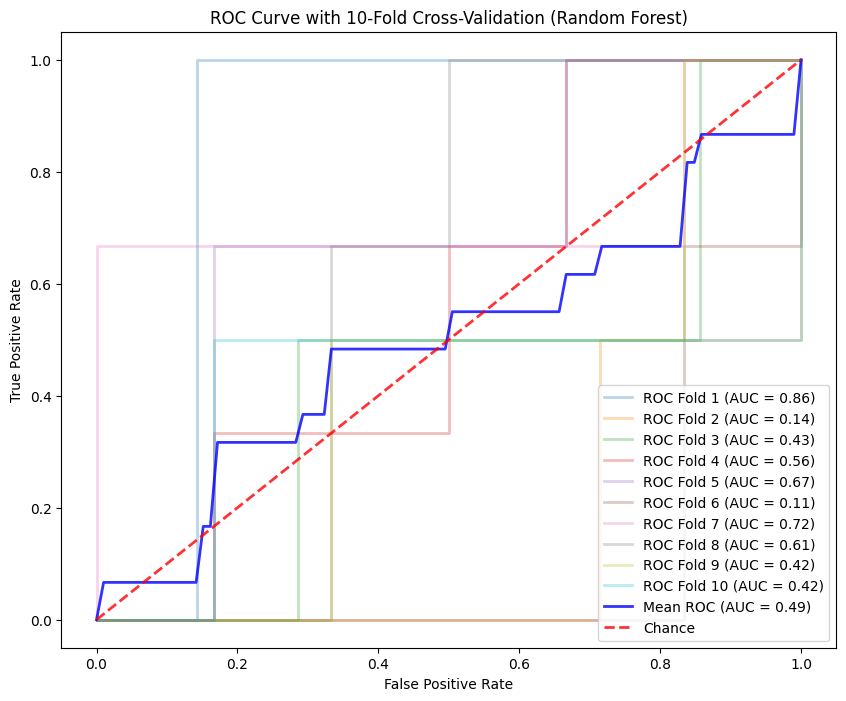

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier  # You can replace this with any model you like
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the Excel file
file_path = 'Padel 2.xlsx'  # Replace with your file path
sheet_name = 'RFE Data0.2'  # Replace with your sheet name if different
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target (the last column)

# Define the model (you can replace this with your model of choice)
model = RandomForestClassifier()

# Define the 10x cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to collect metrics
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 8))

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for Fold {i+1}:\n{cm}\n")

    # Compute ROC curve and area the curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Plot the mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot random chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 10-Fold Cross-Validation (Random Forest)')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.59
MATS4e              0.104561
MolLogP             0.099892
ATSC4p              0.082578
ATSC8c              0.074064
SpMin4_Bhp          0.073064
PEOE_VSA12          0.064152
MATS4s              0.061774
MLFER_S             0.053223
SpMax2_Bhm          0.049866
EState_VSA5         0.047211
MATS1e              0.046263
SMR_VSA1            0.044701
FpDensityMorgan1    0.042958
ATSC7i              0.042921
PEOE_VSA13          0.034961
Kappa3              0.033265
minsCH3             0.023973
PEOE_VSA4           0.020063
fr_allylic_oxid     0.000510
dtype: float64
AUC-ROC: 0.76


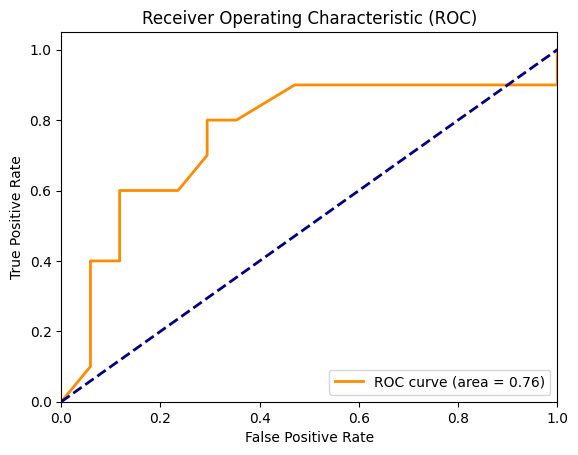

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the "Geometric" sheet from the Excel file
file_path = 'Padel 2.xlsx'  # Replace with your file path
geometric_data = pd.read_excel(file_path, sheet_name='RFE Data0.2+Dataset')

# Preprocess the data
# Assume the last column is the target variable, and the rest are features
# EXCLUDE THE 'Name' COLUMN AS IT CONTAINS NON-NUMERIC DATA
X = geometric_data.iloc[:, 1:-1]  # Features (excluding the first column 'Name')
y = geometric_data.iloc[:, -1]   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Set pandas display option to show all rows
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Optionally, you can print feature importances
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))


# Step 1: Read data from the Excel file
file_path = 'Padel 2.xlsx'
sheet_name = 'RFE Data0.2+Dataset'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming your target variable is in the last column and the rest are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Make predictions
y_probs = clf.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# Step 5: Calculate AUC-ROC score
auc = roc_auc_score(y_test, y_probs)
print(f'AUC-ROC: {auc:.2f}')

# Optional: Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()